# INTRODUCTION
 * Kowope Mart is a Nigerian-based retail company with a vision to provide quality goods, education and automobile services to its customers at affordable price and reduce if not eradicate charges on card payments and increase customer satisfaction with credit rewards that can be used within the Mall. To achieve this, the company has partnered with DSBank on co-branded credit card with additional functionality such that customers can request for loan, pay for goods even with zero-balance and then pay back within an agreed period of time. This innovative strategy has increased sales for the company. However, there has been recent cases of credit defaults and Kowope Mart will like to have a system that profiles customers who are worthy of the card with minimum if not zero risk of defaulting.
 
# AIM
* To predict the customers who are likely to default based on their previous records and credict card and lines information

# DEFINING VARIABLES

* Application_ID: Unique Customer Application Identification number

* form_field1: Customer Creditworthiness score based on historical data
* form_field2: A score that measures the number and riskiness of credit enquiries made by a borrower.
* form_field3: Severity of default by the borrower on any loan(s).
* form_field4: Severity of default by the borrower on auto loan(s).
* form_field5: Severity of default by the borrower on education loan(s).
* form_field6: Minimum of credit available on all credit cards that is automatically renewed as debts are paid off on the customer’s cards (in NGN)
* form_field7: Maximum of credit available on customer’s active credit lines (in NGN)
* form_field8: Maximum of credit available on all active credit cards that is automatically renewed as debts are paid off on the customer’s cards (in NGN)
* form_field9: Sum of available credit on credit cards that the borrower has missed 1 payment (in NGN)
* form_field10: Total amount of credit available on accepted credit lines (in NGN)
* form_field11: The amount of dues collected post-default where the due amount was more than 500 (in NGN)
* form_field12: Sum of the amount due on active credit cards (in NGN)
* form_field13: Annual amount paid towards all credit cards during the previous year (in NGN)
* form_field14: Annual income (in NGN)
* form_field15: The estimated market value of a property owned/used by the borrower (in NGN)
* form_field16: Number of active credit card that is automatically renewed as debts are paid off on which full credit limit is utilized by the borrower
* form_field17: Number of active credit cards on which full credit limit is utilized by the borrower
* form_field18: Number of active credit lines on which full credit limit is utilized by the borrower
* form_field19: Number of active credit cards on which at least 75% credit limit is utilized by the borrower
* form_field20: Number of active credit lines on which at least 75% credit limit is utilized by the borrower
* form_field21: Average utilization of active revolving credit card loans (%)
* form_field22: Average utilization of line on all active credit lines activated in last 2 years (%)
* form_field23: Average utilization of line on all active credit cards activated in last 1 year (%)
* form_field24: Average utilization of line on credit cards on which the borrower has missed 1 payment during the last 6 months (%)
* form_field25: Average tenure of active revolving credit cards (in days)
* form_field26: Tenure of oldest credit card among all active credit cards (in days)
* form_field27: Tenure of oldest revolving credit card among all active revolving credit cards (in days)
* form_field28: Number of days since last missed payment on any credit line
* form_field29: Tenure of the oldest credit line (in days)
* form_field30: Maximum tenure on all auto loans (in days)
* form_field31: Maximum tenure on all education loans (in days)
* form_field32: Sum of tenures (in months) of active credit cards
* form_field33: Sum of tenures (in months) of active credit cards
* form_field34: Number of active credit lines over the last 6 months on which the borrower has missed 1 payment
* form_field35: Number of revolving credit cards over the last 2 years on which the borrower has missed 1 payment
* form_field36: Number of active credit lines
* form_field37: Number of credit cards with an active tenure of at least 2 years
* form_field38: Number of credit lines activated in the last 2 years
* form_field39: Number of credit lines on which the borrower has current delinquency
* form_field40: Utilization of line on active education loans (%)
* form_field41: Utilization of line on active auto loans (%)
* form_field42: Financial stress index of the borrower. This index is a function of collection trades, bankruptcies files, tax liens invoked, etc.
* form_field43: Number of credit lines on which the borrower has never missed a payment in the last 2 years, yet considered as high-risk loans based on the market prediction of the economic scenario
* form_field44: Ratio of the maximum amount due on all active credit lines and the sum of amounts due on all active credit lines
* form_field45: Number of mortgage loans on which the borrower has missed 2 payments
* form_field46: Number of auto loans on which the borrower has missed 2 payments
* form_field47: Type of product that the applicant applied for. (C = Charge; L = Lending)
* form_field48: Undefined Variable
* form_field49: Undefined Variable
* form_field50: Ratio of the minimum amount due on all active credit lines and the sum of amounts due on all active credit lines
default_status: defaulted or not. (yes:1, no: 0)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

## EXPLORATORY DATA ANALYSIS


In [3]:
train.shape, test.shape

((56000, 52), (24000, 51))

In [4]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [5]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [6]:
train.dtypes

Applicant_ID       object
form_field1       float64
form_field2       float64
form_field3       float64
form_field4       float64
form_field5       float64
form_field6       float64
form_field7       float64
form_field8       float64
form_field9       float64
form_field10      float64
form_field11      float64
form_field12      float64
form_field13      float64
form_field14        int64
form_field15      float64
form_field16      float64
form_field17      float64
form_field18      float64
form_field19      float64
form_field20      float64
form_field21      float64
form_field22      float64
form_field23      float64
form_field24      float64
form_field25      float64
form_field26      float64
form_field27      float64
form_field28      float64
form_field29      float64
form_field30      float64
form_field31      float64
form_field32      float64
form_field33      float64
form_field34      float64
form_field35      float64
form_field36      float64
form_field37      float64
form_field38

Form_field47 and default_status are categorical data whereas the rest is numerical data

In [7]:
train.columns,  test.columns

(Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
        'form_field4', 'form_field5', 'form_field6', 'form_field7',
        'form_field8', 'form_field9', 'form_field10', 'form_field11',
        'form_field12', 'form_field13', 'form_field14', 'form_field15',
        'form_field16', 'form_field17', 'form_field18', 'form_field19',
        'form_field20', 'form_field21', 'form_field22', 'form_field23',
        'form_field24', 'form_field25', 'form_field26', 'form_field27',
        'form_field28', 'form_field29', 'form_field30', 'form_field31',
        'form_field32', 'form_field33', 'form_field34', 'form_field35',
        'form_field36', 'form_field37', 'form_field38', 'form_field39',
        'form_field40', 'form_field41', 'form_field42', 'form_field43',
        'form_field44', 'form_field45', 'form_field46', 'form_field47',
        'form_field48', 'form_field49', 'form_field50', 'default_status'],
       dtype='object'),
 Index(['Applicant_ID', 'form_field1', 'form_f

In [8]:
# I'll drop the Applicant_id column in both train and test data
train.drop('Applicant_ID', axis=1, inplace=True)
test_id = test.Applicant_ID
test.drop('Applicant_ID', axis=1, inplace=True)

In [9]:
# Calculating the percentage of missing values in each columns of the train and test data

total = train.isnull().sum().sort_values(ascending = False)
percent1 = train.isnull().sum() / train.isnull().count() * 100
percent2 = (round(percent1,1)).sort_values(ascending = False)
missing_values_train = pd.concat([total, percent2], axis=1, keys=['total', '% missing train'])
missing_values_train.head(10)

,total,% missing train
form_field40,43729,78.1
form_field31,39408,70.4
form_field41,38229,68.3
form_field11,31421,56.1
form_field45,31317,55.9
form_field23,28123,50.2
form_field30,25509,45.6
form_field35,23148,41.3
form_field15,22475,40.1
form_field48,20889,37.3


In [10]:
total = test.isnull().sum().sort_values(ascending = False)
percent1 = test.isnull().sum() / test.isnull().count() * 100
percent2 = (round(percent1,1)).sort_values(ascending = False)
missing_values_test = pd.concat([total, percent2], axis=1, keys=['total', '% missing test'])
missing_values_test.head(10)

,total,% missing test
form_field40,18828,78.4
form_field31,16810,70.0
form_field41,16349,68.1
form_field45,13538,56.4
form_field11,13398,55.8
form_field23,12125,50.5
form_field30,10908,45.4
form_field35,9866,41.1
form_field15,9592,40.0
form_field48,8922,37.2


Both test and train data has approximately the same amount of missing values in each column

In [11]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,167.754000,137.496750,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,645.450000,255.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08


In [12]:
test.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,22890.000000,22291.000000,23854.000000,23854.000000,23854.000000,1.839600e+04,2.176900e+04,1.839600e+04,2.060000e+04,2.385300e+04,...,5172.000000,7651.000000,23422.000000,23750.000000,21638.000000,10462.000000,17115.000000,1.507800e+04,23854.000000,1.920300e+04
mean,3492.284404,0.557676,1.065443,0.859146,2.183538,6.263036e+05,6.797033e+06,2.654142e+06,1.350593e+07,1.187478e+07,...,147.623280,108.209648,0.369684,6.580480,0.566219,0.066526,0.097926,3.015440e+05,1.064118,6.749843e+05
std,190.502764,0.826543,2.198444,3.403115,11.415706,1.457540e+06,1.626022e+07,3.968185e+06,2.289125e+07,2.477113e+07,...,43.580328,36.426276,0.414077,6.363075,0.196060,0.278211,0.370392,1.868574e+06,1.816837,6.561031e+06
min,2986.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.075000,0.000000,0.000000,0.000000,0.066432,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3356.000000,0.068675,0.000000,0.000000,0.000000,1.400400e+04,6.725810e+05,1.816630e+05,1.349441e+06,4.208980e+05,...,135.531750,87.499500,0.000000,2.020000,0.413268,0.000000,0.000000,7.272364e+01,0.000000,4.500510e-02
50%,3484.000000,0.273250,0.058200,0.000000,0.000000,1.155330e+05,2.719888e+06,9.594685e+05,5.529830e+06,3.651543e+06,...,150.000000,117.984000,0.220000,5.050000,0.592100,0.000000,0.000000,3.131754e+02,0.000000,1.680000e-01
75%,3624.000000,0.728850,1.304250,0.000000,0.000000,5.159112e+05,7.073576e+06,3.799849e+06,1.728658e+07,1.318126e+07,...,167.078250,137.207250,0.628573,10.100000,0.756544,0.000000,0.000000,1.195997e+03,1.254155,5.007093e-01
max,3900.000000,22.315050,34.541400,206.452800,297.885600,4.818738e+07,7.709887e+08,1.135141e+08,1.443921e+09,7.741014e+08,...,401.413500,211.693500,2.200000,91.910000,0.800000,5.000000,19.000000,1.213991e+08,24.000000,2.524591e+08


From the above tables;

* The mean of both train and test are relatively close
* The standard deviation of both test and train is relatively large

## UNIVARIATE ANALYSIS

In [13]:
num_columns = train.select_dtypes(exclude=['object']).columns
num_columns

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field14', 'form_field15', 'form_field16',
       'form_field17', 'form_field18', 'form_field19', 'form_field20',
       'form_field21', 'form_field22', 'form_field23', 'form_field24',
       'form_field25', 'form_field26', 'form_field27', 'form_field28',
       'form_field29', 'form_field30', 'form_field31', 'form_field32',
       'form_field33', 'form_field34', 'form_field35', 'form_field36',
       'form_field37', 'form_field38', 'form_field39', 'form_field40',
       'form_field41', 'form_field42', 'form_field43', 'form_field44',
       'form_field45', 'form_field46', 'form_field48', 'form_field49',
       'form_field50'],
      dtype='object')

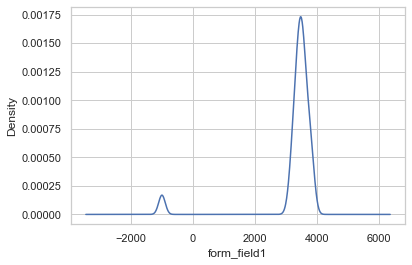

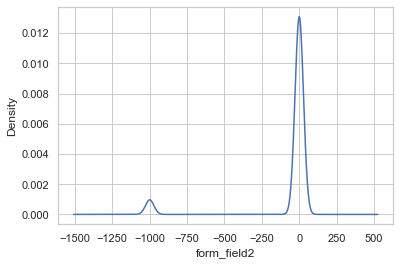

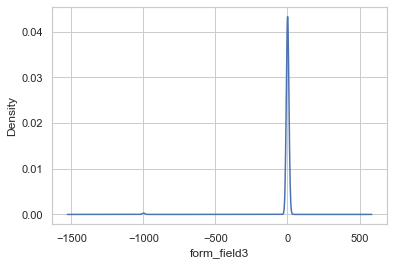

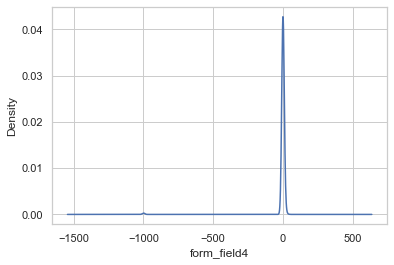

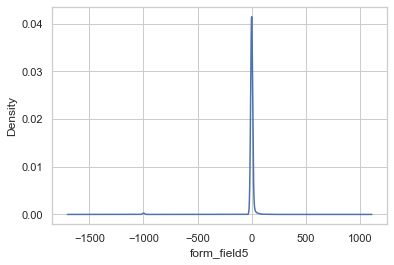

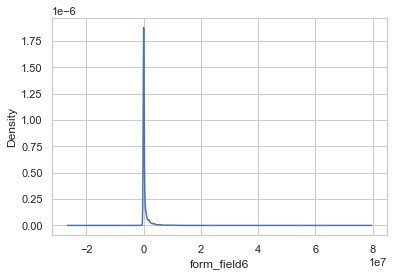

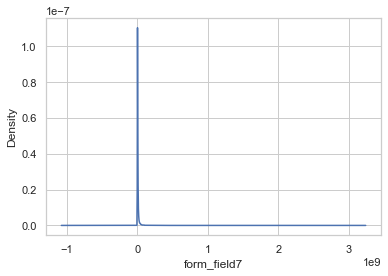

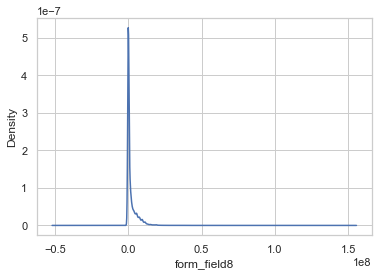

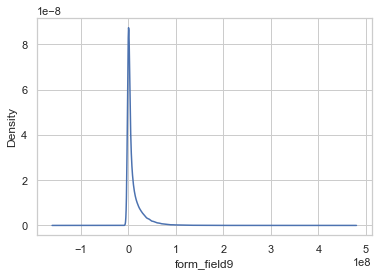

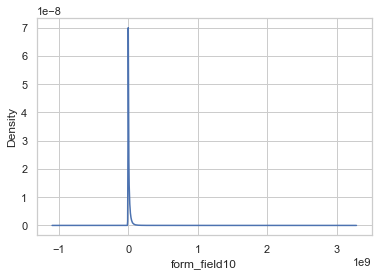

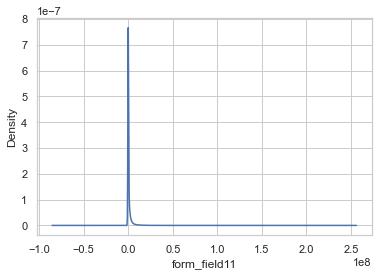

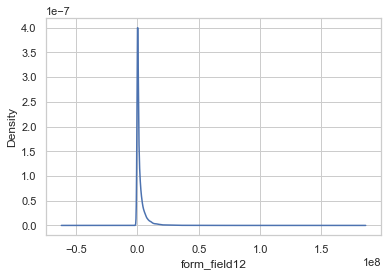

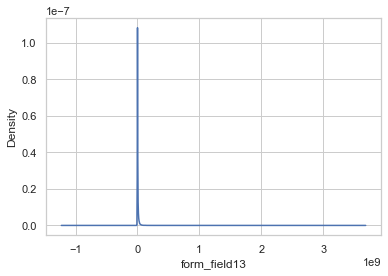

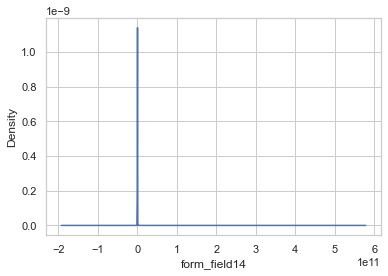

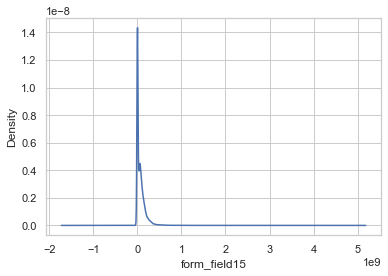

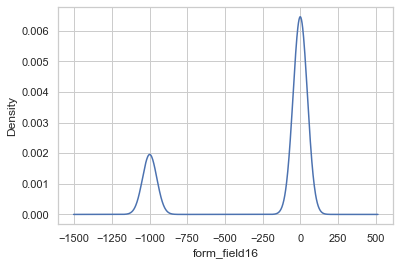

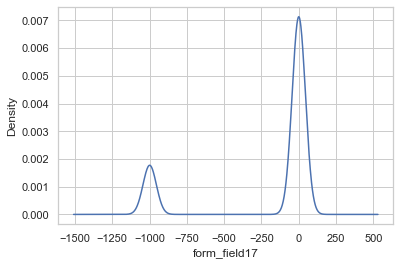

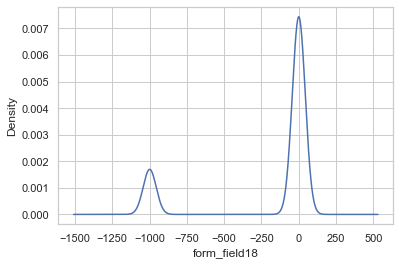

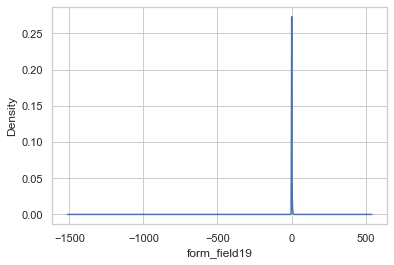

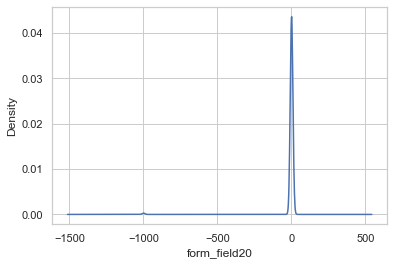

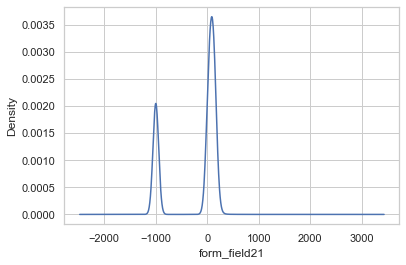

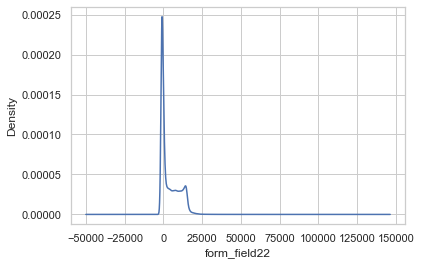

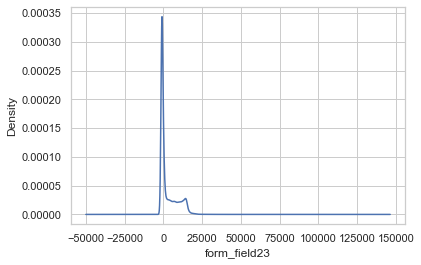

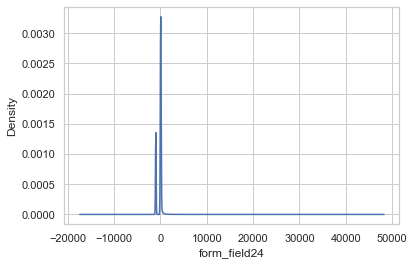

KeyboardInterrupt: 

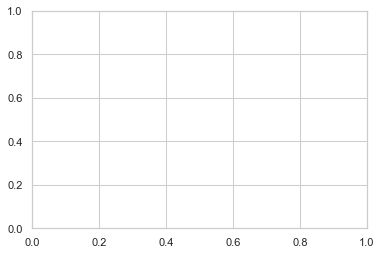

In [40]:
for col in num_columns:
    train[col].plot(kind='density')
    plt.xlabel(col)
    plt.show()

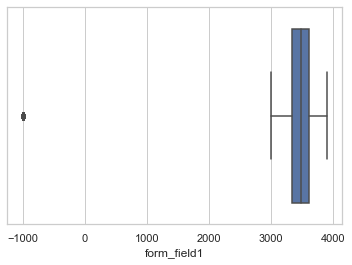

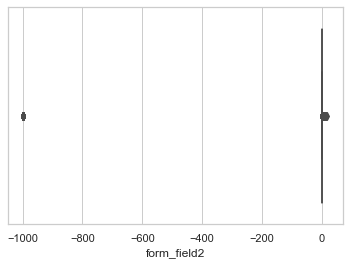

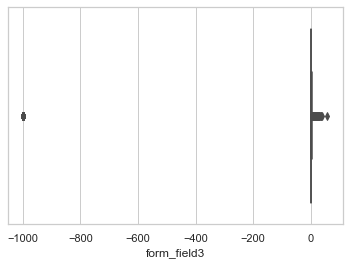

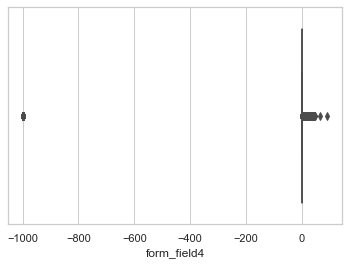

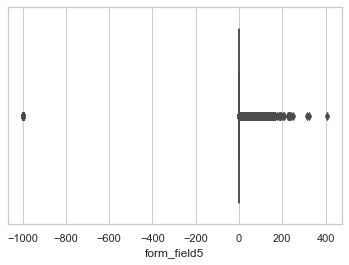

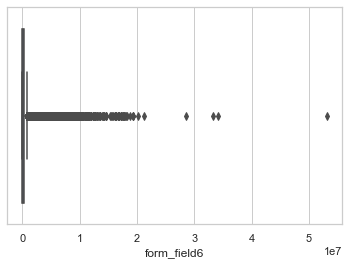

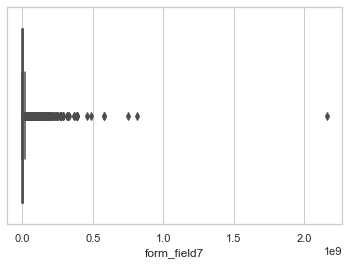

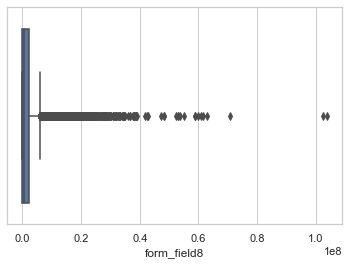

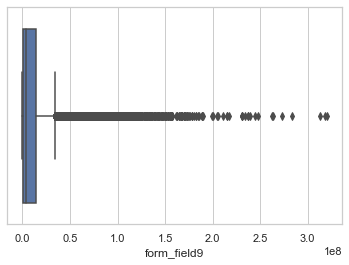

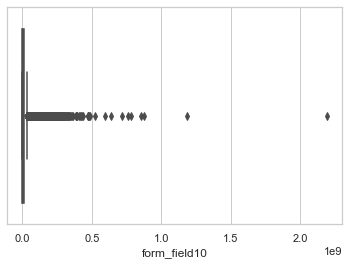

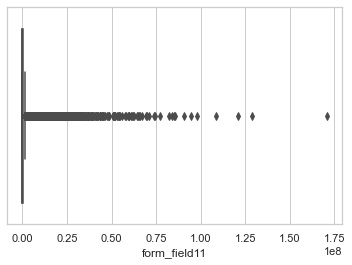

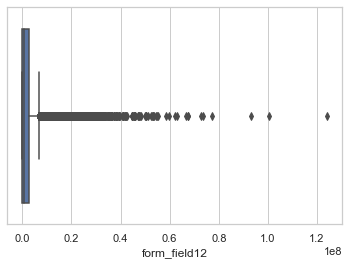

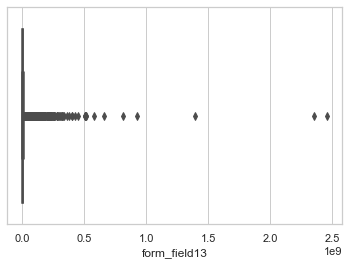

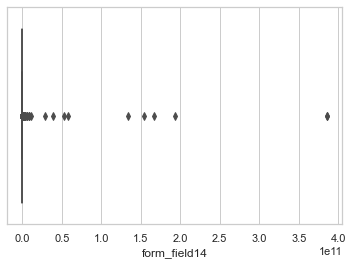

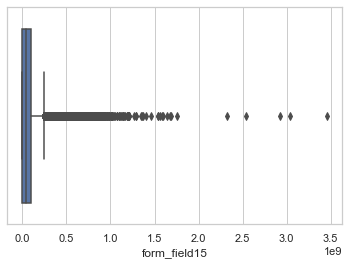

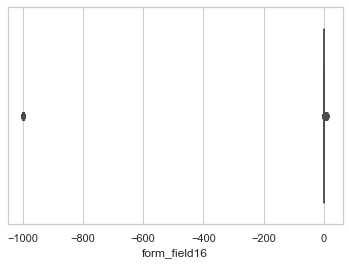

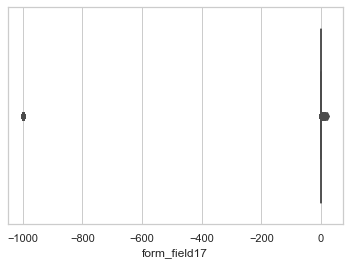

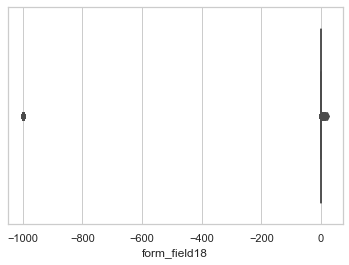

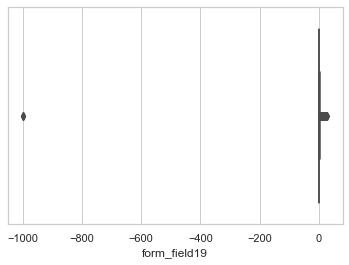

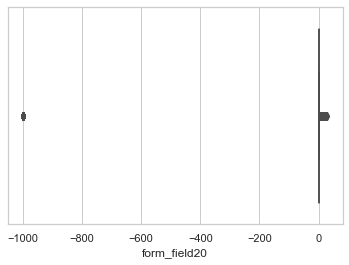

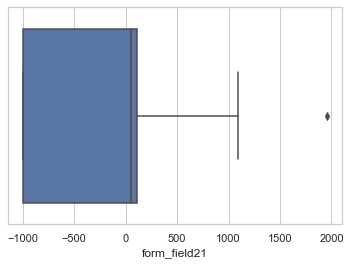

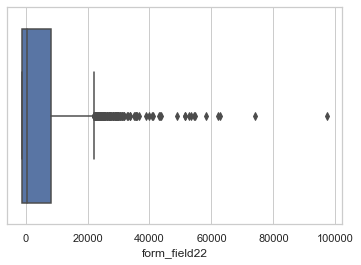

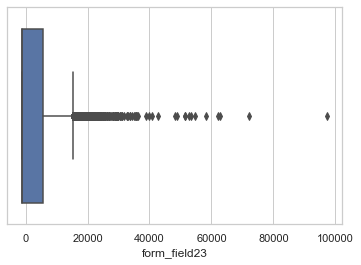

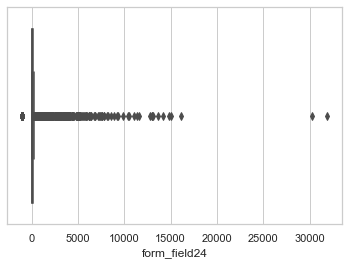

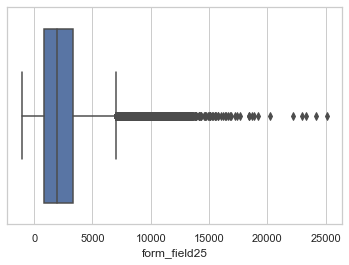

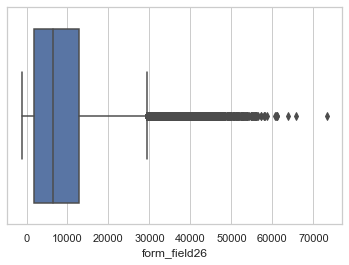

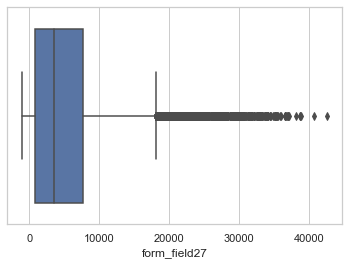

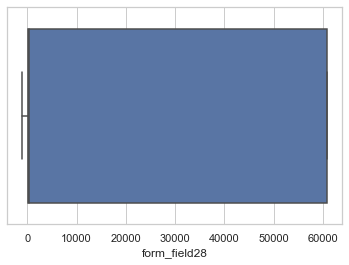

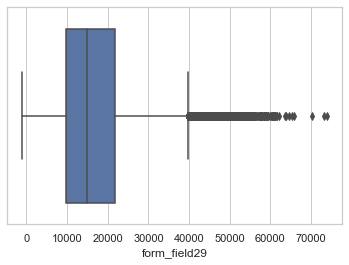

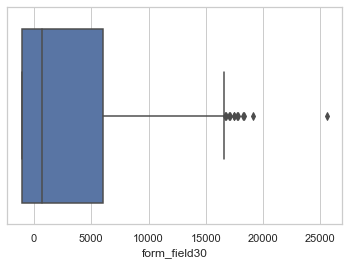

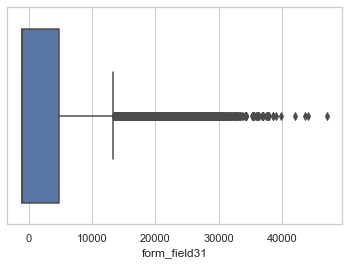

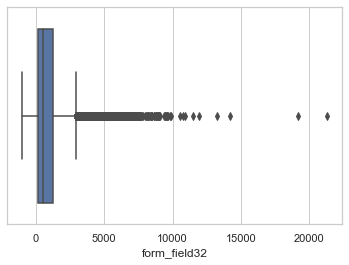

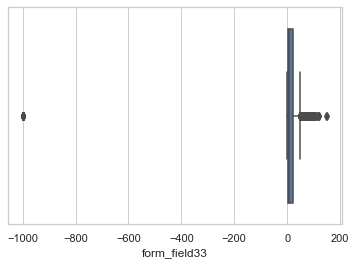

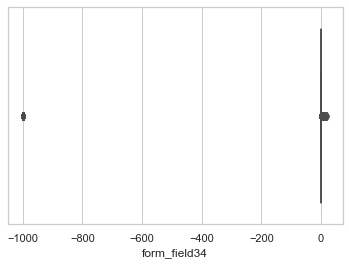

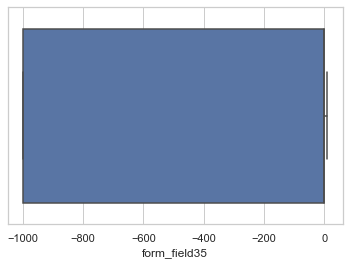

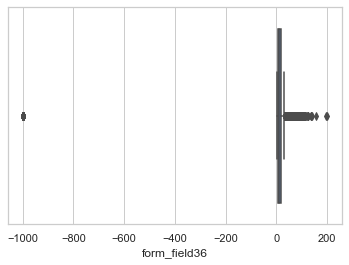

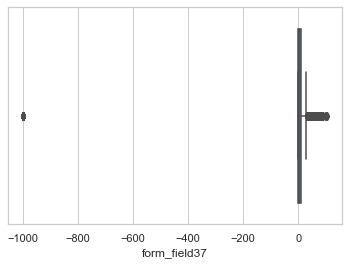

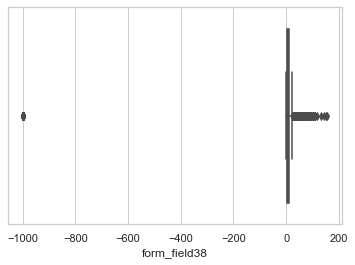

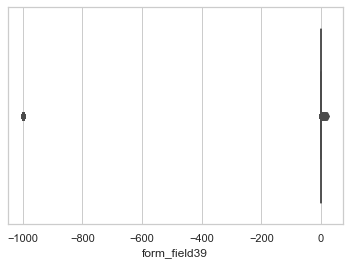

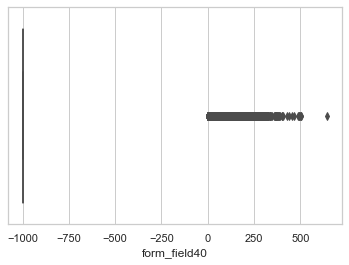

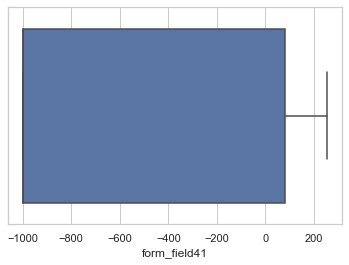

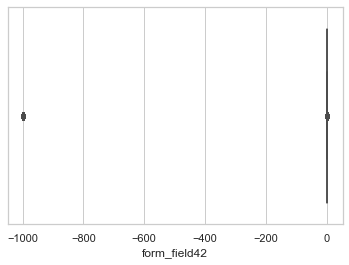

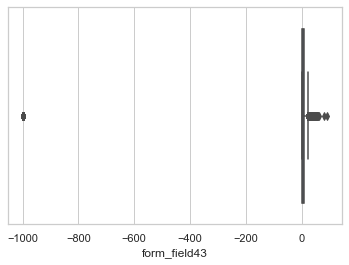

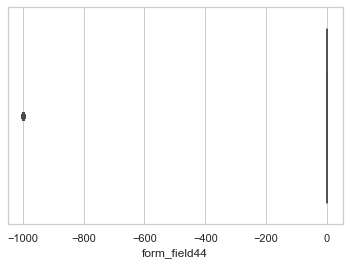

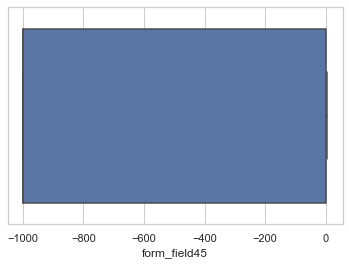

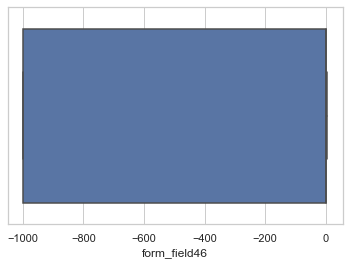

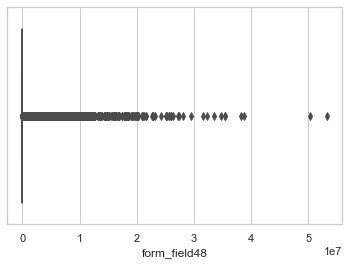

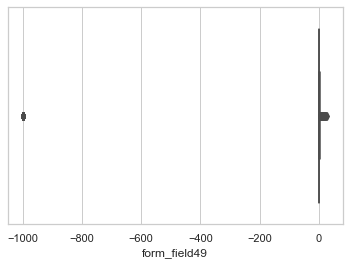

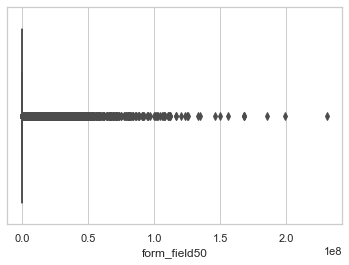

In [41]:
for col in num_columns:
    sns.boxplot(train[col])
    plt.show()

## OBSERVATIONS

* The distribution of the each column in the data doesn't follow a normal distribution. 
* Most of the values are concentrated at 0.
* There are lots of outliers in the data
* Hence, I'll scale the data using MinMaxScaler and replace NaN values with -999 because replacing with 0 will distort the data distribution more.

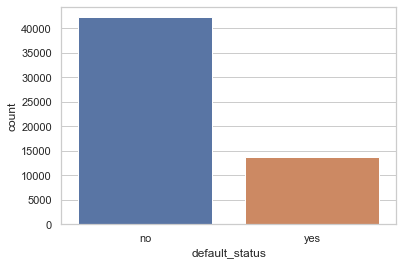

In [16]:
sns.countplot(train['default_status'])

In [17]:
(train['default_status'].value_counts(normalize=True)*100).round(2)

no     75.51
yes    24.49
Name: default_status, dtype: float64

75.51% of applicants in the train data did not default while 24.49 defaulted

## BIVARIATE DATA ANALYSIS

In [18]:
# Customer creditworthiness(form_field1) is an important feature
pd.pivot_table(values =['form_field1'], index='default_status', data=train)

,form_field1
default_status,
no,3535.595105
yes,3352.253953


Applicants who defaulted have a lower creditworthiness score, which makes sense.

In [19]:
pd.pivot_table(values=['form_field1'], index = 'form_field39', data=train)

,form_field1
form_field39,
0.0,3519.110817
1.0,3317.296891
2.0,3281.019108
3.0,3258.351648
4.0,3254.470588
5.0,3247.200000
6.0,3252.800000
7.0,3233.142857
8.0,3294.000000


Customer creditworthiness score reduced as the number of number of credit lines on which the borrower has current delinquency increases until it reaches 6 times. 

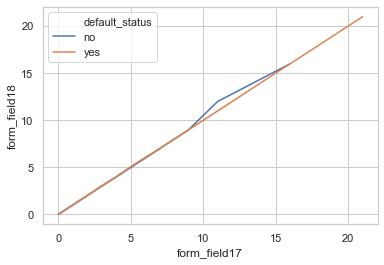

In [20]:
# Annual income(form_field14) and customer credit worthiness
sns.lineplot(x='form_field17', y='form_field18', hue='default_status', data=train)

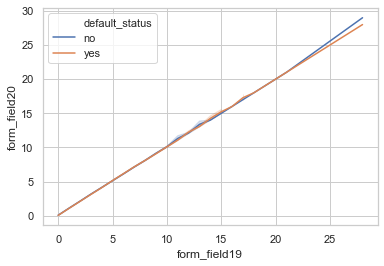

In [21]:
sns.lineplot(x='form_field19', y='form_field20', hue='default_status', data=train)

## MULTIVARIATE ANALYSIS

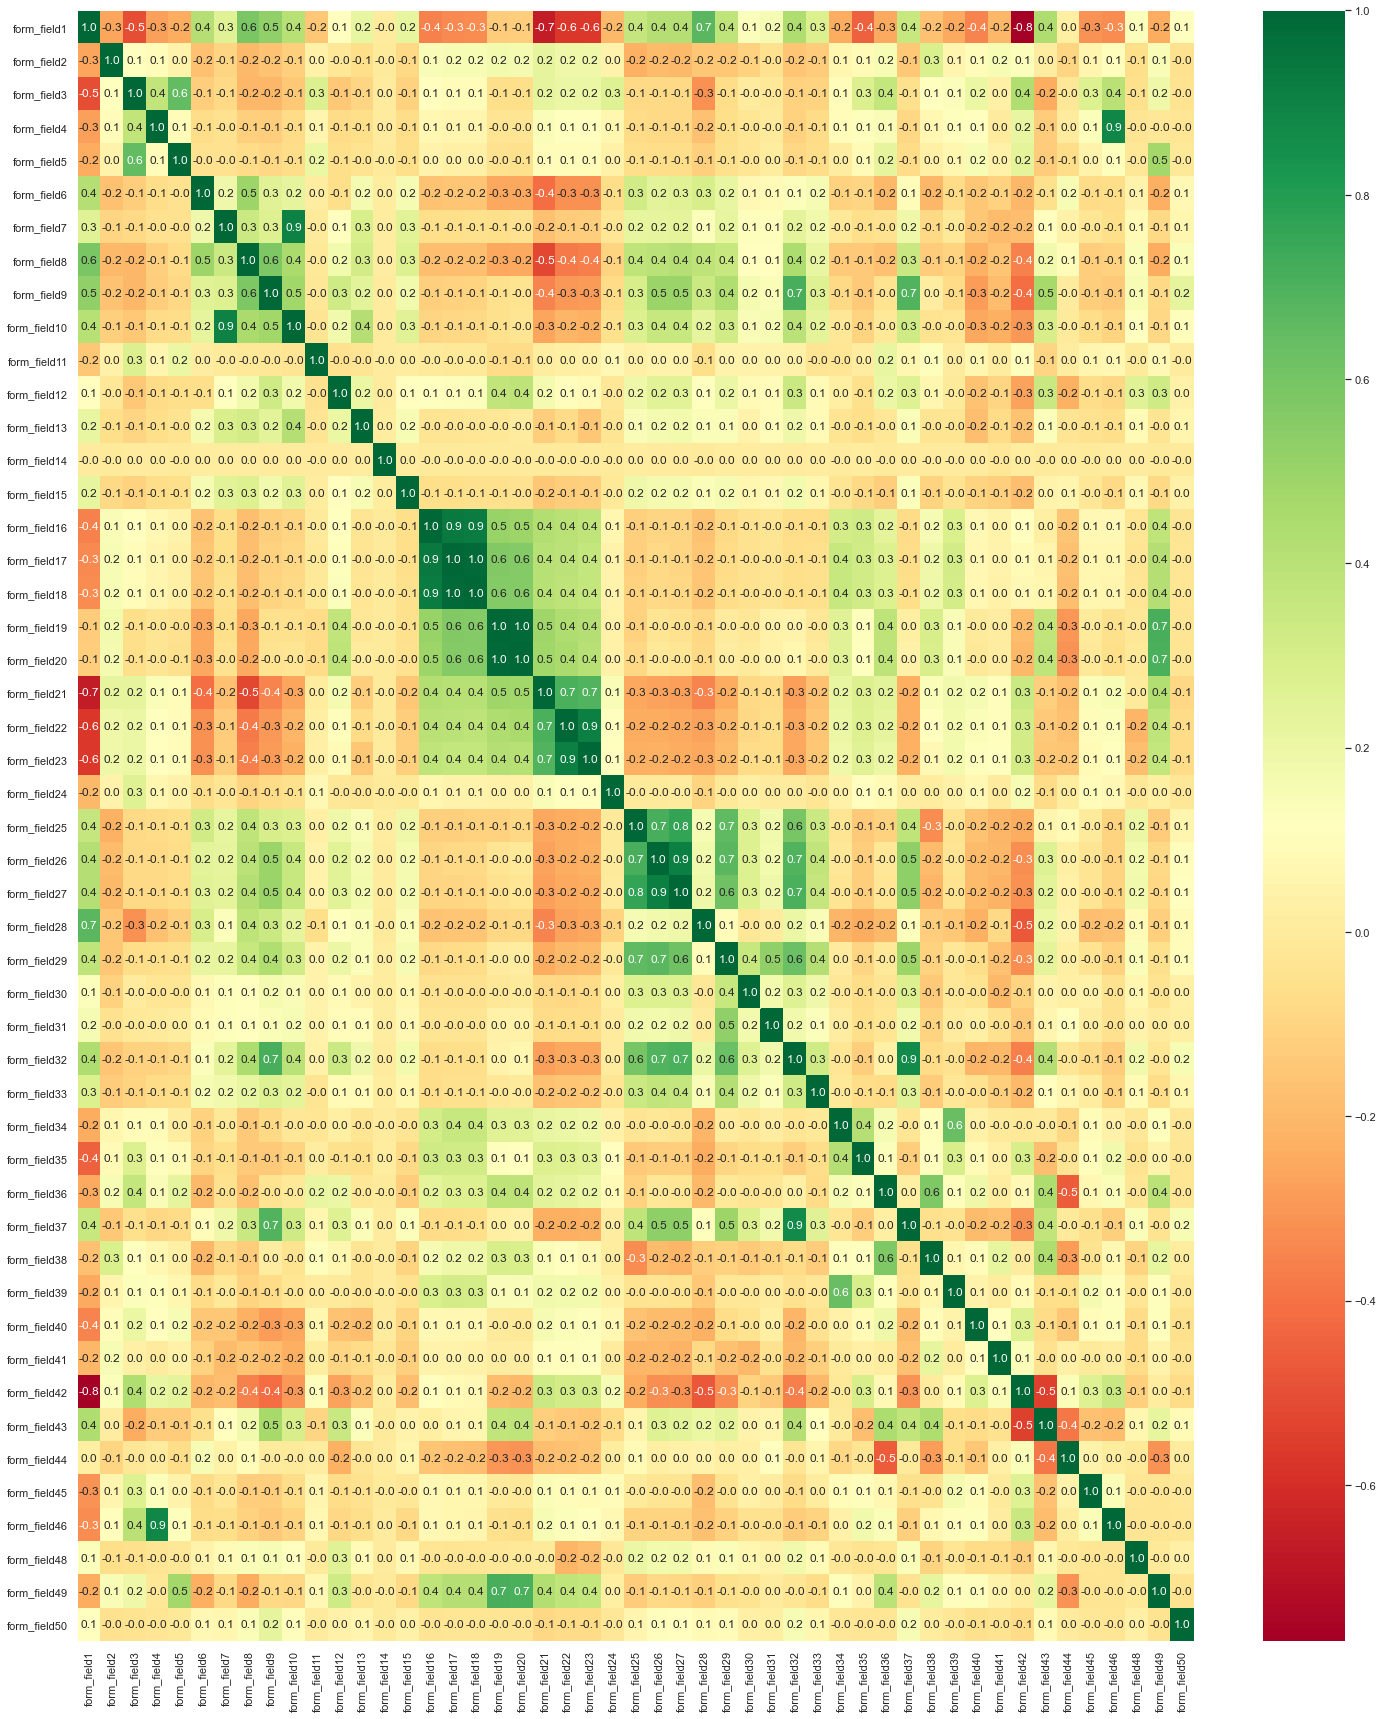

In [30]:
plt.figure(figsize = (25,30))
sns.heatmap(train.corr(), cmap='RdYlGn', annot = True, fmt='.1f')

## OBSERVATIONS

* form_field7(Maximum of credit available on customer’s active credit lines) and form_field10(Total amount of credit available on accepted credit lines) are positively correlated
* form_field42(Financial stress index of the borrower) and form_field1(Customer Creditworthiness score based on historical data) are highly negatively correlated
* form_field17(Number of active credit cards on which full credit limit is utilized by the borrower) and form_field18(Number of active credit lines on which full credit limit is utilized by the borrower) are highly positively correlated as well as form_field19(Number of active credit cards on which at least 75% credit limit is utilized by the borrower) and form_field20(Number of active credit lines on which at least 75% credit limit is utilized by the borrower)
* form_field37(Number of credit cards with an active tenure of at least 2 years) and form_field32(Sum of tenures (in months) of active credit cards) are highly positively correlated.

In [31]:
# Filling null values
train.fillna(-999, inplace=True)
test.fillna(-999, inplace=True)

## FEATURE ENGINEERING

After doing the exploratory data analysis:
* I dropped form_field17 and form_field20 due to multicollinearity with form_field18 and form_field19 respectively.
* I created a new feature called surplus salary by subtracting form_field14 (annual income) from form_field13(annual amount paid towards all credit cards during the previous year)
* And also created some other features but after submission, I noticed that dropping columns and creating new features reduced my score. Therefore, I had to exclude engineering features.

In [32]:
# label encode the categorical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cat_col = ['form_field47', 'default_status']
for col in cat_col:
    train[col] = encoder.fit_transform(train[col])
test['form_field47'] = encoder.fit_transform(test['form_field47'])

In [33]:
y = train.default_status
X=train.drop(columns='default_status')

## BUILDING MODELS

In [43]:
scores, predictions = [], []
MinMaxScaler()
splits = 30
i = 1

In [44]:
skfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=32)

In [45]:
lgb = LGBMClassifier(random_state=32)

In [47]:
for train_split, test_split in skfold.split(X, y):
    pipe = Pipeline(steps = [('scaler', MinMaxScaler()), ('model', lgb)])
    X_train, X_test, y_train, y_test = X.iloc[train_split], X.iloc[test_split], y.iloc[train_split], y.iloc[test_split]
    pipe.fit(X_train, y_train)
    X_pred = pipe.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test, X_pred)
    prediction = pipe.predict_proba(test)[:,1]
    scores.append(score)
    predictions.append(prediction)
    print('ROC_AUC_SCORE for {} split: '.format(i), score)
    i +=1
    
lgb_pred = np.mean(predictions, axis=0)

ROC_AUC_SCORE for 1 split:  0.8371649828514673
ROC_AUC_SCORE for 2 split:  0.838608253022332
ROC_AUC_SCORE for 3 split:  0.8356301503794404
ROC_AUC_SCORE for 4 split:  0.8182814221642846
ROC_AUC_SCORE for 5 split:  0.8345034685041204
ROC_AUC_SCORE for 6 split:  0.8578115058118783
ROC_AUC_SCORE for 7 split:  0.8489408259229946
ROC_AUC_SCORE for 8 split:  0.839977031829539
ROC_AUC_SCORE for 9 split:  0.8318574731908687
ROC_AUC_SCORE for 10 split:  0.8435960705805672
ROC_AUC_SCORE for 11 split:  0.8200195539829601
ROC_AUC_SCORE for 12 split:  0.8461846454676661
ROC_AUC_SCORE for 13 split:  0.8211415801480515
ROC_AUC_SCORE for 14 split:  0.8214954141254248
ROC_AUC_SCORE for 15 split:  0.8469900833372132
ROC_AUC_SCORE for 16 split:  0.8599303913395173
ROC_AUC_SCORE for 17 split:  0.8228233347073245
ROC_AUC_SCORE for 18 split:  0.8318343400658896
ROC_AUC_SCORE for 19 split:  0.8459869646471064
ROC_AUC_SCORE for 20 split:  0.8554953960968323
ROC_AUC_SCORE for 21 split:  0.8240305755591205
ROC

In [49]:
lgbm_score = np.mean(scores, axis=0)
lgbm_score

0.8377463917353088

In [50]:
prediction= pd.DataFrame({'Applicant_ID': test_id, 'default_status': lgb_pred})

In [51]:
prediction.to_csv('lgbm.csv', index=False)

In [56]:
rf = RandomForestClassifier(random_state=32)

In [60]:
scores, predictions = [], []
MinMaxScaler()
splits = 30
j = 1

In [61]:
skfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=32)

In [62]:
for train_split, test_split in skfold.split(X, y):
    pipe = Pipeline(steps = [('scaler', MinMaxScaler()), ('model', rf)])
    X_train, X_test, y_train, y_test = X.iloc[train_split], X.iloc[test_split], y.iloc[train_split], y.iloc[test_split]
    pipe.fit(X_train, y_train)
    X_pred = pipe.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test, X_pred)
    prediction = pipe.predict_proba(test)[:,1]
    scores.append(score)
    predictions.append(prediction)
    print('ROC_AUC_SCORE for {} split: '.format(j), score)
    j +=1
    
rf_pred = np.mean(predictions, axis=0)

ROC_AUC_SCORE for 1 split:  0.8273003088287785
ROC_AUC_SCORE for 2 split:  0.8380658627807005
ROC_AUC_SCORE for 3 split:  0.8291106041559974
ROC_AUC_SCORE for 4 split:  0.8129677048900475
ROC_AUC_SCORE for 5 split:  0.8296250601362571
ROC_AUC_SCORE for 6 split:  0.8553276844049227
ROC_AUC_SCORE for 7 split:  0.8381000046557102
ROC_AUC_SCORE for 8 split:  0.8323967596256809
ROC_AUC_SCORE for 9 split:  0.8222154973074476
ROC_AUC_SCORE for 10 split:  0.8308433043127397
ROC_AUC_SCORE for 11 split:  0.8124470412961496
ROC_AUC_SCORE for 12 split:  0.8394222263606314
ROC_AUC_SCORE for 13 split:  0.8164532799478561
ROC_AUC_SCORE for 14 split:  0.818034669522169
ROC_AUC_SCORE for 15 split:  0.83907847975542
ROC_AUC_SCORE for 16 split:  0.8489165098973845
ROC_AUC_SCORE for 17 split:  0.8150094061569264
ROC_AUC_SCORE for 18 split:  0.8248440313517903
ROC_AUC_SCORE for 19 split:  0.8455592711855476
ROC_AUC_SCORE for 20 split:  0.8513695488453826
ROC_AUC_SCORE for 21 split:  0.8143980630923742
ROC_

In [64]:
rf_score = np.mean(scores, axis=0)
rf_score

0.8312786632095576

In [65]:
prediction= pd.DataFrame({'Applicant_ID': test_id, 'default_status': rf_pred})

In [66]:
prediction.to_csv('rf_pred.csv', index=False)

In [67]:
cat_boost = CatBoostClassifier(random_state=32)

In [68]:
cat_scores, predictions = [], []
MinMaxScaler()
splits = 30
k = 1

In [69]:
skfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=32)

In [70]:
for train_split, test_split in skfold.split(X, y):
    pipe = Pipeline(steps = [('scaler', MinMaxScaler()), ('model', cat_boost)])
    X_train, X_test, y_train, y_test = X.iloc[train_split], X.iloc[test_split], y.iloc[train_split], y.iloc[test_split]
    pipe.fit(X_train, y_train)
    X_pred = pipe.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test, X_pred)
    prediction = pipe.predict_proba(test)[:,1]
    cat_scores.append(score)
    predictions.append(prediction)
    print('ROC_AUC_SCORE for {} split: '.format(k), score)
    k +=1
    
cat_pred = np.mean(predictions, axis=0)

Learning rate set to 0.05664
0:	learn: 0.6589292	total: 415ms	remaining: 6m 54s
1:	learn: 0.6287146	total: 553ms	remaining: 4m 35s
2:	learn: 0.6042895	total: 749ms	remaining: 4m 8s
3:	learn: 0.5845229	total: 852ms	remaining: 3m 32s
4:	learn: 0.5640280	total: 998ms	remaining: 3m 18s
5:	learn: 0.5467861	total: 1.11s	remaining: 3m 3s
6:	learn: 0.5318170	total: 1.22s	remaining: 2m 53s
7:	learn: 0.5184533	total: 1.35s	remaining: 2m 47s
8:	learn: 0.5077373	total: 1.49s	remaining: 2m 44s
9:	learn: 0.4987951	total: 1.6s	remaining: 2m 38s
10:	learn: 0.4901576	total: 1.72s	remaining: 2m 34s
11:	learn: 0.4831756	total: 1.84s	remaining: 2m 31s
12:	learn: 0.4771048	total: 1.98s	remaining: 2m 30s
13:	learn: 0.4704398	total: 2.1s	remaining: 2m 28s
14:	learn: 0.4648891	total: 2.24s	remaining: 2m 27s
15:	learn: 0.4607539	total: 2.35s	remaining: 2m 24s
16:	learn: 0.4564745	total: 2.47s	remaining: 2m 23s
17:	learn: 0.4527376	total: 2.63s	remaining: 2m 23s
18:	learn: 0.4496458	total: 2.79s	remaining: 2m 2

159:	learn: 0.3965185	total: 23.4s	remaining: 2m 2s
160:	learn: 0.3964149	total: 23.5s	remaining: 2m 2s
161:	learn: 0.3963152	total: 23.6s	remaining: 2m 2s
162:	learn: 0.3962138	total: 23.7s	remaining: 2m 1s
163:	learn: 0.3961140	total: 23.9s	remaining: 2m 1s
164:	learn: 0.3960110	total: 24s	remaining: 2m 1s
165:	learn: 0.3958894	total: 24.1s	remaining: 2m 1s
166:	learn: 0.3957672	total: 24.2s	remaining: 2m
167:	learn: 0.3956267	total: 24.3s	remaining: 2m
168:	learn: 0.3955225	total: 24.4s	remaining: 2m
169:	learn: 0.3954382	total: 24.5s	remaining: 1m 59s
170:	learn: 0.3953237	total: 24.7s	remaining: 1m 59s
171:	learn: 0.3952583	total: 24.8s	remaining: 1m 59s
172:	learn: 0.3951766	total: 24.9s	remaining: 1m 58s
173:	learn: 0.3950856	total: 25s	remaining: 1m 58s
174:	learn: 0.3949591	total: 25.1s	remaining: 1m 58s
175:	learn: 0.3948836	total: 25.2s	remaining: 1m 57s
176:	learn: 0.3947892	total: 25.3s	remaining: 1m 57s
177:	learn: 0.3946879	total: 25.4s	remaining: 1m 57s
178:	learn: 0.39

316:	learn: 0.3802685	total: 41s	remaining: 1m 28s
317:	learn: 0.3802194	total: 41.1s	remaining: 1m 28s
318:	learn: 0.3801046	total: 41.2s	remaining: 1m 27s
319:	learn: 0.3799992	total: 41.3s	remaining: 1m 27s
320:	learn: 0.3799175	total: 41.4s	remaining: 1m 27s
321:	learn: 0.3798202	total: 41.5s	remaining: 1m 27s
322:	learn: 0.3797302	total: 41.6s	remaining: 1m 27s
323:	learn: 0.3796337	total: 41.7s	remaining: 1m 26s
324:	learn: 0.3794892	total: 41.8s	remaining: 1m 26s
325:	learn: 0.3793977	total: 41.9s	remaining: 1m 26s
326:	learn: 0.3793451	total: 42s	remaining: 1m 26s
327:	learn: 0.3792794	total: 42.1s	remaining: 1m 26s
328:	learn: 0.3791805	total: 42.2s	remaining: 1m 26s
329:	learn: 0.3790888	total: 42.3s	remaining: 1m 25s
330:	learn: 0.3789703	total: 42.4s	remaining: 1m 25s
331:	learn: 0.3788823	total: 42.5s	remaining: 1m 25s
332:	learn: 0.3787944	total: 42.6s	remaining: 1m 25s
333:	learn: 0.3786783	total: 42.7s	remaining: 1m 25s
334:	learn: 0.3785611	total: 42.8s	remaining: 1m 2

472:	learn: 0.3665476	total: 58.3s	remaining: 1m 5s
473:	learn: 0.3664564	total: 58.4s	remaining: 1m 4s
474:	learn: 0.3663873	total: 58.5s	remaining: 1m 4s
475:	learn: 0.3663296	total: 58.7s	remaining: 1m 4s
476:	learn: 0.3662529	total: 58.8s	remaining: 1m 4s
477:	learn: 0.3662468	total: 58.8s	remaining: 1m 4s
478:	learn: 0.3661397	total: 58.9s	remaining: 1m 4s
479:	learn: 0.3660386	total: 59.1s	remaining: 1m 3s
480:	learn: 0.3659652	total: 59.2s	remaining: 1m 3s
481:	learn: 0.3658925	total: 59.3s	remaining: 1m 3s
482:	learn: 0.3657876	total: 59.4s	remaining: 1m 3s
483:	learn: 0.3657092	total: 59.5s	remaining: 1m 3s
484:	learn: 0.3656421	total: 59.6s	remaining: 1m 3s
485:	learn: 0.3655454	total: 59.7s	remaining: 1m 3s
486:	learn: 0.3654599	total: 59.8s	remaining: 1m 2s
487:	learn: 0.3653375	total: 59.9s	remaining: 1m 2s
488:	learn: 0.3652320	total: 1m	remaining: 1m 2s
489:	learn: 0.3651509	total: 1m	remaining: 1m 2s
490:	learn: 0.3650606	total: 1m	remaining: 1m 2s
491:	learn: 0.3649619

630:	learn: 0.3541440	total: 1m 17s	remaining: 45.2s
631:	learn: 0.3540846	total: 1m 17s	remaining: 45.1s
632:	learn: 0.3540039	total: 1m 17s	remaining: 44.9s
633:	learn: 0.3539252	total: 1m 17s	remaining: 44.8s
634:	learn: 0.3538286	total: 1m 17s	remaining: 44.7s
635:	learn: 0.3537684	total: 1m 17s	remaining: 44.6s
636:	learn: 0.3536733	total: 1m 18s	remaining: 44.5s
637:	learn: 0.3536110	total: 1m 18s	remaining: 44.4s
638:	learn: 0.3535395	total: 1m 18s	remaining: 44.2s
639:	learn: 0.3534658	total: 1m 18s	remaining: 44.1s
640:	learn: 0.3534048	total: 1m 18s	remaining: 44s
641:	learn: 0.3533477	total: 1m 18s	remaining: 43.9s
642:	learn: 0.3532491	total: 1m 18s	remaining: 43.8s
643:	learn: 0.3531742	total: 1m 18s	remaining: 43.6s
644:	learn: 0.3530935	total: 1m 19s	remaining: 43.5s
645:	learn: 0.3530091	total: 1m 19s	remaining: 43.4s
646:	learn: 0.3529302	total: 1m 19s	remaining: 43.3s
647:	learn: 0.3529267	total: 1m 19s	remaining: 43.1s
648:	learn: 0.3528553	total: 1m 19s	remaining: 4

786:	learn: 0.3433948	total: 1m 35s	remaining: 25.8s
787:	learn: 0.3433232	total: 1m 35s	remaining: 25.7s
788:	learn: 0.3432441	total: 1m 35s	remaining: 25.6s
789:	learn: 0.3431743	total: 1m 35s	remaining: 25.4s
790:	learn: 0.3431005	total: 1m 35s	remaining: 25.3s
791:	learn: 0.3430511	total: 1m 35s	remaining: 25.2s
792:	learn: 0.3429670	total: 1m 36s	remaining: 25.1s
793:	learn: 0.3429255	total: 1m 36s	remaining: 24.9s
794:	learn: 0.3428243	total: 1m 36s	remaining: 24.8s
795:	learn: 0.3427756	total: 1m 36s	remaining: 24.7s
796:	learn: 0.3427130	total: 1m 36s	remaining: 24.6s
797:	learn: 0.3426350	total: 1m 36s	remaining: 24.4s
798:	learn: 0.3425462	total: 1m 36s	remaining: 24.3s
799:	learn: 0.3425075	total: 1m 36s	remaining: 24.2s
800:	learn: 0.3424130	total: 1m 36s	remaining: 24.1s
801:	learn: 0.3423605	total: 1m 36s	remaining: 23.9s
802:	learn: 0.3422904	total: 1m 37s	remaining: 23.8s
803:	learn: 0.3422246	total: 1m 37s	remaining: 23.7s
804:	learn: 0.3421501	total: 1m 37s	remaining:

941:	learn: 0.3328641	total: 1m 52s	remaining: 6.95s
942:	learn: 0.3327799	total: 1m 52s	remaining: 6.83s
943:	learn: 0.3327001	total: 1m 53s	remaining: 6.71s
944:	learn: 0.3326530	total: 1m 53s	remaining: 6.59s
945:	learn: 0.3325774	total: 1m 53s	remaining: 6.46s
946:	learn: 0.3325289	total: 1m 53s	remaining: 6.34s
947:	learn: 0.3324734	total: 1m 53s	remaining: 6.22s
948:	learn: 0.3323861	total: 1m 53s	remaining: 6.1s
949:	learn: 0.3323380	total: 1m 53s	remaining: 5.98s
950:	learn: 0.3322657	total: 1m 53s	remaining: 5.86s
951:	learn: 0.3322035	total: 1m 53s	remaining: 5.74s
952:	learn: 0.3321514	total: 1m 54s	remaining: 5.63s
953:	learn: 0.3320642	total: 1m 54s	remaining: 5.51s
954:	learn: 0.3320116	total: 1m 54s	remaining: 5.39s
955:	learn: 0.3319240	total: 1m 54s	remaining: 5.27s
956:	learn: 0.3318514	total: 1m 54s	remaining: 5.15s
957:	learn: 0.3317907	total: 1m 54s	remaining: 5.03s
958:	learn: 0.3317143	total: 1m 54s	remaining: 4.91s
959:	learn: 0.3316673	total: 1m 54s	remaining: 

97:	learn: 0.4046240	total: 12.5s	remaining: 1m 55s
98:	learn: 0.4045031	total: 12.7s	remaining: 1m 55s
99:	learn: 0.4043474	total: 12.8s	remaining: 1m 55s
100:	learn: 0.4042307	total: 12.9s	remaining: 1m 55s
101:	learn: 0.4040791	total: 13.1s	remaining: 1m 54s
102:	learn: 0.4039337	total: 13.2s	remaining: 1m 54s
103:	learn: 0.4037662	total: 13.3s	remaining: 1m 54s
104:	learn: 0.4036130	total: 13.4s	remaining: 1m 54s
105:	learn: 0.4034810	total: 13.5s	remaining: 1m 54s
106:	learn: 0.4033320	total: 13.7s	remaining: 1m 54s
107:	learn: 0.4031962	total: 13.8s	remaining: 1m 54s
108:	learn: 0.4030476	total: 13.9s	remaining: 1m 54s
109:	learn: 0.4029275	total: 14.1s	remaining: 1m 54s
110:	learn: 0.4028120	total: 14.2s	remaining: 1m 53s
111:	learn: 0.4026980	total: 14.3s	remaining: 1m 53s
112:	learn: 0.4026149	total: 14.4s	remaining: 1m 53s
113:	learn: 0.4024540	total: 14.5s	remaining: 1m 52s
114:	learn: 0.4023143	total: 14.6s	remaining: 1m 52s
115:	learn: 0.4021695	total: 14.8s	remaining: 1m 

254:	learn: 0.3874020	total: 32.2s	remaining: 1m 34s
255:	learn: 0.3872775	total: 32.3s	remaining: 1m 33s
256:	learn: 0.3871204	total: 32.4s	remaining: 1m 33s
257:	learn: 0.3870817	total: 32.5s	remaining: 1m 33s
258:	learn: 0.3869840	total: 32.6s	remaining: 1m 33s
259:	learn: 0.3868615	total: 32.7s	remaining: 1m 33s
260:	learn: 0.3867403	total: 32.8s	remaining: 1m 32s
261:	learn: 0.3866559	total: 32.9s	remaining: 1m 32s
262:	learn: 0.3865582	total: 33s	remaining: 1m 32s
263:	learn: 0.3864300	total: 33.1s	remaining: 1m 32s
264:	learn: 0.3863337	total: 33.2s	remaining: 1m 32s
265:	learn: 0.3862411	total: 33.3s	remaining: 1m 31s
266:	learn: 0.3861232	total: 33.4s	remaining: 1m 31s
267:	learn: 0.3859989	total: 33.5s	remaining: 1m 31s
268:	learn: 0.3859034	total: 33.7s	remaining: 1m 31s
269:	learn: 0.3857527	total: 33.8s	remaining: 1m 31s
270:	learn: 0.3856203	total: 33.9s	remaining: 1m 31s
271:	learn: 0.3855052	total: 34s	remaining: 1m 30s
272:	learn: 0.3854116	total: 34.1s	remaining: 1m 3

411:	learn: 0.3723464	total: 50s	remaining: 1m 11s
412:	learn: 0.3722783	total: 50.1s	remaining: 1m 11s
413:	learn: 0.3721894	total: 50.2s	remaining: 1m 11s
414:	learn: 0.3720970	total: 50.3s	remaining: 1m 10s
415:	learn: 0.3719931	total: 50.4s	remaining: 1m 10s
416:	learn: 0.3719138	total: 50.5s	remaining: 1m 10s
417:	learn: 0.3718213	total: 50.6s	remaining: 1m 10s
418:	learn: 0.3717261	total: 50.7s	remaining: 1m 10s
419:	learn: 0.3716429	total: 50.8s	remaining: 1m 10s
420:	learn: 0.3715469	total: 50.9s	remaining: 1m 10s
421:	learn: 0.3714906	total: 51s	remaining: 1m 9s
422:	learn: 0.3713772	total: 51.1s	remaining: 1m 9s
423:	learn: 0.3712768	total: 51.2s	remaining: 1m 9s
424:	learn: 0.3712089	total: 51.3s	remaining: 1m 9s
425:	learn: 0.3711310	total: 51.4s	remaining: 1m 9s
426:	learn: 0.3710292	total: 51.6s	remaining: 1m 9s
427:	learn: 0.3709669	total: 51.6s	remaining: 1m 9s
428:	learn: 0.3708835	total: 51.7s	remaining: 1m 8s
429:	learn: 0.3708015	total: 51.9s	remaining: 1m 8s
430:	l

571:	learn: 0.3599083	total: 1m 8s	remaining: 51.3s
572:	learn: 0.3597943	total: 1m 8s	remaining: 51.2s
573:	learn: 0.3597196	total: 1m 8s	remaining: 51.1s
574:	learn: 0.3596172	total: 1m 8s	remaining: 50.9s
575:	learn: 0.3595090	total: 1m 9s	remaining: 50.8s
576:	learn: 0.3594210	total: 1m 9s	remaining: 50.7s
577:	learn: 0.3593218	total: 1m 9s	remaining: 50.5s
578:	learn: 0.3592324	total: 1m 9s	remaining: 50.4s
579:	learn: 0.3591743	total: 1m 9s	remaining: 50.3s
580:	learn: 0.3591042	total: 1m 9s	remaining: 50.2s
581:	learn: 0.3590243	total: 1m 9s	remaining: 50.1s
582:	learn: 0.3589558	total: 1m 9s	remaining: 49.9s
583:	learn: 0.3588774	total: 1m 9s	remaining: 49.8s
584:	learn: 0.3587748	total: 1m 10s	remaining: 49.7s
585:	learn: 0.3586759	total: 1m 10s	remaining: 49.5s
586:	learn: 0.3585920	total: 1m 10s	remaining: 49.4s
587:	learn: 0.3585089	total: 1m 10s	remaining: 49.3s
588:	learn: 0.3584131	total: 1m 10s	remaining: 49.2s
589:	learn: 0.3583132	total: 1m 10s	remaining: 49s
590:	lea

727:	learn: 0.3481489	total: 1m 27s	remaining: 32.6s
728:	learn: 0.3480917	total: 1m 27s	remaining: 32.5s
729:	learn: 0.3480091	total: 1m 27s	remaining: 32.4s
730:	learn: 0.3479273	total: 1m 27s	remaining: 32.2s
731:	learn: 0.3478649	total: 1m 27s	remaining: 32.1s
732:	learn: 0.3477942	total: 1m 27s	remaining: 32s
733:	learn: 0.3477297	total: 1m 27s	remaining: 31.9s
734:	learn: 0.3476527	total: 1m 28s	remaining: 31.8s
735:	learn: 0.3475700	total: 1m 28s	remaining: 31.7s
736:	learn: 0.3474984	total: 1m 28s	remaining: 31.6s
737:	learn: 0.3474295	total: 1m 28s	remaining: 31.4s
738:	learn: 0.3473729	total: 1m 28s	remaining: 31.3s
739:	learn: 0.3473096	total: 1m 28s	remaining: 31.2s
740:	learn: 0.3472388	total: 1m 29s	remaining: 31.1s
741:	learn: 0.3471747	total: 1m 29s	remaining: 31s
742:	learn: 0.3471102	total: 1m 29s	remaining: 30.9s
743:	learn: 0.3470431	total: 1m 29s	remaining: 30.8s
744:	learn: 0.3469738	total: 1m 29s	remaining: 30.7s
745:	learn: 0.3469053	total: 1m 29s	remaining: 30.

883:	learn: 0.3377551	total: 1m 46s	remaining: 13.9s
884:	learn: 0.3377155	total: 1m 46s	remaining: 13.8s
885:	learn: 0.3376378	total: 1m 46s	remaining: 13.7s
886:	learn: 0.3375450	total: 1m 46s	remaining: 13.6s
887:	learn: 0.3374677	total: 1m 46s	remaining: 13.4s
888:	learn: 0.3374213	total: 1m 46s	remaining: 13.3s
889:	learn: 0.3373356	total: 1m 46s	remaining: 13.2s
890:	learn: 0.3372513	total: 1m 46s	remaining: 13.1s
891:	learn: 0.3371720	total: 1m 47s	remaining: 13s
892:	learn: 0.3371199	total: 1m 47s	remaining: 12.8s
893:	learn: 0.3370558	total: 1m 47s	remaining: 12.7s
894:	learn: 0.3369810	total: 1m 47s	remaining: 12.6s
895:	learn: 0.3369427	total: 1m 47s	remaining: 12.5s
896:	learn: 0.3368674	total: 1m 47s	remaining: 12.4s
897:	learn: 0.3367897	total: 1m 47s	remaining: 12.3s
898:	learn: 0.3367469	total: 1m 47s	remaining: 12.1s
899:	learn: 0.3367005	total: 1m 48s	remaining: 12s
900:	learn: 0.3366534	total: 1m 48s	remaining: 11.9s
901:	learn: 0.3366037	total: 1m 48s	remaining: 11.

39:	learn: 0.4199575	total: 4.92s	remaining: 1m 58s
40:	learn: 0.4193659	total: 5.04s	remaining: 1m 57s
41:	learn: 0.4187482	total: 5.15s	remaining: 1m 57s
42:	learn: 0.4181599	total: 5.25s	remaining: 1m 56s
43:	learn: 0.4176208	total: 5.35s	remaining: 1m 56s
44:	learn: 0.4171325	total: 5.46s	remaining: 1m 55s
45:	learn: 0.4166631	total: 5.55s	remaining: 1m 55s
46:	learn: 0.4161862	total: 5.68s	remaining: 1m 55s
47:	learn: 0.4157018	total: 5.8s	remaining: 1m 54s
48:	learn: 0.4152326	total: 5.89s	remaining: 1m 54s
49:	learn: 0.4148872	total: 6s	remaining: 1m 53s
50:	learn: 0.4145530	total: 6.11s	remaining: 1m 53s
51:	learn: 0.4141830	total: 6.21s	remaining: 1m 53s
52:	learn: 0.4137471	total: 6.32s	remaining: 1m 52s
53:	learn: 0.4133562	total: 6.42s	remaining: 1m 52s
54:	learn: 0.4130779	total: 6.53s	remaining: 1m 52s
55:	learn: 0.4128153	total: 6.64s	remaining: 1m 51s
56:	learn: 0.4124343	total: 6.74s	remaining: 1m 51s
57:	learn: 0.4120823	total: 6.84s	remaining: 1m 51s
58:	learn: 0.411

197:	learn: 0.3930686	total: 23s	remaining: 1m 33s
198:	learn: 0.3929439	total: 23.1s	remaining: 1m 33s
199:	learn: 0.3928620	total: 23.2s	remaining: 1m 32s
200:	learn: 0.3927338	total: 23.3s	remaining: 1m 32s
201:	learn: 0.3926174	total: 23.4s	remaining: 1m 32s
202:	learn: 0.3925435	total: 23.5s	remaining: 1m 32s
203:	learn: 0.3924058	total: 23.6s	remaining: 1m 32s
204:	learn: 0.3922798	total: 23.7s	remaining: 1m 32s
205:	learn: 0.3921577	total: 23.8s	remaining: 1m 31s
206:	learn: 0.3920568	total: 23.9s	remaining: 1m 31s
207:	learn: 0.3919778	total: 24.1s	remaining: 1m 31s
208:	learn: 0.3918663	total: 24.2s	remaining: 1m 31s
209:	learn: 0.3917853	total: 24.3s	remaining: 1m 31s
210:	learn: 0.3916828	total: 24.4s	remaining: 1m 31s
211:	learn: 0.3915922	total: 24.5s	remaining: 1m 30s
212:	learn: 0.3915087	total: 24.6s	remaining: 1m 30s
213:	learn: 0.3913997	total: 24.7s	remaining: 1m 30s
214:	learn: 0.3913013	total: 24.8s	remaining: 1m 30s
215:	learn: 0.3911904	total: 24.9s	remaining: 1m

354:	learn: 0.3768391	total: 42.5s	remaining: 1m 17s
355:	learn: 0.3767304	total: 42.6s	remaining: 1m 17s
356:	learn: 0.3766455	total: 42.7s	remaining: 1m 16s
357:	learn: 0.3765402	total: 42.8s	remaining: 1m 16s
358:	learn: 0.3764653	total: 42.9s	remaining: 1m 16s
359:	learn: 0.3763761	total: 43s	remaining: 1m 16s
360:	learn: 0.3762967	total: 43.1s	remaining: 1m 16s
361:	learn: 0.3762151	total: 43.2s	remaining: 1m 16s
362:	learn: 0.3761496	total: 43.3s	remaining: 1m 15s
363:	learn: 0.3760902	total: 43.4s	remaining: 1m 15s
364:	learn: 0.3760162	total: 43.5s	remaining: 1m 15s
365:	learn: 0.3758995	total: 43.6s	remaining: 1m 15s
366:	learn: 0.3758012	total: 43.7s	remaining: 1m 15s
367:	learn: 0.3757285	total: 43.8s	remaining: 1m 15s
368:	learn: 0.3756294	total: 44s	remaining: 1m 15s
369:	learn: 0.3755475	total: 44s	remaining: 1m 14s
370:	learn: 0.3754436	total: 44.1s	remaining: 1m 14s
371:	learn: 0.3753487	total: 44.2s	remaining: 1m 14s
372:	learn: 0.3752535	total: 44.4s	remaining: 1m 14s

512:	learn: 0.3633108	total: 1m 1s	remaining: 58.3s
513:	learn: 0.3632544	total: 1m 1s	remaining: 58.4s
514:	learn: 0.3631600	total: 1m 1s	remaining: 58.3s
515:	learn: 0.3631573	total: 1m 2s	remaining: 58.2s
516:	learn: 0.3630681	total: 1m 2s	remaining: 58.2s
517:	learn: 0.3629887	total: 1m 2s	remaining: 58.1s
518:	learn: 0.3629104	total: 1m 2s	remaining: 58s
519:	learn: 0.3628275	total: 1m 2s	remaining: 57.9s
520:	learn: 0.3627585	total: 1m 2s	remaining: 57.9s
521:	learn: 0.3626836	total: 1m 3s	remaining: 57.8s
522:	learn: 0.3625951	total: 1m 3s	remaining: 58s
523:	learn: 0.3624981	total: 1m 3s	remaining: 58s
524:	learn: 0.3623911	total: 1m 4s	remaining: 58s
525:	learn: 0.3622891	total: 1m 4s	remaining: 58s
526:	learn: 0.3622050	total: 1m 4s	remaining: 57.9s
527:	learn: 0.3621095	total: 1m 4s	remaining: 57.8s
528:	learn: 0.3620088	total: 1m 4s	remaining: 57.6s
529:	learn: 0.3619461	total: 1m 4s	remaining: 57.6s
530:	learn: 0.3618544	total: 1m 5s	remaining: 57.4s
531:	learn: 0.3617687	

670:	learn: 0.3517448	total: 1m 27s	remaining: 42.7s
671:	learn: 0.3516864	total: 1m 27s	remaining: 42.6s
672:	learn: 0.3516060	total: 1m 27s	remaining: 42.4s
673:	learn: 0.3515036	total: 1m 27s	remaining: 42.3s
674:	learn: 0.3514362	total: 1m 27s	remaining: 42.2s
675:	learn: 0.3513632	total: 1m 27s	remaining: 42s
676:	learn: 0.3512483	total: 1m 27s	remaining: 41.9s
677:	learn: 0.3511568	total: 1m 27s	remaining: 41.8s
678:	learn: 0.3510740	total: 1m 28s	remaining: 41.6s
679:	learn: 0.3510252	total: 1m 28s	remaining: 41.5s
680:	learn: 0.3509173	total: 1m 28s	remaining: 41.4s
681:	learn: 0.3508465	total: 1m 28s	remaining: 41.2s
682:	learn: 0.3507666	total: 1m 28s	remaining: 41.1s
683:	learn: 0.3506889	total: 1m 28s	remaining: 41s
684:	learn: 0.3506006	total: 1m 28s	remaining: 40.8s
685:	learn: 0.3505310	total: 1m 28s	remaining: 40.7s
686:	learn: 0.3504638	total: 1m 28s	remaining: 40.5s
687:	learn: 0.3503990	total: 1m 29s	remaining: 40.4s
688:	learn: 0.3503103	total: 1m 29s	remaining: 40.

827:	learn: 0.3407885	total: 1m 49s	remaining: 22.7s
828:	learn: 0.3407327	total: 1m 49s	remaining: 22.6s
829:	learn: 0.3406557	total: 1m 49s	remaining: 22.4s
830:	learn: 0.3405554	total: 1m 49s	remaining: 22.3s
831:	learn: 0.3404764	total: 1m 49s	remaining: 22.2s
832:	learn: 0.3404169	total: 1m 50s	remaining: 22.1s
833:	learn: 0.3403564	total: 1m 50s	remaining: 22s
834:	learn: 0.3402903	total: 1m 50s	remaining: 21.9s
835:	learn: 0.3402325	total: 1m 50s	remaining: 21.8s
836:	learn: 0.3401745	total: 1m 51s	remaining: 21.6s
837:	learn: 0.3401296	total: 1m 51s	remaining: 21.5s
838:	learn: 0.3400585	total: 1m 51s	remaining: 21.4s
839:	learn: 0.3400187	total: 1m 51s	remaining: 21.3s
840:	learn: 0.3399505	total: 1m 52s	remaining: 21.2s
841:	learn: 0.3398742	total: 1m 52s	remaining: 21.1s
842:	learn: 0.3398099	total: 1m 52s	remaining: 20.9s
843:	learn: 0.3397597	total: 1m 52s	remaining: 20.8s
844:	learn: 0.3397110	total: 1m 52s	remaining: 20.7s
845:	learn: 0.3396564	total: 1m 52s	remaining: 2

985:	learn: 0.3306895	total: 2m 13s	remaining: 1.9s
986:	learn: 0.3306062	total: 2m 13s	remaining: 1.76s
987:	learn: 0.3305591	total: 2m 13s	remaining: 1.63s
988:	learn: 0.3305056	total: 2m 13s	remaining: 1.49s
989:	learn: 0.3304581	total: 2m 14s	remaining: 1.35s
990:	learn: 0.3303596	total: 2m 14s	remaining: 1.22s
991:	learn: 0.3303042	total: 2m 14s	remaining: 1.08s
992:	learn: 0.3302297	total: 2m 14s	remaining: 947ms
993:	learn: 0.3301458	total: 2m 14s	remaining: 812ms
994:	learn: 0.3300860	total: 2m 14s	remaining: 676ms
995:	learn: 0.3300187	total: 2m 14s	remaining: 541ms
996:	learn: 0.3299402	total: 2m 14s	remaining: 406ms
997:	learn: 0.3298422	total: 2m 14s	remaining: 271ms
998:	learn: 0.3297831	total: 2m 15s	remaining: 135ms
999:	learn: 0.3297021	total: 2m 15s	remaining: 0us
ROC_AUC_SCORE for 3 split:  0.8414761705231466
Learning rate set to 0.05664
0:	learn: 0.6584611	total: 134ms	remaining: 2m 14s
1:	learn: 0.6264013	total: 243ms	remaining: 2m 1s
2:	learn: 0.6014710	total: 352m

143:	learn: 0.3973862	total: 19s	remaining: 1m 52s
144:	learn: 0.3972586	total: 19.1s	remaining: 1m 52s
145:	learn: 0.3971511	total: 19.2s	remaining: 1m 52s
146:	learn: 0.3970241	total: 19.4s	remaining: 1m 52s
147:	learn: 0.3968971	total: 19.5s	remaining: 1m 52s
148:	learn: 0.3968103	total: 19.7s	remaining: 1m 52s
149:	learn: 0.3967173	total: 19.8s	remaining: 1m 52s
150:	learn: 0.3966641	total: 20s	remaining: 1m 52s
151:	learn: 0.3965777	total: 20.2s	remaining: 1m 52s
152:	learn: 0.3964908	total: 20.4s	remaining: 1m 52s
153:	learn: 0.3963592	total: 20.5s	remaining: 1m 52s
154:	learn: 0.3962778	total: 20.7s	remaining: 1m 52s
155:	learn: 0.3961592	total: 20.9s	remaining: 1m 52s
156:	learn: 0.3960197	total: 21s	remaining: 1m 52s
157:	learn: 0.3958880	total: 21.2s	remaining: 1m 53s
158:	learn: 0.3958221	total: 21.4s	remaining: 1m 53s
159:	learn: 0.3957470	total: 21.6s	remaining: 1m 53s
160:	learn: 0.3956397	total: 21.7s	remaining: 1m 53s
161:	learn: 0.3955868	total: 21.9s	remaining: 1m 53s

299:	learn: 0.3813800	total: 40.7s	remaining: 1m 34s
300:	learn: 0.3812956	total: 40.8s	remaining: 1m 34s
301:	learn: 0.3811878	total: 41s	remaining: 1m 34s
302:	learn: 0.3810723	total: 41.1s	remaining: 1m 34s
303:	learn: 0.3809824	total: 41.3s	remaining: 1m 34s
304:	learn: 0.3809346	total: 41.4s	remaining: 1m 34s
305:	learn: 0.3808501	total: 41.5s	remaining: 1m 34s
306:	learn: 0.3807533	total: 41.7s	remaining: 1m 34s
307:	learn: 0.3806512	total: 41.8s	remaining: 1m 33s
308:	learn: 0.3805383	total: 41.9s	remaining: 1m 33s
309:	learn: 0.3804509	total: 42s	remaining: 1m 33s
310:	learn: 0.3803565	total: 42.1s	remaining: 1m 33s
311:	learn: 0.3802797	total: 42.3s	remaining: 1m 33s
312:	learn: 0.3801648	total: 42.4s	remaining: 1m 33s
313:	learn: 0.3800372	total: 42.5s	remaining: 1m 32s
314:	learn: 0.3799478	total: 42.6s	remaining: 1m 32s
315:	learn: 0.3798500	total: 42.7s	remaining: 1m 32s
316:	learn: 0.3797556	total: 42.8s	remaining: 1m 32s
317:	learn: 0.3796653	total: 43s	remaining: 1m 32s

455:	learn: 0.3672064	total: 1m	remaining: 1m 12s
456:	learn: 0.3671935	total: 1m 1s	remaining: 1m 12s
457:	learn: 0.3671035	total: 1m 1s	remaining: 1m 12s
458:	learn: 0.3669779	total: 1m 1s	remaining: 1m 12s
459:	learn: 0.3668989	total: 1m 1s	remaining: 1m 12s
460:	learn: 0.3668269	total: 1m 1s	remaining: 1m 12s
461:	learn: 0.3667608	total: 1m 1s	remaining: 1m 12s
462:	learn: 0.3666943	total: 1m 1s	remaining: 1m 11s
463:	learn: 0.3666270	total: 1m 2s	remaining: 1m 11s
464:	learn: 0.3665304	total: 1m 2s	remaining: 1m 11s
465:	learn: 0.3664536	total: 1m 2s	remaining: 1m 11s
466:	learn: 0.3663905	total: 1m 2s	remaining: 1m 11s
467:	learn: 0.3662923	total: 1m 2s	remaining: 1m 11s
468:	learn: 0.3662105	total: 1m 2s	remaining: 1m 10s
469:	learn: 0.3661581	total: 1m 2s	remaining: 1m 10s
470:	learn: 0.3660629	total: 1m 2s	remaining: 1m 10s
471:	learn: 0.3660026	total: 1m 2s	remaining: 1m 10s
472:	learn: 0.3659253	total: 1m 3s	remaining: 1m 10s
473:	learn: 0.3658013	total: 1m 3s	remaining: 1m 

613:	learn: 0.3546785	total: 1m 20s	remaining: 50.3s
614:	learn: 0.3545872	total: 1m 20s	remaining: 50.1s
615:	learn: 0.3545097	total: 1m 20s	remaining: 50s
616:	learn: 0.3544009	total: 1m 20s	remaining: 49.9s
617:	learn: 0.3543253	total: 1m 20s	remaining: 49.7s
618:	learn: 0.3542546	total: 1m 20s	remaining: 49.6s
619:	learn: 0.3542059	total: 1m 20s	remaining: 49.4s
620:	learn: 0.3541522	total: 1m 20s	remaining: 49.3s
621:	learn: 0.3540784	total: 1m 20s	remaining: 49.1s
622:	learn: 0.3539869	total: 1m 20s	remaining: 49s
623:	learn: 0.3539818	total: 1m 21s	remaining: 48.8s
624:	learn: 0.3538594	total: 1m 21s	remaining: 48.7s
625:	learn: 0.3537777	total: 1m 21s	remaining: 48.6s
626:	learn: 0.3537199	total: 1m 21s	remaining: 48.4s
627:	learn: 0.3536470	total: 1m 21s	remaining: 48.3s
628:	learn: 0.3535794	total: 1m 21s	remaining: 48.1s
629:	learn: 0.3535112	total: 1m 21s	remaining: 48s
630:	learn: 0.3534178	total: 1m 21s	remaining: 47.8s
631:	learn: 0.3534127	total: 1m 21s	remaining: 47.7s

769:	learn: 0.3435799	total: 1m 37s	remaining: 29.3s
770:	learn: 0.3434900	total: 1m 38s	remaining: 29.1s
771:	learn: 0.3434403	total: 1m 38s	remaining: 29s
772:	learn: 0.3433787	total: 1m 38s	remaining: 28.9s
773:	learn: 0.3433086	total: 1m 38s	remaining: 28.7s
774:	learn: 0.3432091	total: 1m 38s	remaining: 28.6s
775:	learn: 0.3431472	total: 1m 38s	remaining: 28.4s
776:	learn: 0.3430760	total: 1m 38s	remaining: 28.3s
777:	learn: 0.3430401	total: 1m 38s	remaining: 28.2s
778:	learn: 0.3429676	total: 1m 38s	remaining: 28s
779:	learn: 0.3428751	total: 1m 38s	remaining: 27.9s
780:	learn: 0.3428061	total: 1m 39s	remaining: 27.8s
781:	learn: 0.3427444	total: 1m 39s	remaining: 27.6s
782:	learn: 0.3426926	total: 1m 39s	remaining: 27.5s
783:	learn: 0.3426153	total: 1m 39s	remaining: 27.4s
784:	learn: 0.3425606	total: 1m 39s	remaining: 27.2s
785:	learn: 0.3424756	total: 1m 39s	remaining: 27.1s
786:	learn: 0.3424056	total: 1m 39s	remaining: 27s
787:	learn: 0.3423745	total: 1m 39s	remaining: 26.9s

926:	learn: 0.3330618	total: 1m 54s	remaining: 9s
927:	learn: 0.3329923	total: 1m 54s	remaining: 8.88s
928:	learn: 0.3329037	total: 1m 54s	remaining: 8.75s
929:	learn: 0.3328224	total: 1m 54s	remaining: 8.63s
930:	learn: 0.3327612	total: 1m 54s	remaining: 8.5s
931:	learn: 0.3326746	total: 1m 54s	remaining: 8.38s
932:	learn: 0.3326175	total: 1m 54s	remaining: 8.25s
933:	learn: 0.3325657	total: 1m 55s	remaining: 8.13s
934:	learn: 0.3324965	total: 1m 55s	remaining: 8s
935:	learn: 0.3324111	total: 1m 55s	remaining: 7.88s
936:	learn: 0.3323351	total: 1m 55s	remaining: 7.76s
937:	learn: 0.3322683	total: 1m 55s	remaining: 7.63s
938:	learn: 0.3322027	total: 1m 55s	remaining: 7.51s
939:	learn: 0.3321561	total: 1m 55s	remaining: 7.39s
940:	learn: 0.3320851	total: 1m 55s	remaining: 7.26s
941:	learn: 0.3320266	total: 1m 55s	remaining: 7.14s
942:	learn: 0.3319696	total: 1m 56s	remaining: 7.02s
943:	learn: 0.3319134	total: 1m 56s	remaining: 6.89s
944:	learn: 0.3318577	total: 1m 56s	remaining: 6.77s


83:	learn: 0.4058978	total: 8.42s	remaining: 1m 31s
84:	learn: 0.4056308	total: 8.54s	remaining: 1m 31s
85:	learn: 0.4054508	total: 8.65s	remaining: 1m 31s
86:	learn: 0.4052715	total: 8.76s	remaining: 1m 31s
87:	learn: 0.4050572	total: 8.88s	remaining: 1m 32s
88:	learn: 0.4049133	total: 9.04s	remaining: 1m 32s
89:	learn: 0.4046869	total: 9.14s	remaining: 1m 32s
90:	learn: 0.4045418	total: 9.26s	remaining: 1m 32s
91:	learn: 0.4043148	total: 9.39s	remaining: 1m 32s
92:	learn: 0.4040908	total: 9.5s	remaining: 1m 32s
93:	learn: 0.4039672	total: 9.61s	remaining: 1m 32s
94:	learn: 0.4037965	total: 9.74s	remaining: 1m 32s
95:	learn: 0.4036441	total: 9.87s	remaining: 1m 32s
96:	learn: 0.4035384	total: 9.99s	remaining: 1m 33s
97:	learn: 0.4033795	total: 10.2s	remaining: 1m 33s
98:	learn: 0.4032448	total: 10.3s	remaining: 1m 33s
99:	learn: 0.4030926	total: 10.4s	remaining: 1m 33s
100:	learn: 0.4029655	total: 10.5s	remaining: 1m 33s
101:	learn: 0.4028204	total: 10.6s	remaining: 1m 33s
102:	learn:

239:	learn: 0.3882225	total: 26s	remaining: 1m 22s
240:	learn: 0.3881152	total: 26.2s	remaining: 1m 22s
241:	learn: 0.3879922	total: 26.3s	remaining: 1m 22s
242:	learn: 0.3879698	total: 26.4s	remaining: 1m 22s
243:	learn: 0.3878245	total: 26.6s	remaining: 1m 22s
244:	learn: 0.3877107	total: 26.7s	remaining: 1m 22s
245:	learn: 0.3876041	total: 26.9s	remaining: 1m 22s
246:	learn: 0.3874626	total: 27s	remaining: 1m 22s
247:	learn: 0.3873751	total: 27.2s	remaining: 1m 22s
248:	learn: 0.3872789	total: 27.3s	remaining: 1m 22s
249:	learn: 0.3872349	total: 27.5s	remaining: 1m 22s
250:	learn: 0.3871705	total: 27.6s	remaining: 1m 22s
251:	learn: 0.3871598	total: 27.7s	remaining: 1m 22s
252:	learn: 0.3870492	total: 27.9s	remaining: 1m 22s
253:	learn: 0.3869462	total: 28s	remaining: 1m 22s
254:	learn: 0.3868553	total: 28.1s	remaining: 1m 22s
255:	learn: 0.3867558	total: 28.3s	remaining: 1m 22s
256:	learn: 0.3866757	total: 28.4s	remaining: 1m 22s
257:	learn: 0.3865518	total: 28.6s	remaining: 1m 22s

397:	learn: 0.3736025	total: 44.2s	remaining: 1m 6s
398:	learn: 0.3735031	total: 44.3s	remaining: 1m 6s
399:	learn: 0.3734278	total: 44.4s	remaining: 1m 6s
400:	learn: 0.3733339	total: 44.5s	remaining: 1m 6s
401:	learn: 0.3732560	total: 44.6s	remaining: 1m 6s
402:	learn: 0.3731662	total: 44.7s	remaining: 1m 6s
403:	learn: 0.3730860	total: 44.8s	remaining: 1m 6s
404:	learn: 0.3730033	total: 44.9s	remaining: 1m 5s
405:	learn: 0.3729769	total: 45s	remaining: 1m 5s
406:	learn: 0.3728982	total: 45.1s	remaining: 1m 5s
407:	learn: 0.3728029	total: 45.2s	remaining: 1m 5s
408:	learn: 0.3727111	total: 45.3s	remaining: 1m 5s
409:	learn: 0.3726188	total: 45.4s	remaining: 1m 5s
410:	learn: 0.3725425	total: 45.5s	remaining: 1m 5s
411:	learn: 0.3724598	total: 45.6s	remaining: 1m 5s
412:	learn: 0.3723936	total: 45.7s	remaining: 1m 4s
413:	learn: 0.3722955	total: 45.8s	remaining: 1m 4s
414:	learn: 0.3721891	total: 45.9s	remaining: 1m 4s
415:	learn: 0.3721108	total: 46s	remaining: 1m 4s
416:	learn: 0.37

557:	learn: 0.3602300	total: 1m 1s	remaining: 48.7s
558:	learn: 0.3601667	total: 1m 1s	remaining: 48.5s
559:	learn: 0.3600902	total: 1m 1s	remaining: 48.4s
560:	learn: 0.3599857	total: 1m 1s	remaining: 48.4s
561:	learn: 0.3599186	total: 1m 1s	remaining: 48.3s
562:	learn: 0.3598316	total: 1m 2s	remaining: 48.2s
563:	learn: 0.3597627	total: 1m 2s	remaining: 48.1s
564:	learn: 0.3597284	total: 1m 2s	remaining: 47.9s
565:	learn: 0.3596388	total: 1m 2s	remaining: 47.8s
566:	learn: 0.3595709	total: 1m 2s	remaining: 47.7s
567:	learn: 0.3594636	total: 1m 2s	remaining: 47.6s
568:	learn: 0.3594256	total: 1m 2s	remaining: 47.5s
569:	learn: 0.3593514	total: 1m 2s	remaining: 47.4s
570:	learn: 0.3592701	total: 1m 2s	remaining: 47.3s
571:	learn: 0.3591827	total: 1m 3s	remaining: 47.2s
572:	learn: 0.3591088	total: 1m 3s	remaining: 47.1s
573:	learn: 0.3590209	total: 1m 3s	remaining: 47.1s
574:	learn: 0.3589343	total: 1m 3s	remaining: 47.1s
575:	learn: 0.3588540	total: 1m 3s	remaining: 47s
576:	learn: 0.

715:	learn: 0.3484707	total: 1m 21s	remaining: 32.2s
716:	learn: 0.3484062	total: 1m 21s	remaining: 32.1s
717:	learn: 0.3483451	total: 1m 21s	remaining: 32s
718:	learn: 0.3482901	total: 1m 21s	remaining: 31.9s
719:	learn: 0.3482729	total: 1m 21s	remaining: 31.8s
720:	learn: 0.3481900	total: 1m 21s	remaining: 31.6s
721:	learn: 0.3481172	total: 1m 21s	remaining: 31.5s
722:	learn: 0.3480474	total: 1m 21s	remaining: 31.4s
723:	learn: 0.3479480	total: 1m 22s	remaining: 31.3s
724:	learn: 0.3478935	total: 1m 22s	remaining: 31.2s
725:	learn: 0.3478330	total: 1m 22s	remaining: 31.1s
726:	learn: 0.3477670	total: 1m 22s	remaining: 31s
727:	learn: 0.3477014	total: 1m 22s	remaining: 30.8s
728:	learn: 0.3476254	total: 1m 22s	remaining: 30.7s
729:	learn: 0.3475620	total: 1m 22s	remaining: 30.6s
730:	learn: 0.3475008	total: 1m 22s	remaining: 30.5s
731:	learn: 0.3474268	total: 1m 23s	remaining: 30.4s
732:	learn: 0.3473648	total: 1m 23s	remaining: 30.3s
733:	learn: 0.3472806	total: 1m 23s	remaining: 30.

871:	learn: 0.3379839	total: 1m 40s	remaining: 14.8s
872:	learn: 0.3379338	total: 1m 40s	remaining: 14.7s
873:	learn: 0.3378566	total: 1m 41s	remaining: 14.6s
874:	learn: 0.3377619	total: 1m 41s	remaining: 14.5s
875:	learn: 0.3377007	total: 1m 41s	remaining: 14.3s
876:	learn: 0.3376249	total: 1m 41s	remaining: 14.2s
877:	learn: 0.3375627	total: 1m 41s	remaining: 14.1s
878:	learn: 0.3375102	total: 1m 41s	remaining: 14s
879:	learn: 0.3374344	total: 1m 41s	remaining: 13.9s
880:	learn: 0.3373680	total: 1m 41s	remaining: 13.8s
881:	learn: 0.3373006	total: 1m 41s	remaining: 13.6s
882:	learn: 0.3372219	total: 1m 42s	remaining: 13.5s
883:	learn: 0.3371617	total: 1m 42s	remaining: 13.4s
884:	learn: 0.3370663	total: 1m 42s	remaining: 13.3s
885:	learn: 0.3370177	total: 1m 42s	remaining: 13.2s
886:	learn: 0.3369186	total: 1m 42s	remaining: 13.1s
887:	learn: 0.3368568	total: 1m 42s	remaining: 12.9s
888:	learn: 0.3367759	total: 1m 42s	remaining: 12.8s
889:	learn: 0.3367007	total: 1m 42s	remaining: 1

27:	learn: 0.4310014	total: 4.28s	remaining: 2m 28s
28:	learn: 0.4296615	total: 4.46s	remaining: 2m 29s
29:	learn: 0.4285982	total: 4.61s	remaining: 2m 29s
30:	learn: 0.4274644	total: 4.74s	remaining: 2m 28s
31:	learn: 0.4264507	total: 4.86s	remaining: 2m 27s
32:	learn: 0.4255446	total: 5.02s	remaining: 2m 27s
33:	learn: 0.4245615	total: 5.14s	remaining: 2m 25s
34:	learn: 0.4237684	total: 5.31s	remaining: 2m 26s
35:	learn: 0.4229083	total: 5.45s	remaining: 2m 25s
36:	learn: 0.4220544	total: 5.59s	remaining: 2m 25s
37:	learn: 0.4214667	total: 5.7s	remaining: 2m 24s
38:	learn: 0.4207007	total: 5.84s	remaining: 2m 23s
39:	learn: 0.4199866	total: 5.96s	remaining: 2m 22s
40:	learn: 0.4194660	total: 6.1s	remaining: 2m 22s
41:	learn: 0.4188078	total: 6.22s	remaining: 2m 21s
42:	learn: 0.4181909	total: 6.35s	remaining: 2m 21s
43:	learn: 0.4177200	total: 6.47s	remaining: 2m 20s
44:	learn: 0.4171743	total: 6.63s	remaining: 2m 20s
45:	learn: 0.4166488	total: 6.75s	remaining: 2m 19s
46:	learn: 0.4

185:	learn: 0.3946641	total: 23.4s	remaining: 1m 42s
186:	learn: 0.3945680	total: 23.5s	remaining: 1m 42s
187:	learn: 0.3944701	total: 23.6s	remaining: 1m 41s
188:	learn: 0.3943376	total: 23.7s	remaining: 1m 41s
189:	learn: 0.3942351	total: 23.8s	remaining: 1m 41s
190:	learn: 0.3941575	total: 24s	remaining: 1m 41s
191:	learn: 0.3940531	total: 24.1s	remaining: 1m 41s
192:	learn: 0.3939252	total: 24.2s	remaining: 1m 41s
193:	learn: 0.3938147	total: 24.4s	remaining: 1m 41s
194:	learn: 0.3937240	total: 24.5s	remaining: 1m 41s
195:	learn: 0.3935961	total: 24.6s	remaining: 1m 40s
196:	learn: 0.3934859	total: 24.7s	remaining: 1m 40s
197:	learn: 0.3933728	total: 24.8s	remaining: 1m 40s
198:	learn: 0.3932677	total: 24.9s	remaining: 1m 40s
199:	learn: 0.3931596	total: 25.1s	remaining: 1m 40s
200:	learn: 0.3930507	total: 25.2s	remaining: 1m 40s
201:	learn: 0.3929332	total: 25.3s	remaining: 1m 39s
202:	learn: 0.3928203	total: 25.4s	remaining: 1m 39s
203:	learn: 0.3927319	total: 25.5s	remaining: 1m

342:	learn: 0.3787721	total: 42.2s	remaining: 1m 20s
343:	learn: 0.3786454	total: 42.3s	remaining: 1m 20s
344:	learn: 0.3785653	total: 42.4s	remaining: 1m 20s
345:	learn: 0.3784783	total: 42.5s	remaining: 1m 20s
346:	learn: 0.3783817	total: 42.6s	remaining: 1m 20s
347:	learn: 0.3782828	total: 42.8s	remaining: 1m 20s
348:	learn: 0.3781668	total: 42.9s	remaining: 1m 20s
349:	learn: 0.3780780	total: 43s	remaining: 1m 19s
350:	learn: 0.3780297	total: 43.2s	remaining: 1m 19s
351:	learn: 0.3779525	total: 43.3s	remaining: 1m 19s
352:	learn: 0.3778846	total: 43.4s	remaining: 1m 19s
353:	learn: 0.3777695	total: 43.5s	remaining: 1m 19s
354:	learn: 0.3776770	total: 43.6s	remaining: 1m 19s
355:	learn: 0.3775854	total: 43.7s	remaining: 1m 19s
356:	learn: 0.3774612	total: 43.8s	remaining: 1m 18s
357:	learn: 0.3773791	total: 44s	remaining: 1m 18s
358:	learn: 0.3772322	total: 44.1s	remaining: 1m 18s
359:	learn: 0.3771298	total: 44.2s	remaining: 1m 18s
360:	learn: 0.3770527	total: 44.3s	remaining: 1m 1

499:	learn: 0.3648340	total: 1m 1s	remaining: 1m 1s
500:	learn: 0.3647389	total: 1m 1s	remaining: 1m 1s
501:	learn: 0.3646782	total: 1m 1s	remaining: 1m 1s
502:	learn: 0.3645975	total: 1m 1s	remaining: 1m
503:	learn: 0.3645252	total: 1m 1s	remaining: 1m
504:	learn: 0.3644492	total: 1m 1s	remaining: 1m
505:	learn: 0.3643846	total: 1m 1s	remaining: 1m
506:	learn: 0.3643120	total: 1m 2s	remaining: 1m
507:	learn: 0.3642179	total: 1m 2s	remaining: 1m
508:	learn: 0.3641408	total: 1m 2s	remaining: 1m
509:	learn: 0.3640504	total: 1m 2s	remaining: 60s
510:	learn: 0.3639933	total: 1m 2s	remaining: 59.8s
511:	learn: 0.3639059	total: 1m 2s	remaining: 59.6s
512:	learn: 0.3638002	total: 1m 2s	remaining: 59.5s
513:	learn: 0.3637181	total: 1m 2s	remaining: 59.4s
514:	learn: 0.3636290	total: 1m 2s	remaining: 59.2s
515:	learn: 0.3635562	total: 1m 3s	remaining: 59.1s
516:	learn: 0.3634396	total: 1m 3s	remaining: 59s
517:	learn: 0.3633631	total: 1m 3s	remaining: 58.8s
518:	learn: 0.3632855	total: 1m 3s	re

657:	learn: 0.3526605	total: 1m 19s	remaining: 41.1s
658:	learn: 0.3526139	total: 1m 19s	remaining: 41s
659:	learn: 0.3525252	total: 1m 19s	remaining: 40.9s
660:	learn: 0.3524551	total: 1m 19s	remaining: 40.7s
661:	learn: 0.3523920	total: 1m 19s	remaining: 40.6s
662:	learn: 0.3523268	total: 1m 19s	remaining: 40.5s
663:	learn: 0.3522440	total: 1m 19s	remaining: 40.4s
664:	learn: 0.3521993	total: 1m 19s	remaining: 40.2s
665:	learn: 0.3521216	total: 1m 19s	remaining: 40.1s
666:	learn: 0.3520340	total: 1m 20s	remaining: 40s
667:	learn: 0.3519418	total: 1m 20s	remaining: 39.8s
668:	learn: 0.3518492	total: 1m 20s	remaining: 39.7s
669:	learn: 0.3517662	total: 1m 20s	remaining: 39.6s
670:	learn: 0.3516923	total: 1m 20s	remaining: 39.5s
671:	learn: 0.3516439	total: 1m 20s	remaining: 39.3s
672:	learn: 0.3515720	total: 1m 20s	remaining: 39.2s
673:	learn: 0.3515152	total: 1m 20s	remaining: 39.1s
674:	learn: 0.3514429	total: 1m 20s	remaining: 39s
675:	learn: 0.3513792	total: 1m 21s	remaining: 38.8s

814:	learn: 0.3415108	total: 1m 36s	remaining: 22s
815:	learn: 0.3414524	total: 1m 37s	remaining: 21.9s
816:	learn: 0.3414077	total: 1m 37s	remaining: 21.8s
817:	learn: 0.3413412	total: 1m 37s	remaining: 21.6s
818:	learn: 0.3412677	total: 1m 37s	remaining: 21.5s
819:	learn: 0.3412028	total: 1m 37s	remaining: 21.4s
820:	learn: 0.3411086	total: 1m 37s	remaining: 21.3s
821:	learn: 0.3410433	total: 1m 37s	remaining: 21.1s
822:	learn: 0.3409677	total: 1m 37s	remaining: 21s
823:	learn: 0.3408763	total: 1m 37s	remaining: 20.9s
824:	learn: 0.3408204	total: 1m 37s	remaining: 20.8s
825:	learn: 0.3407370	total: 1m 38s	remaining: 20.7s
826:	learn: 0.3406556	total: 1m 38s	remaining: 20.5s
827:	learn: 0.3406098	total: 1m 38s	remaining: 20.4s
828:	learn: 0.3405527	total: 1m 38s	remaining: 20.3s
829:	learn: 0.3404729	total: 1m 38s	remaining: 20.2s
830:	learn: 0.3404337	total: 1m 38s	remaining: 20.1s
831:	learn: 0.3403465	total: 1m 38s	remaining: 20s
832:	learn: 0.3403042	total: 1m 38s	remaining: 19.8s

970:	learn: 0.3315165	total: 1m 56s	remaining: 3.48s
971:	learn: 0.3314714	total: 1m 56s	remaining: 3.36s
972:	learn: 0.3314400	total: 1m 56s	remaining: 3.24s
973:	learn: 0.3313898	total: 1m 56s	remaining: 3.12s
974:	learn: 0.3313355	total: 1m 56s	remaining: 3s
975:	learn: 0.3312612	total: 1m 57s	remaining: 2.88s
976:	learn: 0.3312146	total: 1m 57s	remaining: 2.76s
977:	learn: 0.3311368	total: 1m 57s	remaining: 2.64s
978:	learn: 0.3310849	total: 1m 57s	remaining: 2.52s
979:	learn: 0.3310039	total: 1m 57s	remaining: 2.4s
980:	learn: 0.3309513	total: 1m 57s	remaining: 2.28s
981:	learn: 0.3309116	total: 1m 57s	remaining: 2.16s
982:	learn: 0.3308633	total: 1m 57s	remaining: 2.04s
983:	learn: 0.3307999	total: 1m 58s	remaining: 1.92s
984:	learn: 0.3307415	total: 1m 58s	remaining: 1.8s
985:	learn: 0.3306989	total: 1m 58s	remaining: 1.68s
986:	learn: 0.3306265	total: 1m 58s	remaining: 1.56s
987:	learn: 0.3305497	total: 1m 58s	remaining: 1.44s
988:	learn: 0.3304760	total: 1m 58s	remaining: 1.32

127:	learn: 0.4004905	total: 14.8s	remaining: 1m 41s
128:	learn: 0.4003982	total: 14.9s	remaining: 1m 40s
129:	learn: 0.4003196	total: 15s	remaining: 1m 40s
130:	learn: 0.4001933	total: 15.2s	remaining: 1m 40s
131:	learn: 0.4000954	total: 15.3s	remaining: 1m 40s
132:	learn: 0.3999727	total: 15.4s	remaining: 1m 40s
133:	learn: 0.3998465	total: 15.5s	remaining: 1m 40s
134:	learn: 0.3997085	total: 15.6s	remaining: 1m 39s
135:	learn: 0.3995976	total: 15.7s	remaining: 1m 39s
136:	learn: 0.3994942	total: 15.8s	remaining: 1m 39s
137:	learn: 0.3993589	total: 15.9s	remaining: 1m 39s
138:	learn: 0.3992464	total: 16s	remaining: 1m 39s
139:	learn: 0.3991447	total: 16.1s	remaining: 1m 38s
140:	learn: 0.3990712	total: 16.2s	remaining: 1m 38s
141:	learn: 0.3990120	total: 16.3s	remaining: 1m 38s
142:	learn: 0.3988731	total: 16.4s	remaining: 1m 38s
143:	learn: 0.3987151	total: 16.5s	remaining: 1m 38s
144:	learn: 0.3986000	total: 16.6s	remaining: 1m 38s
145:	learn: 0.3985119	total: 16.7s	remaining: 1m 3

284:	learn: 0.3842295	total: 32.8s	remaining: 1m 22s
285:	learn: 0.3841103	total: 32.9s	remaining: 1m 22s
286:	learn: 0.3840046	total: 33s	remaining: 1m 22s
287:	learn: 0.3838807	total: 33.1s	remaining: 1m 21s
288:	learn: 0.3838079	total: 33.2s	remaining: 1m 21s
289:	learn: 0.3837043	total: 33.3s	remaining: 1m 21s
290:	learn: 0.3836225	total: 33.4s	remaining: 1m 21s
291:	learn: 0.3834932	total: 33.5s	remaining: 1m 21s
292:	learn: 0.3834024	total: 33.6s	remaining: 1m 21s
293:	learn: 0.3833164	total: 33.7s	remaining: 1m 20s
294:	learn: 0.3832365	total: 33.8s	remaining: 1m 20s
295:	learn: 0.3831070	total: 33.9s	remaining: 1m 20s
296:	learn: 0.3829938	total: 34s	remaining: 1m 20s
297:	learn: 0.3828879	total: 34.1s	remaining: 1m 20s
298:	learn: 0.3827840	total: 34.3s	remaining: 1m 20s
299:	learn: 0.3826786	total: 34.4s	remaining: 1m 20s
300:	learn: 0.3825853	total: 34.5s	remaining: 1m 20s
301:	learn: 0.3824752	total: 34.6s	remaining: 1m 19s
302:	learn: 0.3823715	total: 34.7s	remaining: 1m 1

440:	learn: 0.3696286	total: 50.6s	remaining: 1m 4s
441:	learn: 0.3695497	total: 50.7s	remaining: 1m 4s
442:	learn: 0.3694938	total: 50.8s	remaining: 1m 3s
443:	learn: 0.3694168	total: 51s	remaining: 1m 3s
444:	learn: 0.3693199	total: 51.1s	remaining: 1m 3s
445:	learn: 0.3692391	total: 51.2s	remaining: 1m 3s
446:	learn: 0.3691296	total: 51.3s	remaining: 1m 3s
447:	learn: 0.3690325	total: 51.5s	remaining: 1m 3s
448:	learn: 0.3689564	total: 51.6s	remaining: 1m 3s
449:	learn: 0.3688422	total: 51.8s	remaining: 1m 3s
450:	learn: 0.3687680	total: 51.9s	remaining: 1m 3s
451:	learn: 0.3687055	total: 52s	remaining: 1m 3s
452:	learn: 0.3686196	total: 52.1s	remaining: 1m 2s
453:	learn: 0.3685296	total: 52.2s	remaining: 1m 2s
454:	learn: 0.3684611	total: 52.4s	remaining: 1m 2s
455:	learn: 0.3683788	total: 52.5s	remaining: 1m 2s
456:	learn: 0.3682911	total: 52.6s	remaining: 1m 2s
457:	learn: 0.3682046	total: 52.7s	remaining: 1m 2s
458:	learn: 0.3681258	total: 52.8s	remaining: 1m 2s
459:	learn: 0.36

600:	learn: 0.3572407	total: 1m 10s	remaining: 46.5s
601:	learn: 0.3571438	total: 1m 10s	remaining: 46.4s
602:	learn: 0.3570510	total: 1m 10s	remaining: 46.3s
603:	learn: 0.3569850	total: 1m 10s	remaining: 46.1s
604:	learn: 0.3569314	total: 1m 10s	remaining: 46s
605:	learn: 0.3569080	total: 1m 10s	remaining: 45.9s
606:	learn: 0.3568149	total: 1m 10s	remaining: 45.8s
607:	learn: 0.3567510	total: 1m 10s	remaining: 45.6s
608:	learn: 0.3567026	total: 1m 10s	remaining: 45.5s
609:	learn: 0.3566289	total: 1m 10s	remaining: 45.4s
610:	learn: 0.3565358	total: 1m 11s	remaining: 45.3s
611:	learn: 0.3564557	total: 1m 11s	remaining: 45.1s
612:	learn: 0.3563514	total: 1m 11s	remaining: 45s
613:	learn: 0.3562656	total: 1m 11s	remaining: 44.9s
614:	learn: 0.3562015	total: 1m 11s	remaining: 44.8s
615:	learn: 0.3561377	total: 1m 11s	remaining: 44.6s
616:	learn: 0.3560450	total: 1m 11s	remaining: 44.5s
617:	learn: 0.3559992	total: 1m 11s	remaining: 44.4s
618:	learn: 0.3559139	total: 1m 11s	remaining: 44.

756:	learn: 0.3459524	total: 1m 27s	remaining: 28.1s
757:	learn: 0.3459135	total: 1m 27s	remaining: 28s
758:	learn: 0.3458582	total: 1m 27s	remaining: 27.9s
759:	learn: 0.3457949	total: 1m 27s	remaining: 27.8s
760:	learn: 0.3457488	total: 1m 28s	remaining: 27.7s
761:	learn: 0.3456713	total: 1m 28s	remaining: 27.5s
762:	learn: 0.3456008	total: 1m 28s	remaining: 27.4s
763:	learn: 0.3454970	total: 1m 28s	remaining: 27.3s
764:	learn: 0.3454297	total: 1m 28s	remaining: 27.2s
765:	learn: 0.3453660	total: 1m 28s	remaining: 27.1s
766:	learn: 0.3453049	total: 1m 28s	remaining: 27s
767:	learn: 0.3452196	total: 1m 28s	remaining: 26.9s
768:	learn: 0.3451385	total: 1m 29s	remaining: 26.8s
769:	learn: 0.3450702	total: 1m 29s	remaining: 26.6s
770:	learn: 0.3450185	total: 1m 29s	remaining: 26.5s
771:	learn: 0.3449614	total: 1m 29s	remaining: 26.4s
772:	learn: 0.3448726	total: 1m 29s	remaining: 26.3s
773:	learn: 0.3448192	total: 1m 29s	remaining: 26.2s
774:	learn: 0.3447327	total: 1m 29s	remaining: 26.

912:	learn: 0.3354133	total: 1m 45s	remaining: 10.1s
913:	learn: 0.3353568	total: 1m 45s	remaining: 9.95s
914:	learn: 0.3352984	total: 1m 45s	remaining: 9.84s
915:	learn: 0.3352334	total: 1m 46s	remaining: 9.73s
916:	learn: 0.3351690	total: 1m 46s	remaining: 9.61s
917:	learn: 0.3351011	total: 1m 46s	remaining: 9.5s
918:	learn: 0.3350170	total: 1m 46s	remaining: 9.38s
919:	learn: 0.3349452	total: 1m 46s	remaining: 9.27s
920:	learn: 0.3348572	total: 1m 46s	remaining: 9.16s
921:	learn: 0.3347978	total: 1m 46s	remaining: 9.04s
922:	learn: 0.3347630	total: 1m 47s	remaining: 8.93s
923:	learn: 0.3347060	total: 1m 47s	remaining: 8.81s
924:	learn: 0.3346381	total: 1m 47s	remaining: 8.7s
925:	learn: 0.3345807	total: 1m 47s	remaining: 8.58s
926:	learn: 0.3344953	total: 1m 47s	remaining: 8.47s
927:	learn: 0.3344379	total: 1m 47s	remaining: 8.35s
928:	learn: 0.3343896	total: 1m 47s	remaining: 8.24s
929:	learn: 0.3343010	total: 1m 47s	remaining: 8.12s
930:	learn: 0.3342240	total: 1m 48s	remaining: 8

69:	learn: 0.4086319	total: 10.5s	remaining: 2m 19s
70:	learn: 0.4083909	total: 10.7s	remaining: 2m 19s
71:	learn: 0.4081817	total: 10.7s	remaining: 2m 18s
72:	learn: 0.4079947	total: 10.9s	remaining: 2m 17s
73:	learn: 0.4077985	total: 11s	remaining: 2m 17s
74:	learn: 0.4076469	total: 11.1s	remaining: 2m 16s
75:	learn: 0.4074553	total: 11.2s	remaining: 2m 15s
76:	learn: 0.4073264	total: 11.3s	remaining: 2m 15s
77:	learn: 0.4071777	total: 11.4s	remaining: 2m 14s
78:	learn: 0.4069582	total: 11.5s	remaining: 2m 14s
79:	learn: 0.4067950	total: 11.6s	remaining: 2m 13s
80:	learn: 0.4066477	total: 11.7s	remaining: 2m 12s
81:	learn: 0.4064882	total: 11.8s	remaining: 2m 12s
82:	learn: 0.4062629	total: 11.9s	remaining: 2m 11s
83:	learn: 0.4060860	total: 12s	remaining: 2m 10s
84:	learn: 0.4059282	total: 12.1s	remaining: 2m 10s
85:	learn: 0.4057701	total: 12.2s	remaining: 2m 9s
86:	learn: 0.4055738	total: 12.3s	remaining: 2m 9s
87:	learn: 0.4054032	total: 12.4s	remaining: 2m 8s
88:	learn: 0.405260

226:	learn: 0.3895993	total: 28.4s	remaining: 1m 36s
227:	learn: 0.3894693	total: 28.5s	remaining: 1m 36s
228:	learn: 0.3893545	total: 28.6s	remaining: 1m 36s
229:	learn: 0.3892412	total: 28.7s	remaining: 1m 36s
230:	learn: 0.3891166	total: 28.8s	remaining: 1m 35s
231:	learn: 0.3890460	total: 28.9s	remaining: 1m 35s
232:	learn: 0.3889260	total: 29s	remaining: 1m 35s
233:	learn: 0.3888232	total: 29.1s	remaining: 1m 35s
234:	learn: 0.3887389	total: 29.2s	remaining: 1m 35s
235:	learn: 0.3886413	total: 29.3s	remaining: 1m 34s
236:	learn: 0.3885196	total: 29.4s	remaining: 1m 34s
237:	learn: 0.3884349	total: 29.5s	remaining: 1m 34s
238:	learn: 0.3883196	total: 29.7s	remaining: 1m 34s
239:	learn: 0.3881977	total: 29.8s	remaining: 1m 34s
240:	learn: 0.3881497	total: 29.9s	remaining: 1m 34s
241:	learn: 0.3880488	total: 30s	remaining: 1m 33s
242:	learn: 0.3879139	total: 30.1s	remaining: 1m 33s
243:	learn: 0.3878157	total: 30.2s	remaining: 1m 33s
244:	learn: 0.3877007	total: 30.3s	remaining: 1m 3

382:	learn: 0.3735609	total: 47s	remaining: 1m 15s
383:	learn: 0.3734610	total: 47.1s	remaining: 1m 15s
384:	learn: 0.3733685	total: 47.2s	remaining: 1m 15s
385:	learn: 0.3732841	total: 47.3s	remaining: 1m 15s
386:	learn: 0.3732030	total: 47.5s	remaining: 1m 15s
387:	learn: 0.3731409	total: 47.6s	remaining: 1m 15s
388:	learn: 0.3730346	total: 47.7s	remaining: 1m 14s
389:	learn: 0.3729571	total: 47.8s	remaining: 1m 14s
390:	learn: 0.3728962	total: 47.9s	remaining: 1m 14s
391:	learn: 0.3728355	total: 48s	remaining: 1m 14s
392:	learn: 0.3727529	total: 48.1s	remaining: 1m 14s
393:	learn: 0.3726888	total: 48.2s	remaining: 1m 14s
394:	learn: 0.3725985	total: 48.3s	remaining: 1m 14s
395:	learn: 0.3724747	total: 48.5s	remaining: 1m 13s
396:	learn: 0.3723930	total: 48.6s	remaining: 1m 13s
397:	learn: 0.3723147	total: 48.7s	remaining: 1m 13s
398:	learn: 0.3722335	total: 48.8s	remaining: 1m 13s
399:	learn: 0.3722275	total: 48.9s	remaining: 1m 13s
400:	learn: 0.3721640	total: 49s	remaining: 1m 13s

541:	learn: 0.3605657	total: 1m 5s	remaining: 55s
542:	learn: 0.3604939	total: 1m 5s	remaining: 54.9s
543:	learn: 0.3604179	total: 1m 5s	remaining: 54.8s
544:	learn: 0.3603403	total: 1m 5s	remaining: 54.7s
545:	learn: 0.3602661	total: 1m 5s	remaining: 54.6s
546:	learn: 0.3602170	total: 1m 5s	remaining: 54.5s
547:	learn: 0.3601521	total: 1m 5s	remaining: 54.4s
548:	learn: 0.3600569	total: 1m 6s	remaining: 54.2s
549:	learn: 0.3599866	total: 1m 6s	remaining: 54.1s
550:	learn: 0.3598776	total: 1m 6s	remaining: 54s
551:	learn: 0.3598087	total: 1m 6s	remaining: 53.9s
552:	learn: 0.3598058	total: 1m 6s	remaining: 53.7s
553:	learn: 0.3596790	total: 1m 6s	remaining: 53.6s
554:	learn: 0.3595863	total: 1m 6s	remaining: 53.5s
555:	learn: 0.3594808	total: 1m 6s	remaining: 53.4s
556:	learn: 0.3594332	total: 1m 6s	remaining: 53.3s
557:	learn: 0.3594286	total: 1m 7s	remaining: 53.2s
558:	learn: 0.3593466	total: 1m 7s	remaining: 53s
559:	learn: 0.3592875	total: 1m 7s	remaining: 53s
560:	learn: 0.359218

697:	learn: 0.3491502	total: 1m 24s	remaining: 36.6s
698:	learn: 0.3490790	total: 1m 24s	remaining: 36.5s
699:	learn: 0.3490135	total: 1m 24s	remaining: 36.3s
700:	learn: 0.3489440	total: 1m 24s	remaining: 36.2s
701:	learn: 0.3488378	total: 1m 25s	remaining: 36.1s
702:	learn: 0.3487670	total: 1m 25s	remaining: 36s
703:	learn: 0.3486969	total: 1m 25s	remaining: 35.9s
704:	learn: 0.3486615	total: 1m 25s	remaining: 35.7s
705:	learn: 0.3485653	total: 1m 25s	remaining: 35.6s
706:	learn: 0.3484771	total: 1m 25s	remaining: 35.5s
707:	learn: 0.3484092	total: 1m 25s	remaining: 35.4s
708:	learn: 0.3483541	total: 1m 25s	remaining: 35.3s
709:	learn: 0.3482853	total: 1m 26s	remaining: 35.2s
710:	learn: 0.3482000	total: 1m 26s	remaining: 35s
711:	learn: 0.3481099	total: 1m 26s	remaining: 34.9s
712:	learn: 0.3480237	total: 1m 26s	remaining: 34.8s
713:	learn: 0.3480223	total: 1m 26s	remaining: 34.7s
714:	learn: 0.3479609	total: 1m 26s	remaining: 34.6s
715:	learn: 0.3478887	total: 1m 26s	remaining: 34.

854:	learn: 0.3382800	total: 1m 43s	remaining: 17.5s
855:	learn: 0.3382237	total: 1m 43s	remaining: 17.4s
856:	learn: 0.3381369	total: 1m 43s	remaining: 17.3s
857:	learn: 0.3380700	total: 1m 43s	remaining: 17.1s
858:	learn: 0.3380101	total: 1m 43s	remaining: 17s
859:	learn: 0.3379260	total: 1m 43s	remaining: 16.9s
860:	learn: 0.3378486	total: 1m 43s	remaining: 16.8s
861:	learn: 0.3377617	total: 1m 44s	remaining: 16.7s
862:	learn: 0.3377037	total: 1m 44s	remaining: 16.5s
863:	learn: 0.3376495	total: 1m 44s	remaining: 16.4s
864:	learn: 0.3375965	total: 1m 44s	remaining: 16.3s
865:	learn: 0.3375320	total: 1m 44s	remaining: 16.2s
866:	learn: 0.3374682	total: 1m 44s	remaining: 16.1s
867:	learn: 0.3374046	total: 1m 44s	remaining: 15.9s
868:	learn: 0.3373407	total: 1m 44s	remaining: 15.8s
869:	learn: 0.3372777	total: 1m 45s	remaining: 15.7s
870:	learn: 0.3372118	total: 1m 45s	remaining: 15.6s
871:	learn: 0.3371452	total: 1m 45s	remaining: 15.5s
872:	learn: 0.3370889	total: 1m 45s	remaining: 1

9:	learn: 0.4986858	total: 1.27s	remaining: 2m 6s
10:	learn: 0.4900037	total: 1.4s	remaining: 2m 5s
11:	learn: 0.4824221	total: 1.51s	remaining: 2m 4s
12:	learn: 0.4757090	total: 1.63s	remaining: 2m 3s
13:	learn: 0.4700700	total: 1.74s	remaining: 2m 2s
14:	learn: 0.4650247	total: 1.86s	remaining: 2m 2s
15:	learn: 0.4596936	total: 2.02s	remaining: 2m 3s
16:	learn: 0.4561160	total: 2.14s	remaining: 2m 3s
17:	learn: 0.4525814	total: 2.26s	remaining: 2m 3s
18:	learn: 0.4499015	total: 2.36s	remaining: 2m 1s
19:	learn: 0.4468932	total: 2.45s	remaining: 2m
20:	learn: 0.4443085	total: 2.57s	remaining: 1m 59s
21:	learn: 0.4416308	total: 2.68s	remaining: 1m 59s
22:	learn: 0.4394656	total: 2.78s	remaining: 1m 57s
23:	learn: 0.4377690	total: 2.87s	remaining: 1m 56s
24:	learn: 0.4359369	total: 2.98s	remaining: 1m 56s
25:	learn: 0.4340031	total: 3.09s	remaining: 1m 55s
26:	learn: 0.4324373	total: 3.2s	remaining: 1m 55s
27:	learn: 0.4308139	total: 3.3s	remaining: 1m 54s
28:	learn: 0.4295013	total: 3.

167:	learn: 0.3957696	total: 20.7s	remaining: 1m 42s
168:	learn: 0.3956525	total: 20.8s	remaining: 1m 42s
169:	learn: 0.3955718	total: 20.9s	remaining: 1m 41s
170:	learn: 0.3954548	total: 21s	remaining: 1m 41s
171:	learn: 0.3953618	total: 21.1s	remaining: 1m 41s
172:	learn: 0.3952181	total: 21.2s	remaining: 1m 41s
173:	learn: 0.3951590	total: 21.3s	remaining: 1m 41s
174:	learn: 0.3950237	total: 21.4s	remaining: 1m 40s
175:	learn: 0.3949569	total: 21.5s	remaining: 1m 40s
176:	learn: 0.3948542	total: 21.6s	remaining: 1m 40s
177:	learn: 0.3947877	total: 21.7s	remaining: 1m 40s
178:	learn: 0.3946808	total: 21.8s	remaining: 1m 40s
179:	learn: 0.3946117	total: 21.9s	remaining: 1m 39s
180:	learn: 0.3944662	total: 22s	remaining: 1m 39s
181:	learn: 0.3943938	total: 22.1s	remaining: 1m 39s
182:	learn: 0.3943218	total: 22.2s	remaining: 1m 39s
183:	learn: 0.3942214	total: 22.3s	remaining: 1m 39s
184:	learn: 0.3941605	total: 22.4s	remaining: 1m 38s
185:	learn: 0.3940635	total: 22.6s	remaining: 1m 3

323:	learn: 0.3797636	total: 38.2s	remaining: 1m 19s
324:	learn: 0.3796521	total: 38.3s	remaining: 1m 19s
325:	learn: 0.3795256	total: 38.4s	remaining: 1m 19s
326:	learn: 0.3794356	total: 38.5s	remaining: 1m 19s
327:	learn: 0.3793434	total: 38.6s	remaining: 1m 19s
328:	learn: 0.3792930	total: 38.7s	remaining: 1m 18s
329:	learn: 0.3792183	total: 38.8s	remaining: 1m 18s
330:	learn: 0.3791269	total: 38.9s	remaining: 1m 18s
331:	learn: 0.3790082	total: 39s	remaining: 1m 18s
332:	learn: 0.3789452	total: 39.1s	remaining: 1m 18s
333:	learn: 0.3789378	total: 39.2s	remaining: 1m 18s
334:	learn: 0.3788184	total: 39.3s	remaining: 1m 18s
335:	learn: 0.3787194	total: 39.4s	remaining: 1m 17s
336:	learn: 0.3786266	total: 39.5s	remaining: 1m 17s
337:	learn: 0.3785203	total: 39.6s	remaining: 1m 17s
338:	learn: 0.3784397	total: 39.7s	remaining: 1m 17s
339:	learn: 0.3784341	total: 39.8s	remaining: 1m 17s
340:	learn: 0.3783556	total: 39.9s	remaining: 1m 17s
341:	learn: 0.3782545	total: 40s	remaining: 1m 1

481:	learn: 0.3659996	total: 55.8s	remaining: 1m
482:	learn: 0.3659159	total: 55.9s	remaining: 59.9s
483:	learn: 0.3658219	total: 56.1s	remaining: 59.8s
484:	learn: 0.3657455	total: 56.2s	remaining: 59.6s
485:	learn: 0.3656485	total: 56.2s	remaining: 59.5s
486:	learn: 0.3655655	total: 56.4s	remaining: 59.4s
487:	learn: 0.3654983	total: 56.5s	remaining: 59.2s
488:	learn: 0.3654943	total: 56.5s	remaining: 59.1s
489:	learn: 0.3654155	total: 56.7s	remaining: 59s
490:	learn: 0.3653295	total: 56.8s	remaining: 58.9s
491:	learn: 0.3652562	total: 56.9s	remaining: 58.7s
492:	learn: 0.3651603	total: 57s	remaining: 58.6s
493:	learn: 0.3650891	total: 57.1s	remaining: 58.4s
494:	learn: 0.3650073	total: 57.2s	remaining: 58.3s
495:	learn: 0.3649255	total: 57.3s	remaining: 58.2s
496:	learn: 0.3648445	total: 57.4s	remaining: 58.1s
497:	learn: 0.3647693	total: 57.5s	remaining: 58s
498:	learn: 0.3646993	total: 57.7s	remaining: 57.9s
499:	learn: 0.3645868	total: 57.8s	remaining: 57.8s
500:	learn: 0.3645054

641:	learn: 0.3537300	total: 1m 13s	remaining: 41.2s
642:	learn: 0.3536221	total: 1m 14s	remaining: 41.1s
643:	learn: 0.3535439	total: 1m 14s	remaining: 41s
644:	learn: 0.3534854	total: 1m 14s	remaining: 40.9s
645:	learn: 0.3534183	total: 1m 14s	remaining: 40.8s
646:	learn: 0.3533114	total: 1m 14s	remaining: 40.7s
647:	learn: 0.3533063	total: 1m 14s	remaining: 40.6s
648:	learn: 0.3532302	total: 1m 14s	remaining: 40.5s
649:	learn: 0.3531404	total: 1m 15s	remaining: 40.4s
650:	learn: 0.3530345	total: 1m 15s	remaining: 40.3s
651:	learn: 0.3529904	total: 1m 15s	remaining: 40.2s
652:	learn: 0.3528986	total: 1m 15s	remaining: 40.1s
653:	learn: 0.3528255	total: 1m 15s	remaining: 40s
654:	learn: 0.3527725	total: 1m 15s	remaining: 39.9s
655:	learn: 0.3527054	total: 1m 15s	remaining: 39.8s
656:	learn: 0.3526312	total: 1m 16s	remaining: 39.7s
657:	learn: 0.3525523	total: 1m 16s	remaining: 39.6s
658:	learn: 0.3524654	total: 1m 16s	remaining: 39.5s
659:	learn: 0.3524353	total: 1m 16s	remaining: 39.

797:	learn: 0.3425654	total: 1m 35s	remaining: 24.1s
798:	learn: 0.3424905	total: 1m 35s	remaining: 24s
799:	learn: 0.3423960	total: 1m 35s	remaining: 23.9s
800:	learn: 0.3422986	total: 1m 35s	remaining: 23.7s
801:	learn: 0.3421973	total: 1m 35s	remaining: 23.6s
802:	learn: 0.3421254	total: 1m 35s	remaining: 23.5s
803:	learn: 0.3420402	total: 1m 35s	remaining: 23.4s
804:	learn: 0.3419812	total: 1m 36s	remaining: 23.3s
805:	learn: 0.3419496	total: 1m 36s	remaining: 23.1s
806:	learn: 0.3418320	total: 1m 36s	remaining: 23s
807:	learn: 0.3417861	total: 1m 36s	remaining: 22.9s
808:	learn: 0.3417178	total: 1m 36s	remaining: 22.8s
809:	learn: 0.3416479	total: 1m 36s	remaining: 22.6s
810:	learn: 0.3415745	total: 1m 36s	remaining: 22.5s
811:	learn: 0.3415246	total: 1m 36s	remaining: 22.4s
812:	learn: 0.3414647	total: 1m 36s	remaining: 22.3s
813:	learn: 0.3414010	total: 1m 36s	remaining: 22.1s
814:	learn: 0.3413449	total: 1m 37s	remaining: 22s
815:	learn: 0.3412686	total: 1m 37s	remaining: 21.9s

953:	learn: 0.3323320	total: 1m 53s	remaining: 5.45s
954:	learn: 0.3322700	total: 1m 53s	remaining: 5.33s
955:	learn: 0.3322006	total: 1m 53s	remaining: 5.21s
956:	learn: 0.3321368	total: 1m 53s	remaining: 5.09s
957:	learn: 0.3320735	total: 1m 53s	remaining: 4.98s
958:	learn: 0.3319997	total: 1m 53s	remaining: 4.86s
959:	learn: 0.3319269	total: 1m 53s	remaining: 4.74s
960:	learn: 0.3318615	total: 1m 53s	remaining: 4.62s
961:	learn: 0.3318151	total: 1m 53s	remaining: 4.5s
962:	learn: 0.3317368	total: 1m 54s	remaining: 4.38s
963:	learn: 0.3316819	total: 1m 54s	remaining: 4.26s
964:	learn: 0.3316085	total: 1m 54s	remaining: 4.14s
965:	learn: 0.3315389	total: 1m 54s	remaining: 4.03s
966:	learn: 0.3315217	total: 1m 54s	remaining: 3.91s
967:	learn: 0.3314798	total: 1m 54s	remaining: 3.79s
968:	learn: 0.3314257	total: 1m 54s	remaining: 3.67s
969:	learn: 0.3313469	total: 1m 54s	remaining: 3.55s
970:	learn: 0.3312964	total: 1m 54s	remaining: 3.43s
971:	learn: 0.3312304	total: 1m 54s	remaining: 

111:	learn: 0.4024993	total: 13.8s	remaining: 1m 49s
112:	learn: 0.4023968	total: 13.9s	remaining: 1m 49s
113:	learn: 0.4022578	total: 14s	remaining: 1m 49s
114:	learn: 0.4021309	total: 14.1s	remaining: 1m 48s
115:	learn: 0.4020036	total: 14.2s	remaining: 1m 48s
116:	learn: 0.4018255	total: 14.3s	remaining: 1m 48s
117:	learn: 0.4017166	total: 14.5s	remaining: 1m 48s
118:	learn: 0.4015859	total: 14.6s	remaining: 1m 47s
119:	learn: 0.4015147	total: 14.7s	remaining: 1m 47s
120:	learn: 0.4013869	total: 14.8s	remaining: 1m 47s
121:	learn: 0.4012375	total: 14.9s	remaining: 1m 47s
122:	learn: 0.4011349	total: 15s	remaining: 1m 46s
123:	learn: 0.4009652	total: 15.1s	remaining: 1m 46s
124:	learn: 0.4008592	total: 15.2s	remaining: 1m 46s
125:	learn: 0.4007115	total: 15.3s	remaining: 1m 46s
126:	learn: 0.4006111	total: 15.4s	remaining: 1m 46s
127:	learn: 0.4004627	total: 15.6s	remaining: 1m 45s
128:	learn: 0.4003680	total: 15.6s	remaining: 1m 45s
129:	learn: 0.4002938	total: 15.7s	remaining: 1m 4

268:	learn: 0.3856213	total: 33.5s	remaining: 1m 30s
269:	learn: 0.3855226	total: 33.6s	remaining: 1m 30s
270:	learn: 0.3854173	total: 33.8s	remaining: 1m 30s
271:	learn: 0.3853559	total: 33.9s	remaining: 1m 30s
272:	learn: 0.3852241	total: 34.1s	remaining: 1m 30s
273:	learn: 0.3851261	total: 34.2s	remaining: 1m 30s
274:	learn: 0.3850044	total: 34.3s	remaining: 1m 30s
275:	learn: 0.3849182	total: 34.4s	remaining: 1m 30s
276:	learn: 0.3847994	total: 34.5s	remaining: 1m 30s
277:	learn: 0.3846914	total: 34.7s	remaining: 1m 30s
278:	learn: 0.3845551	total: 34.9s	remaining: 1m 30s
279:	learn: 0.3845022	total: 35s	remaining: 1m 29s
280:	learn: 0.3844280	total: 35.1s	remaining: 1m 29s
281:	learn: 0.3843328	total: 35.2s	remaining: 1m 29s
282:	learn: 0.3842568	total: 35.4s	remaining: 1m 29s
283:	learn: 0.3841447	total: 35.5s	remaining: 1m 29s
284:	learn: 0.3840367	total: 35.6s	remaining: 1m 29s
285:	learn: 0.3839259	total: 35.7s	remaining: 1m 29s
286:	learn: 0.3838247	total: 35.9s	remaining: 1m

425:	learn: 0.3706681	total: 52.1s	remaining: 1m 10s
426:	learn: 0.3705651	total: 52.3s	remaining: 1m 10s
427:	learn: 0.3704967	total: 52.4s	remaining: 1m 9s
428:	learn: 0.3703955	total: 52.5s	remaining: 1m 9s
429:	learn: 0.3703151	total: 52.6s	remaining: 1m 9s
430:	learn: 0.3702635	total: 52.8s	remaining: 1m 9s
431:	learn: 0.3702590	total: 52.9s	remaining: 1m 9s
432:	learn: 0.3701784	total: 53s	remaining: 1m 9s
433:	learn: 0.3701029	total: 53.2s	remaining: 1m 9s
434:	learn: 0.3700975	total: 53.2s	remaining: 1m 9s
435:	learn: 0.3699867	total: 53.4s	remaining: 1m 9s
436:	learn: 0.3699162	total: 53.5s	remaining: 1m 8s
437:	learn: 0.3698328	total: 53.6s	remaining: 1m 8s
438:	learn: 0.3697486	total: 53.8s	remaining: 1m 8s
439:	learn: 0.3696672	total: 53.9s	remaining: 1m 8s
440:	learn: 0.3695994	total: 54s	remaining: 1m 8s
441:	learn: 0.3695103	total: 54.2s	remaining: 1m 8s
442:	learn: 0.3694015	total: 54.3s	remaining: 1m 8s
443:	learn: 0.3693200	total: 54.5s	remaining: 1m 8s
444:	learn: 0.

585:	learn: 0.3584405	total: 1m 10s	remaining: 50s
586:	learn: 0.3583445	total: 1m 10s	remaining: 49.9s
587:	learn: 0.3582754	total: 1m 11s	remaining: 49.8s
588:	learn: 0.3581889	total: 1m 11s	remaining: 49.7s
589:	learn: 0.3580947	total: 1m 11s	remaining: 49.5s
590:	learn: 0.3580210	total: 1m 11s	remaining: 49.4s
591:	learn: 0.3580186	total: 1m 11s	remaining: 49.3s
592:	learn: 0.3579156	total: 1m 11s	remaining: 49.1s
593:	learn: 0.3578138	total: 1m 11s	remaining: 49s
594:	learn: 0.3577297	total: 1m 11s	remaining: 48.9s
595:	learn: 0.3576507	total: 1m 11s	remaining: 48.7s
596:	learn: 0.3575816	total: 1m 12s	remaining: 48.6s
597:	learn: 0.3575103	total: 1m 12s	remaining: 48.5s
598:	learn: 0.3574144	total: 1m 12s	remaining: 48.3s
599:	learn: 0.3573463	total: 1m 12s	remaining: 48.2s
600:	learn: 0.3572500	total: 1m 12s	remaining: 48.1s
601:	learn: 0.3571893	total: 1m 12s	remaining: 48s
602:	learn: 0.3571183	total: 1m 12s	remaining: 47.8s
603:	learn: 0.3570432	total: 1m 12s	remaining: 47.7s

742:	learn: 0.3470064	total: 1m 29s	remaining: 31.1s
743:	learn: 0.3469198	total: 1m 29s	remaining: 30.9s
744:	learn: 0.3468473	total: 1m 30s	remaining: 30.8s
745:	learn: 0.3467952	total: 1m 30s	remaining: 30.7s
746:	learn: 0.3467467	total: 1m 30s	remaining: 30.6s
747:	learn: 0.3466668	total: 1m 30s	remaining: 30.5s
748:	learn: 0.3466179	total: 1m 30s	remaining: 30.4s
749:	learn: 0.3465550	total: 1m 30s	remaining: 30.3s
750:	learn: 0.3464772	total: 1m 31s	remaining: 30.2s
751:	learn: 0.3463866	total: 1m 31s	remaining: 30.1s
752:	learn: 0.3463388	total: 1m 31s	remaining: 29.9s
753:	learn: 0.3462546	total: 1m 31s	remaining: 29.8s
754:	learn: 0.3462004	total: 1m 31s	remaining: 29.7s
755:	learn: 0.3461409	total: 1m 31s	remaining: 29.6s
756:	learn: 0.3460941	total: 1m 31s	remaining: 29.5s
757:	learn: 0.3460322	total: 1m 32s	remaining: 29.4s
758:	learn: 0.3459496	total: 1m 32s	remaining: 29.2s
759:	learn: 0.3459202	total: 1m 32s	remaining: 29.1s
760:	learn: 0.3459008	total: 1m 32s	remaining:

899:	learn: 0.3364812	total: 1m 50s	remaining: 12.3s
900:	learn: 0.3364042	total: 1m 50s	remaining: 12.2s
901:	learn: 0.3363465	total: 1m 50s	remaining: 12s
902:	learn: 0.3362551	total: 1m 50s	remaining: 11.9s
903:	learn: 0.3361855	total: 1m 51s	remaining: 11.8s
904:	learn: 0.3361416	total: 1m 51s	remaining: 11.7s
905:	learn: 0.3360708	total: 1m 51s	remaining: 11.6s
906:	learn: 0.3360212	total: 1m 51s	remaining: 11.4s
907:	learn: 0.3359297	total: 1m 51s	remaining: 11.3s
908:	learn: 0.3358646	total: 1m 51s	remaining: 11.2s
909:	learn: 0.3358065	total: 1m 51s	remaining: 11.1s
910:	learn: 0.3357414	total: 1m 51s	remaining: 10.9s
911:	learn: 0.3356675	total: 1m 52s	remaining: 10.8s
912:	learn: 0.3355766	total: 1m 52s	remaining: 10.7s
913:	learn: 0.3354932	total: 1m 52s	remaining: 10.6s
914:	learn: 0.3354397	total: 1m 52s	remaining: 10.4s
915:	learn: 0.3353756	total: 1m 52s	remaining: 10.3s
916:	learn: 0.3353120	total: 1m 52s	remaining: 10.2s
917:	learn: 0.3352238	total: 1m 52s	remaining: 1

56:	learn: 0.4116699	total: 9.64s	remaining: 2m 39s
57:	learn: 0.4113813	total: 9.75s	remaining: 2m 38s
58:	learn: 0.4111312	total: 9.86s	remaining: 2m 37s
59:	learn: 0.4108383	total: 9.97s	remaining: 2m 36s
60:	learn: 0.4105591	total: 10.1s	remaining: 2m 34s
61:	learn: 0.4103645	total: 10.2s	remaining: 2m 34s
62:	learn: 0.4101419	total: 10.3s	remaining: 2m 33s
63:	learn: 0.4098839	total: 10.4s	remaining: 2m 32s
64:	learn: 0.4096193	total: 10.5s	remaining: 2m 31s
65:	learn: 0.4093855	total: 10.6s	remaining: 2m 30s
66:	learn: 0.4091708	total: 10.7s	remaining: 2m 29s
67:	learn: 0.4088892	total: 10.8s	remaining: 2m 28s
68:	learn: 0.4086485	total: 10.9s	remaining: 2m 27s
69:	learn: 0.4084776	total: 11s	remaining: 2m 26s
70:	learn: 0.4081990	total: 11.1s	remaining: 2m 25s
71:	learn: 0.4079783	total: 11.3s	remaining: 2m 25s
72:	learn: 0.4077551	total: 11.4s	remaining: 2m 24s
73:	learn: 0.4075632	total: 11.5s	remaining: 2m 23s
74:	learn: 0.4073820	total: 11.6s	remaining: 2m 22s
75:	learn: 0.4

215:	learn: 0.3902817	total: 30.8s	remaining: 1m 51s
216:	learn: 0.3901701	total: 30.9s	remaining: 1m 51s
217:	learn: 0.3900166	total: 31s	remaining: 1m 51s
218:	learn: 0.3899071	total: 31.1s	remaining: 1m 50s
219:	learn: 0.3898165	total: 31.3s	remaining: 1m 50s
220:	learn: 0.3897149	total: 31.4s	remaining: 1m 50s
221:	learn: 0.3896145	total: 31.6s	remaining: 1m 50s
222:	learn: 0.3895286	total: 31.8s	remaining: 1m 50s
223:	learn: 0.3894155	total: 32s	remaining: 1m 50s
224:	learn: 0.3892745	total: 32.1s	remaining: 1m 50s
225:	learn: 0.3891808	total: 32.3s	remaining: 1m 50s
226:	learn: 0.3890496	total: 32.5s	remaining: 1m 50s
227:	learn: 0.3889637	total: 32.7s	remaining: 1m 50s
228:	learn: 0.3888624	total: 32.8s	remaining: 1m 50s
229:	learn: 0.3887564	total: 33s	remaining: 1m 50s
230:	learn: 0.3886393	total: 33.3s	remaining: 1m 50s
231:	learn: 0.3885767	total: 33.4s	remaining: 1m 50s
232:	learn: 0.3884887	total: 33.5s	remaining: 1m 50s
233:	learn: 0.3883525	total: 33.8s	remaining: 1m 50s

371:	learn: 0.3746514	total: 58.7s	remaining: 1m 39s
372:	learn: 0.3745456	total: 58.8s	remaining: 1m 38s
373:	learn: 0.3744866	total: 59s	remaining: 1m 38s
374:	learn: 0.3743899	total: 59.1s	remaining: 1m 38s
375:	learn: 0.3742822	total: 59.3s	remaining: 1m 38s
376:	learn: 0.3741973	total: 59.4s	remaining: 1m 38s
377:	learn: 0.3741270	total: 59.5s	remaining: 1m 37s
378:	learn: 0.3740116	total: 59.8s	remaining: 1m 37s
379:	learn: 0.3739422	total: 59.9s	remaining: 1m 37s
380:	learn: 0.3738467	total: 1m	remaining: 1m 37s
381:	learn: 0.3737659	total: 1m	remaining: 1m 37s
382:	learn: 0.3736930	total: 1m	remaining: 1m 37s
383:	learn: 0.3735914	total: 1m	remaining: 1m 37s
384:	learn: 0.3735218	total: 1m	remaining: 1m 36s
385:	learn: 0.3734511	total: 1m	remaining: 1m 36s
386:	learn: 0.3733388	total: 1m 1s	remaining: 1m 36s
387:	learn: 0.3732310	total: 1m 1s	remaining: 1m 36s
388:	learn: 0.3731339	total: 1m 1s	remaining: 1m 36s
389:	learn: 0.3730293	total: 1m 1s	remaining: 1m 36s
390:	learn: 0

525:	learn: 0.3620689	total: 1m 22s	remaining: 1m 14s
526:	learn: 0.3620055	total: 1m 22s	remaining: 1m 13s
527:	learn: 0.3619216	total: 1m 22s	remaining: 1m 13s
528:	learn: 0.3618465	total: 1m 22s	remaining: 1m 13s
529:	learn: 0.3617591	total: 1m 22s	remaining: 1m 13s
530:	learn: 0.3616766	total: 1m 22s	remaining: 1m 13s
531:	learn: 0.3616061	total: 1m 22s	remaining: 1m 12s
532:	learn: 0.3615054	total: 1m 23s	remaining: 1m 12s
533:	learn: 0.3614183	total: 1m 23s	remaining: 1m 12s
534:	learn: 0.3613448	total: 1m 23s	remaining: 1m 12s
535:	learn: 0.3612581	total: 1m 23s	remaining: 1m 12s
536:	learn: 0.3611849	total: 1m 23s	remaining: 1m 12s
537:	learn: 0.3610747	total: 1m 23s	remaining: 1m 11s
538:	learn: 0.3610243	total: 1m 23s	remaining: 1m 11s
539:	learn: 0.3610218	total: 1m 24s	remaining: 1m 11s
540:	learn: 0.3609429	total: 1m 24s	remaining: 1m 11s
541:	learn: 0.3608554	total: 1m 24s	remaining: 1m 11s
542:	learn: 0.3607760	total: 1m 24s	remaining: 1m 11s
543:	learn: 0.3607132	total:

680:	learn: 0.3503145	total: 1m 42s	remaining: 48s
681:	learn: 0.3502330	total: 1m 42s	remaining: 47.9s
682:	learn: 0.3501514	total: 1m 42s	remaining: 47.7s
683:	learn: 0.3500802	total: 1m 42s	remaining: 47.6s
684:	learn: 0.3500061	total: 1m 43s	remaining: 47.4s
685:	learn: 0.3499160	total: 1m 43s	remaining: 47.2s
686:	learn: 0.3498287	total: 1m 43s	remaining: 47.1s
687:	learn: 0.3497329	total: 1m 43s	remaining: 46.9s
688:	learn: 0.3496464	total: 1m 43s	remaining: 46.8s
689:	learn: 0.3496415	total: 1m 43s	remaining: 46.6s
690:	learn: 0.3495836	total: 1m 43s	remaining: 46.4s
691:	learn: 0.3495133	total: 1m 43s	remaining: 46.3s
692:	learn: 0.3494468	total: 1m 44s	remaining: 46.1s
693:	learn: 0.3493537	total: 1m 44s	remaining: 45.9s
694:	learn: 0.3492796	total: 1m 44s	remaining: 45.8s
695:	learn: 0.3492020	total: 1m 44s	remaining: 45.6s
696:	learn: 0.3491340	total: 1m 44s	remaining: 45.4s
697:	learn: 0.3490664	total: 1m 44s	remaining: 45.3s
698:	learn: 0.3489782	total: 1m 44s	remaining: 4

836:	learn: 0.3395717	total: 2m	remaining: 23.5s
837:	learn: 0.3394985	total: 2m	remaining: 23.4s
838:	learn: 0.3394568	total: 2m	remaining: 23.2s
839:	learn: 0.3393990	total: 2m 1s	remaining: 23.1s
840:	learn: 0.3393076	total: 2m 1s	remaining: 22.9s
841:	learn: 0.3392048	total: 2m 1s	remaining: 22.8s
842:	learn: 0.3391630	total: 2m 1s	remaining: 22.6s
843:	learn: 0.3390802	total: 2m 1s	remaining: 22.5s
844:	learn: 0.3390311	total: 2m 1s	remaining: 22.3s
845:	learn: 0.3389786	total: 2m 1s	remaining: 22.2s
846:	learn: 0.3389282	total: 2m 1s	remaining: 22s
847:	learn: 0.3388548	total: 2m 1s	remaining: 21.9s
848:	learn: 0.3387942	total: 2m 2s	remaining: 21.7s
849:	learn: 0.3387490	total: 2m 2s	remaining: 21.6s
850:	learn: 0.3387090	total: 2m 2s	remaining: 21.4s
851:	learn: 0.3386341	total: 2m 2s	remaining: 21.3s
852:	learn: 0.3385709	total: 2m 2s	remaining: 21.1s
853:	learn: 0.3385039	total: 2m 2s	remaining: 21s
854:	learn: 0.3384289	total: 2m 2s	remaining: 20.8s
855:	learn: 0.3383620	tot

994:	learn: 0.3293984	total: 2m 18s	remaining: 698ms
995:	learn: 0.3293519	total: 2m 19s	remaining: 558ms
996:	learn: 0.3293124	total: 2m 19s	remaining: 419ms
997:	learn: 0.3292300	total: 2m 19s	remaining: 279ms
998:	learn: 0.3291670	total: 2m 19s	remaining: 140ms
999:	learn: 0.3291142	total: 2m 19s	remaining: 0us
ROC_AUC_SCORE for 11 split:  0.8213743656594813
Learning rate set to 0.05664
0:	learn: 0.6589940	total: 164ms	remaining: 2m 43s
1:	learn: 0.6279529	total: 307ms	remaining: 2m 33s
2:	learn: 0.6022870	total: 449ms	remaining: 2m 29s
3:	learn: 0.5813134	total: 564ms	remaining: 2m 20s
4:	learn: 0.5623463	total: 702ms	remaining: 2m 19s
5:	learn: 0.5465717	total: 826ms	remaining: 2m 16s
6:	learn: 0.5309898	total: 955ms	remaining: 2m 15s
7:	learn: 0.5178554	total: 1.08s	remaining: 2m 13s
8:	learn: 0.5072143	total: 1.22s	remaining: 2m 14s
9:	learn: 0.4977189	total: 1.33s	remaining: 2m 11s
10:	learn: 0.4894933	total: 1.44s	remaining: 2m 9s
11:	learn: 0.4825518	total: 1.57s	remaining: 2

151:	learn: 0.3979775	total: 18.7s	remaining: 1m 44s
152:	learn: 0.3977939	total: 18.8s	remaining: 1m 44s
153:	learn: 0.3976698	total: 19s	remaining: 1m 44s
154:	learn: 0.3975594	total: 19.1s	remaining: 1m 44s
155:	learn: 0.3974476	total: 19.2s	remaining: 1m 44s
156:	learn: 0.3973803	total: 19.3s	remaining: 1m 43s
157:	learn: 0.3972756	total: 19.4s	remaining: 1m 43s
158:	learn: 0.3971315	total: 19.6s	remaining: 1m 43s
159:	learn: 0.3970169	total: 19.8s	remaining: 1m 44s
160:	learn: 0.3969253	total: 20s	remaining: 1m 44s
161:	learn: 0.3968472	total: 20.1s	remaining: 1m 43s
162:	learn: 0.3967379	total: 20.2s	remaining: 1m 43s
163:	learn: 0.3966270	total: 20.4s	remaining: 1m 43s
164:	learn: 0.3965612	total: 20.5s	remaining: 1m 43s
165:	learn: 0.3964666	total: 20.6s	remaining: 1m 43s
166:	learn: 0.3963519	total: 20.8s	remaining: 1m 43s
167:	learn: 0.3962871	total: 20.9s	remaining: 1m 43s
168:	learn: 0.3961497	total: 21s	remaining: 1m 43s
169:	learn: 0.3960687	total: 21.1s	remaining: 1m 43s

307:	learn: 0.3819845	total: 47.8s	remaining: 1m 47s
308:	learn: 0.3818677	total: 48s	remaining: 1m 47s
309:	learn: 0.3817622	total: 48.2s	remaining: 1m 47s
310:	learn: 0.3816593	total: 48.4s	remaining: 1m 47s
311:	learn: 0.3815552	total: 48.6s	remaining: 1m 47s
312:	learn: 0.3814830	total: 48.8s	remaining: 1m 47s
313:	learn: 0.3813717	total: 49s	remaining: 1m 47s
314:	learn: 0.3812616	total: 49.2s	remaining: 1m 47s
315:	learn: 0.3811357	total: 49.4s	remaining: 1m 46s
316:	learn: 0.3810556	total: 49.6s	remaining: 1m 46s
317:	learn: 0.3809350	total: 49.8s	remaining: 1m 46s
318:	learn: 0.3808149	total: 49.9s	remaining: 1m 46s
319:	learn: 0.3807234	total: 50.1s	remaining: 1m 46s
320:	learn: 0.3806514	total: 50.2s	remaining: 1m 46s
321:	learn: 0.3805664	total: 50.3s	remaining: 1m 45s
322:	learn: 0.3804302	total: 50.5s	remaining: 1m 45s
323:	learn: 0.3803270	total: 50.7s	remaining: 1m 45s
324:	learn: 0.3801744	total: 50.8s	remaining: 1m 45s
325:	learn: 0.3800483	total: 51.1s	remaining: 1m 4

463:	learn: 0.3677327	total: 1m 8s	remaining: 1m 18s
464:	learn: 0.3676405	total: 1m 8s	remaining: 1m 18s
465:	learn: 0.3675683	total: 1m 8s	remaining: 1m 18s
466:	learn: 0.3674371	total: 1m 8s	remaining: 1m 18s
467:	learn: 0.3673301	total: 1m 8s	remaining: 1m 17s
468:	learn: 0.3673258	total: 1m 8s	remaining: 1m 17s
469:	learn: 0.3672736	total: 1m 8s	remaining: 1m 17s
470:	learn: 0.3671740	total: 1m 8s	remaining: 1m 17s
471:	learn: 0.3670832	total: 1m 9s	remaining: 1m 17s
472:	learn: 0.3670265	total: 1m 9s	remaining: 1m 17s
473:	learn: 0.3669681	total: 1m 9s	remaining: 1m 16s
474:	learn: 0.3669080	total: 1m 9s	remaining: 1m 16s
475:	learn: 0.3668416	total: 1m 9s	remaining: 1m 16s
476:	learn: 0.3667762	total: 1m 9s	remaining: 1m 16s
477:	learn: 0.3666897	total: 1m 9s	remaining: 1m 16s
478:	learn: 0.3666831	total: 1m 10s	remaining: 1m 16s
479:	learn: 0.3666005	total: 1m 10s	remaining: 1m 16s
480:	learn: 0.3665492	total: 1m 10s	remaining: 1m 15s
481:	learn: 0.3664806	total: 1m 10s	remaini

618:	learn: 0.3557692	total: 1m 28s	remaining: 54.7s
619:	learn: 0.3556871	total: 1m 29s	remaining: 54.6s
620:	learn: 0.3555870	total: 1m 29s	remaining: 54.5s
621:	learn: 0.3555420	total: 1m 29s	remaining: 54.3s
622:	learn: 0.3555396	total: 1m 29s	remaining: 54.2s
623:	learn: 0.3554697	total: 1m 29s	remaining: 54.1s
624:	learn: 0.3553808	total: 1m 29s	remaining: 54s
625:	learn: 0.3553352	total: 1m 30s	remaining: 53.8s
626:	learn: 0.3552687	total: 1m 30s	remaining: 53.7s
627:	learn: 0.3552119	total: 1m 30s	remaining: 53.5s
628:	learn: 0.3551535	total: 1m 30s	remaining: 53.3s
629:	learn: 0.3550806	total: 1m 30s	remaining: 53.2s
630:	learn: 0.3549887	total: 1m 30s	remaining: 53.1s
631:	learn: 0.3549126	total: 1m 30s	remaining: 52.9s
632:	learn: 0.3548180	total: 1m 30s	remaining: 52.8s
633:	learn: 0.3547304	total: 1m 31s	remaining: 52.6s
634:	learn: 0.3546634	total: 1m 31s	remaining: 52.4s
635:	learn: 0.3545724	total: 1m 31s	remaining: 52.3s
636:	learn: 0.3544931	total: 1m 31s	remaining: 5

774:	learn: 0.3449545	total: 1m 47s	remaining: 31.2s
775:	learn: 0.3449024	total: 1m 47s	remaining: 31.1s
776:	learn: 0.3448303	total: 1m 47s	remaining: 30.9s
777:	learn: 0.3447671	total: 1m 47s	remaining: 30.8s
778:	learn: 0.3446980	total: 1m 47s	remaining: 30.6s
779:	learn: 0.3446312	total: 1m 48s	remaining: 30.5s
780:	learn: 0.3445563	total: 1m 48s	remaining: 30.3s
781:	learn: 0.3444901	total: 1m 48s	remaining: 30.2s
782:	learn: 0.3444173	total: 1m 48s	remaining: 30.1s
783:	learn: 0.3443306	total: 1m 48s	remaining: 29.9s
784:	learn: 0.3442437	total: 1m 48s	remaining: 29.8s
785:	learn: 0.3441500	total: 1m 48s	remaining: 29.6s
786:	learn: 0.3440726	total: 1m 48s	remaining: 29.5s
787:	learn: 0.3440030	total: 1m 49s	remaining: 29.3s
788:	learn: 0.3439071	total: 1m 49s	remaining: 29.2s
789:	learn: 0.3438324	total: 1m 49s	remaining: 29s
790:	learn: 0.3437472	total: 1m 49s	remaining: 28.9s
791:	learn: 0.3436664	total: 1m 49s	remaining: 28.8s
792:	learn: 0.3435972	total: 1m 49s	remaining: 2

932:	learn: 0.3345130	total: 2m 6s	remaining: 9.06s
933:	learn: 0.3344443	total: 2m 6s	remaining: 8.92s
934:	learn: 0.3343766	total: 2m 6s	remaining: 8.79s
935:	learn: 0.3343038	total: 2m 6s	remaining: 8.65s
936:	learn: 0.3342440	total: 2m 6s	remaining: 8.51s
937:	learn: 0.3342054	total: 2m 6s	remaining: 8.38s
938:	learn: 0.3341311	total: 2m 6s	remaining: 8.24s
939:	learn: 0.3340458	total: 2m 6s	remaining: 8.1s
940:	learn: 0.3339854	total: 2m 7s	remaining: 7.96s
941:	learn: 0.3339177	total: 2m 7s	remaining: 7.83s
942:	learn: 0.3338458	total: 2m 7s	remaining: 7.69s
943:	learn: 0.3337862	total: 2m 7s	remaining: 7.55s
944:	learn: 0.3337284	total: 2m 7s	remaining: 7.42s
945:	learn: 0.3336560	total: 2m 7s	remaining: 7.28s
946:	learn: 0.3335800	total: 2m 7s	remaining: 7.14s
947:	learn: 0.3335089	total: 2m 7s	remaining: 7.01s
948:	learn: 0.3334419	total: 2m 7s	remaining: 6.87s
949:	learn: 0.3333503	total: 2m 8s	remaining: 6.74s
950:	learn: 0.3332881	total: 2m 8s	remaining: 6.6s
951:	learn: 0.

89:	learn: 0.4043583	total: 10.4s	remaining: 1m 45s
90:	learn: 0.4042291	total: 10.5s	remaining: 1m 44s
91:	learn: 0.4040753	total: 10.6s	remaining: 1m 44s
92:	learn: 0.4038838	total: 10.7s	remaining: 1m 44s
93:	learn: 0.4037729	total: 10.8s	remaining: 1m 44s
94:	learn: 0.4035222	total: 11s	remaining: 1m 44s
95:	learn: 0.4033322	total: 11.1s	remaining: 1m 44s
96:	learn: 0.4032044	total: 11.2s	remaining: 1m 43s
97:	learn: 0.4030341	total: 11.3s	remaining: 1m 43s
98:	learn: 0.4029041	total: 11.4s	remaining: 1m 43s
99:	learn: 0.4027441	total: 11.5s	remaining: 1m 43s
100:	learn: 0.4025930	total: 11.6s	remaining: 1m 43s
101:	learn: 0.4024357	total: 11.8s	remaining: 1m 43s
102:	learn: 0.4023451	total: 11.9s	remaining: 1m 43s
103:	learn: 0.4022059	total: 12s	remaining: 1m 43s
104:	learn: 0.4020492	total: 12.2s	remaining: 1m 43s
105:	learn: 0.4018795	total: 12.4s	remaining: 1m 44s
106:	learn: 0.4017046	total: 12.5s	remaining: 1m 44s
107:	learn: 0.4016084	total: 12.6s	remaining: 1m 43s
108:	lea

246:	learn: 0.3868305	total: 30.1s	remaining: 1m 31s
247:	learn: 0.3867245	total: 30.2s	remaining: 1m 31s
248:	learn: 0.3866338	total: 30.4s	remaining: 1m 31s
249:	learn: 0.3865402	total: 30.5s	remaining: 1m 31s
250:	learn: 0.3864352	total: 30.6s	remaining: 1m 31s
251:	learn: 0.3862992	total: 30.7s	remaining: 1m 31s
252:	learn: 0.3861742	total: 30.9s	remaining: 1m 31s
253:	learn: 0.3860915	total: 31s	remaining: 1m 31s
254:	learn: 0.3859958	total: 31.2s	remaining: 1m 31s
255:	learn: 0.3858979	total: 31.3s	remaining: 1m 30s
256:	learn: 0.3857665	total: 31.4s	remaining: 1m 30s
257:	learn: 0.3856306	total: 31.5s	remaining: 1m 30s
258:	learn: 0.3855465	total: 31.7s	remaining: 1m 30s
259:	learn: 0.3854704	total: 31.8s	remaining: 1m 30s
260:	learn: 0.3853579	total: 31.9s	remaining: 1m 30s
261:	learn: 0.3852490	total: 32.1s	remaining: 1m 30s
262:	learn: 0.3851537	total: 32.2s	remaining: 1m 30s
263:	learn: 0.3850420	total: 32.3s	remaining: 1m 30s
264:	learn: 0.3849349	total: 32.5s	remaining: 1m

403:	learn: 0.3716880	total: 48.7s	remaining: 1m 11s
404:	learn: 0.3715930	total: 48.8s	remaining: 1m 11s
405:	learn: 0.3714990	total: 49s	remaining: 1m 11s
406:	learn: 0.3714013	total: 49.1s	remaining: 1m 11s
407:	learn: 0.3712864	total: 49.2s	remaining: 1m 11s
408:	learn: 0.3712020	total: 49.3s	remaining: 1m 11s
409:	learn: 0.3711242	total: 49.5s	remaining: 1m 11s
410:	learn: 0.3710113	total: 49.6s	remaining: 1m 11s
411:	learn: 0.3709486	total: 49.7s	remaining: 1m 10s
412:	learn: 0.3708560	total: 49.8s	remaining: 1m 10s
413:	learn: 0.3707544	total: 50s	remaining: 1m 10s
414:	learn: 0.3706716	total: 50.1s	remaining: 1m 10s
415:	learn: 0.3705999	total: 50.2s	remaining: 1m 10s
416:	learn: 0.3705085	total: 50.3s	remaining: 1m 10s
417:	learn: 0.3705006	total: 50.4s	remaining: 1m 10s
418:	learn: 0.3704255	total: 50.6s	remaining: 1m 10s
419:	learn: 0.3703272	total: 50.7s	remaining: 1m 10s
420:	learn: 0.3702172	total: 50.9s	remaining: 1m 9s
421:	learn: 0.3701536	total: 51s	remaining: 1m 9s
4

562:	learn: 0.3590032	total: 1m 7s	remaining: 52.5s
563:	learn: 0.3589542	total: 1m 7s	remaining: 52.4s
564:	learn: 0.3588538	total: 1m 7s	remaining: 52.3s
565:	learn: 0.3587400	total: 1m 8s	remaining: 52.1s
566:	learn: 0.3586568	total: 1m 8s	remaining: 52s
567:	learn: 0.3585820	total: 1m 8s	remaining: 51.9s
568:	learn: 0.3584859	total: 1m 8s	remaining: 51.8s
569:	learn: 0.3584134	total: 1m 8s	remaining: 51.6s
570:	learn: 0.3583158	total: 1m 8s	remaining: 51.5s
571:	learn: 0.3582232	total: 1m 8s	remaining: 51.4s
572:	learn: 0.3581500	total: 1m 8s	remaining: 51.3s
573:	learn: 0.3580637	total: 1m 8s	remaining: 51.1s
574:	learn: 0.3579780	total: 1m 8s	remaining: 51s
575:	learn: 0.3578896	total: 1m 9s	remaining: 50.9s
576:	learn: 0.3578015	total: 1m 9s	remaining: 50.7s
577:	learn: 0.3577095	total: 1m 9s	remaining: 50.6s
578:	learn: 0.3576393	total: 1m 9s	remaining: 50.5s
579:	learn: 0.3575385	total: 1m 9s	remaining: 50.4s
580:	learn: 0.3574568	total: 1m 9s	remaining: 50.2s
581:	learn: 0.35

718:	learn: 0.3474114	total: 1m 27s	remaining: 34.2s
719:	learn: 0.3473547	total: 1m 27s	remaining: 34s
720:	learn: 0.3472681	total: 1m 27s	remaining: 33.9s
721:	learn: 0.3471867	total: 1m 27s	remaining: 33.8s
722:	learn: 0.3471203	total: 1m 27s	remaining: 33.6s
723:	learn: 0.3470551	total: 1m 27s	remaining: 33.5s
724:	learn: 0.3469896	total: 1m 28s	remaining: 33.4s
725:	learn: 0.3469350	total: 1m 28s	remaining: 33.3s
726:	learn: 0.3468511	total: 1m 28s	remaining: 33.1s
727:	learn: 0.3467714	total: 1m 28s	remaining: 33s
728:	learn: 0.3466890	total: 1m 28s	remaining: 32.9s
729:	learn: 0.3466082	total: 1m 28s	remaining: 32.8s
730:	learn: 0.3465523	total: 1m 28s	remaining: 32.6s
731:	learn: 0.3464599	total: 1m 28s	remaining: 32.5s
732:	learn: 0.3463824	total: 1m 28s	remaining: 32.4s
733:	learn: 0.3463697	total: 1m 29s	remaining: 32.3s
734:	learn: 0.3462988	total: 1m 29s	remaining: 32.1s
735:	learn: 0.3462215	total: 1m 29s	remaining: 32s
736:	learn: 0.3461650	total: 1m 29s	remaining: 31.9s

875:	learn: 0.3367635	total: 1m 45s	remaining: 15s
876:	learn: 0.3366997	total: 1m 46s	remaining: 14.9s
877:	learn: 0.3366306	total: 1m 46s	remaining: 14.7s
878:	learn: 0.3365619	total: 1m 46s	remaining: 14.6s
879:	learn: 0.3365032	total: 1m 46s	remaining: 14.5s
880:	learn: 0.3364415	total: 1m 46s	remaining: 14.4s
881:	learn: 0.3363779	total: 1m 46s	remaining: 14.3s
882:	learn: 0.3363012	total: 1m 46s	remaining: 14.1s
883:	learn: 0.3362085	total: 1m 46s	remaining: 14s
884:	learn: 0.3360999	total: 1m 46s	remaining: 13.9s
885:	learn: 0.3360190	total: 1m 47s	remaining: 13.8s
886:	learn: 0.3359764	total: 1m 47s	remaining: 13.6s
887:	learn: 0.3359167	total: 1m 47s	remaining: 13.5s
888:	learn: 0.3358699	total: 1m 47s	remaining: 13.4s
889:	learn: 0.3357903	total: 1m 47s	remaining: 13.3s
890:	learn: 0.3357134	total: 1m 47s	remaining: 13.2s
891:	learn: 0.3356422	total: 1m 47s	remaining: 13s
892:	learn: 0.3355923	total: 1m 47s	remaining: 12.9s
893:	learn: 0.3355345	total: 1m 47s	remaining: 12.8s

31:	learn: 0.4253540	total: 3.88s	remaining: 1m 57s
32:	learn: 0.4243027	total: 4s	remaining: 1m 57s
33:	learn: 0.4236199	total: 4.12s	remaining: 1m 57s
34:	learn: 0.4228106	total: 4.24s	remaining: 1m 56s
35:	learn: 0.4221128	total: 4.35s	remaining: 1m 56s
36:	learn: 0.4212983	total: 4.49s	remaining: 1m 56s
37:	learn: 0.4206701	total: 4.65s	remaining: 1m 57s
38:	learn: 0.4200480	total: 4.75s	remaining: 1m 57s
39:	learn: 0.4194243	total: 4.91s	remaining: 1m 57s
40:	learn: 0.4187618	total: 5.03s	remaining: 1m 57s
41:	learn: 0.4182276	total: 5.2s	remaining: 1m 58s
42:	learn: 0.4176131	total: 5.3s	remaining: 1m 57s
43:	learn: 0.4170614	total: 5.41s	remaining: 1m 57s
44:	learn: 0.4166096	total: 5.56s	remaining: 1m 57s
45:	learn: 0.4161779	total: 5.7s	remaining: 1m 58s
46:	learn: 0.4156549	total: 5.83s	remaining: 1m 58s
47:	learn: 0.4151787	total: 5.99s	remaining: 1m 58s
48:	learn: 0.4147093	total: 6.1s	remaining: 1m 58s
49:	learn: 0.4143192	total: 6.23s	remaining: 1m 58s
50:	learn: 0.413974

188:	learn: 0.3929450	total: 23s	remaining: 1m 38s
189:	learn: 0.3928266	total: 23.1s	remaining: 1m 38s
190:	learn: 0.3926971	total: 23.3s	remaining: 1m 38s
191:	learn: 0.3925732	total: 23.4s	remaining: 1m 38s
192:	learn: 0.3924639	total: 23.6s	remaining: 1m 38s
193:	learn: 0.3923975	total: 23.8s	remaining: 1m 38s
194:	learn: 0.3923057	total: 23.9s	remaining: 1m 38s
195:	learn: 0.3921765	total: 24.1s	remaining: 1m 38s
196:	learn: 0.3920558	total: 24.2s	remaining: 1m 38s
197:	learn: 0.3919220	total: 24.4s	remaining: 1m 38s
198:	learn: 0.3918180	total: 24.6s	remaining: 1m 39s
199:	learn: 0.3917157	total: 24.8s	remaining: 1m 39s
200:	learn: 0.3915754	total: 24.9s	remaining: 1m 39s
201:	learn: 0.3914747	total: 25.1s	remaining: 1m 39s
202:	learn: 0.3913913	total: 25.2s	remaining: 1m 39s
203:	learn: 0.3912891	total: 25.4s	remaining: 1m 39s
204:	learn: 0.3911698	total: 25.6s	remaining: 1m 39s
205:	learn: 0.3910906	total: 25.7s	remaining: 1m 39s
206:	learn: 0.3910251	total: 25.9s	remaining: 1m

346:	learn: 0.3767934	total: 42.9s	remaining: 1m 20s
347:	learn: 0.3766968	total: 43s	remaining: 1m 20s
348:	learn: 0.3766414	total: 43.1s	remaining: 1m 20s
349:	learn: 0.3765497	total: 43.2s	remaining: 1m 20s
350:	learn: 0.3764195	total: 43.3s	remaining: 1m 20s
351:	learn: 0.3763537	total: 43.4s	remaining: 1m 19s
352:	learn: 0.3762830	total: 43.5s	remaining: 1m 19s
353:	learn: 0.3761923	total: 43.6s	remaining: 1m 19s
354:	learn: 0.3761126	total: 43.7s	remaining: 1m 19s
355:	learn: 0.3760225	total: 43.9s	remaining: 1m 19s
356:	learn: 0.3759165	total: 44s	remaining: 1m 19s
357:	learn: 0.3758101	total: 44.1s	remaining: 1m 19s
358:	learn: 0.3757187	total: 44.2s	remaining: 1m 18s
359:	learn: 0.3756134	total: 44.3s	remaining: 1m 18s
360:	learn: 0.3755056	total: 44.4s	remaining: 1m 18s
361:	learn: 0.3753743	total: 44.5s	remaining: 1m 18s
362:	learn: 0.3753319	total: 44.6s	remaining: 1m 18s
363:	learn: 0.3752234	total: 44.7s	remaining: 1m 18s
364:	learn: 0.3751324	total: 44.8s	remaining: 1m 1

504:	learn: 0.3635431	total: 1m 1s	remaining: 1m
505:	learn: 0.3634885	total: 1m 1s	remaining: 1m
506:	learn: 0.3634140	total: 1m 1s	remaining: 1m
507:	learn: 0.3633546	total: 1m 1s	remaining: 59.9s
508:	learn: 0.3632875	total: 1m 1s	remaining: 59.8s
509:	learn: 0.3631898	total: 1m 2s	remaining: 59.6s
510:	learn: 0.3630981	total: 1m 2s	remaining: 59.5s
511:	learn: 0.3630275	total: 1m 2s	remaining: 59.4s
512:	learn: 0.3629580	total: 1m 2s	remaining: 59.3s
513:	learn: 0.3628879	total: 1m 2s	remaining: 59.1s
514:	learn: 0.3628306	total: 1m 2s	remaining: 59s
515:	learn: 0.3627277	total: 1m 2s	remaining: 58.9s
516:	learn: 0.3626380	total: 1m 2s	remaining: 58.7s
517:	learn: 0.3625816	total: 1m 2s	remaining: 58.6s
518:	learn: 0.3624782	total: 1m 3s	remaining: 58.4s
519:	learn: 0.3623848	total: 1m 3s	remaining: 58.3s
520:	learn: 0.3622949	total: 1m 3s	remaining: 58.2s
521:	learn: 0.3622117	total: 1m 3s	remaining: 58.1s
522:	learn: 0.3621336	total: 1m 3s	remaining: 57.9s
523:	learn: 0.3620484	t

661:	learn: 0.3518997	total: 1m 19s	remaining: 40.8s
662:	learn: 0.3518184	total: 1m 20s	remaining: 40.7s
663:	learn: 0.3517405	total: 1m 20s	remaining: 40.5s
664:	learn: 0.3516576	total: 1m 20s	remaining: 40.4s
665:	learn: 0.3516012	total: 1m 20s	remaining: 40.3s
666:	learn: 0.3515073	total: 1m 20s	remaining: 40.2s
667:	learn: 0.3514286	total: 1m 20s	remaining: 40s
668:	learn: 0.3514259	total: 1m 20s	remaining: 39.9s
669:	learn: 0.3513745	total: 1m 20s	remaining: 39.8s
670:	learn: 0.3513192	total: 1m 20s	remaining: 39.6s
671:	learn: 0.3512519	total: 1m 20s	remaining: 39.5s
672:	learn: 0.3511659	total: 1m 21s	remaining: 39.4s
673:	learn: 0.3510843	total: 1m 21s	remaining: 39.3s
674:	learn: 0.3510820	total: 1m 21s	remaining: 39.1s
675:	learn: 0.3510147	total: 1m 21s	remaining: 39s
676:	learn: 0.3509495	total: 1m 21s	remaining: 38.9s
677:	learn: 0.3508612	total: 1m 21s	remaining: 38.8s
678:	learn: 0.3507806	total: 1m 21s	remaining: 38.6s
679:	learn: 0.3507232	total: 1m 21s	remaining: 38.

817:	learn: 0.3413167	total: 1m 39s	remaining: 22.2s
818:	learn: 0.3412577	total: 1m 39s	remaining: 22.1s
819:	learn: 0.3412080	total: 1m 40s	remaining: 22s
820:	learn: 0.3411129	total: 1m 40s	remaining: 21.9s
821:	learn: 0.3410400	total: 1m 40s	remaining: 21.7s
822:	learn: 0.3409615	total: 1m 40s	remaining: 21.6s
823:	learn: 0.3408658	total: 1m 40s	remaining: 21.5s
824:	learn: 0.3408174	total: 1m 40s	remaining: 21.4s
825:	learn: 0.3407254	total: 1m 40s	remaining: 21.3s
826:	learn: 0.3406490	total: 1m 41s	remaining: 21.1s
827:	learn: 0.3405928	total: 1m 41s	remaining: 21s
828:	learn: 0.3405254	total: 1m 41s	remaining: 20.9s
829:	learn: 0.3404580	total: 1m 41s	remaining: 20.8s
830:	learn: 0.3403723	total: 1m 41s	remaining: 20.7s
831:	learn: 0.3403162	total: 1m 41s	remaining: 20.5s
832:	learn: 0.3402667	total: 1m 41s	remaining: 20.4s
833:	learn: 0.3401776	total: 1m 41s	remaining: 20.3s
834:	learn: 0.3400876	total: 1m 42s	remaining: 20.2s
835:	learn: 0.3399992	total: 1m 42s	remaining: 20.

973:	learn: 0.3308568	total: 1m 58s	remaining: 3.17s
974:	learn: 0.3308554	total: 1m 59s	remaining: 3.05s
975:	learn: 0.3307881	total: 1m 59s	remaining: 2.93s
976:	learn: 0.3307245	total: 1m 59s	remaining: 2.81s
977:	learn: 0.3306417	total: 1m 59s	remaining: 2.69s
978:	learn: 0.3305962	total: 1m 59s	remaining: 2.56s
979:	learn: 0.3305188	total: 1m 59s	remaining: 2.44s
980:	learn: 0.3304334	total: 1m 59s	remaining: 2.32s
981:	learn: 0.3303641	total: 1m 59s	remaining: 2.2s
982:	learn: 0.3303011	total: 2m	remaining: 2.08s
983:	learn: 0.3302129	total: 2m	remaining: 1.95s
984:	learn: 0.3301630	total: 2m	remaining: 1.83s
985:	learn: 0.3301166	total: 2m	remaining: 1.71s
986:	learn: 0.3301154	total: 2m	remaining: 1.59s
987:	learn: 0.3300283	total: 2m	remaining: 1.46s
988:	learn: 0.3299582	total: 2m	remaining: 1.34s
989:	learn: 0.3298928	total: 2m	remaining: 1.22s
990:	learn: 0.3298203	total: 2m	remaining: 1.1s
991:	learn: 0.3297476	total: 2m 1s	remaining: 976ms
992:	learn: 0.3296676	total: 2m 

131:	learn: 0.3999953	total: 15.8s	remaining: 1m 43s
132:	learn: 0.3998769	total: 15.9s	remaining: 1m 43s
133:	learn: 0.3997950	total: 16s	remaining: 1m 43s
134:	learn: 0.3996883	total: 16.1s	remaining: 1m 43s
135:	learn: 0.3995882	total: 16.2s	remaining: 1m 43s
136:	learn: 0.3994876	total: 16.3s	remaining: 1m 42s
137:	learn: 0.3993983	total: 16.4s	remaining: 1m 42s
138:	learn: 0.3992742	total: 16.5s	remaining: 1m 42s
139:	learn: 0.3991512	total: 16.7s	remaining: 1m 42s
140:	learn: 0.3990003	total: 16.8s	remaining: 1m 42s
141:	learn: 0.3988328	total: 16.9s	remaining: 1m 42s
142:	learn: 0.3986898	total: 17s	remaining: 1m 41s
143:	learn: 0.3985722	total: 17.1s	remaining: 1m 41s
144:	learn: 0.3984748	total: 17.2s	remaining: 1m 41s
145:	learn: 0.3983526	total: 17.3s	remaining: 1m 41s
146:	learn: 0.3982821	total: 17.4s	remaining: 1m 41s
147:	learn: 0.3981793	total: 17.5s	remaining: 1m 40s
148:	learn: 0.3980550	total: 17.7s	remaining: 1m 40s
149:	learn: 0.3979648	total: 17.8s	remaining: 1m 4

287:	learn: 0.3835754	total: 35.3s	remaining: 1m 27s
288:	learn: 0.3834399	total: 35.4s	remaining: 1m 27s
289:	learn: 0.3833298	total: 35.6s	remaining: 1m 27s
290:	learn: 0.3832271	total: 35.7s	remaining: 1m 26s
291:	learn: 0.3831442	total: 35.8s	remaining: 1m 26s
292:	learn: 0.3830095	total: 35.9s	remaining: 1m 26s
293:	learn: 0.3829146	total: 36.1s	remaining: 1m 26s
294:	learn: 0.3828279	total: 36.2s	remaining: 1m 26s
295:	learn: 0.3827372	total: 36.3s	remaining: 1m 26s
296:	learn: 0.3826335	total: 36.4s	remaining: 1m 26s
297:	learn: 0.3825197	total: 36.6s	remaining: 1m 26s
298:	learn: 0.3824317	total: 36.7s	remaining: 1m 26s
299:	learn: 0.3823350	total: 36.8s	remaining: 1m 25s
300:	learn: 0.3822080	total: 37s	remaining: 1m 25s
301:	learn: 0.3821080	total: 37.1s	remaining: 1m 25s
302:	learn: 0.3819966	total: 37.3s	remaining: 1m 25s
303:	learn: 0.3818992	total: 37.4s	remaining: 1m 25s
304:	learn: 0.3818065	total: 37.5s	remaining: 1m 25s
305:	learn: 0.3817052	total: 37.6s	remaining: 1m

444:	learn: 0.3689099	total: 54.2s	remaining: 1m 7s
445:	learn: 0.3688468	total: 54.4s	remaining: 1m 7s
446:	learn: 0.3687932	total: 54.5s	remaining: 1m 7s
447:	learn: 0.3686939	total: 54.7s	remaining: 1m 7s
448:	learn: 0.3685797	total: 54.8s	remaining: 1m 7s
449:	learn: 0.3684928	total: 54.9s	remaining: 1m 7s
450:	learn: 0.3683992	total: 55s	remaining: 1m 6s
451:	learn: 0.3683176	total: 55.1s	remaining: 1m 6s
452:	learn: 0.3682486	total: 55.2s	remaining: 1m 6s
453:	learn: 0.3682217	total: 55.3s	remaining: 1m 6s
454:	learn: 0.3681230	total: 55.5s	remaining: 1m 6s
455:	learn: 0.3680110	total: 55.6s	remaining: 1m 6s
456:	learn: 0.3679300	total: 55.8s	remaining: 1m 6s
457:	learn: 0.3678494	total: 55.9s	remaining: 1m 6s
458:	learn: 0.3677937	total: 56s	remaining: 1m 6s
459:	learn: 0.3677684	total: 56.1s	remaining: 1m 5s
460:	learn: 0.3676891	total: 56.3s	remaining: 1m 5s
461:	learn: 0.3675767	total: 56.4s	remaining: 1m 5s
462:	learn: 0.3675012	total: 56.5s	remaining: 1m 5s
463:	learn: 0.36

604:	learn: 0.3566574	total: 1m 13s	remaining: 47.9s
605:	learn: 0.3566090	total: 1m 13s	remaining: 47.8s
606:	learn: 0.3565125	total: 1m 13s	remaining: 47.7s
607:	learn: 0.3564349	total: 1m 13s	remaining: 47.6s
608:	learn: 0.3563707	total: 1m 14s	remaining: 47.5s
609:	learn: 0.3562976	total: 1m 14s	remaining: 47.4s
610:	learn: 0.3562539	total: 1m 14s	remaining: 47.3s
611:	learn: 0.3561932	total: 1m 14s	remaining: 47.1s
612:	learn: 0.3561883	total: 1m 14s	remaining: 47s
613:	learn: 0.3560875	total: 1m 14s	remaining: 46.9s
614:	learn: 0.3560130	total: 1m 14s	remaining: 46.8s
615:	learn: 0.3559525	total: 1m 14s	remaining: 46.7s
616:	learn: 0.3559509	total: 1m 14s	remaining: 46.5s
617:	learn: 0.3558596	total: 1m 15s	remaining: 46.4s
618:	learn: 0.3557994	total: 1m 15s	remaining: 46.3s
619:	learn: 0.3557024	total: 1m 15s	remaining: 46.2s
620:	learn: 0.3556379	total: 1m 15s	remaining: 46.1s
621:	learn: 0.3555646	total: 1m 15s	remaining: 46s
622:	learn: 0.3554878	total: 1m 15s	remaining: 45.

761:	learn: 0.3452636	total: 1m 32s	remaining: 29s
762:	learn: 0.3452086	total: 1m 32s	remaining: 28.9s
763:	learn: 0.3451378	total: 1m 33s	remaining: 28.8s
764:	learn: 0.3450775	total: 1m 33s	remaining: 28.6s
765:	learn: 0.3449734	total: 1m 33s	remaining: 28.5s
766:	learn: 0.3448997	total: 1m 33s	remaining: 28.4s
767:	learn: 0.3448200	total: 1m 33s	remaining: 28.2s
768:	learn: 0.3447367	total: 1m 33s	remaining: 28.1s
769:	learn: 0.3446687	total: 1m 33s	remaining: 28s
770:	learn: 0.3445949	total: 1m 33s	remaining: 27.9s
771:	learn: 0.3445260	total: 1m 34s	remaining: 27.8s
772:	learn: 0.3444742	total: 1m 34s	remaining: 27.6s
773:	learn: 0.3444074	total: 1m 34s	remaining: 27.5s
774:	learn: 0.3443278	total: 1m 34s	remaining: 27.4s
775:	learn: 0.3442419	total: 1m 34s	remaining: 27.3s
776:	learn: 0.3441930	total: 1m 34s	remaining: 27.2s
777:	learn: 0.3441027	total: 1m 34s	remaining: 27.1s
778:	learn: 0.3440171	total: 1m 34s	remaining: 26.9s
779:	learn: 0.3439478	total: 1m 35s	remaining: 26.

917:	learn: 0.3344619	total: 1m 53s	remaining: 10.1s
918:	learn: 0.3344014	total: 1m 53s	remaining: 10s
919:	learn: 0.3343245	total: 1m 53s	remaining: 9.89s
920:	learn: 0.3342518	total: 1m 53s	remaining: 9.76s
921:	learn: 0.3342103	total: 1m 53s	remaining: 9.64s
922:	learn: 0.3341730	total: 1m 54s	remaining: 9.51s
923:	learn: 0.3341044	total: 1m 54s	remaining: 9.39s
924:	learn: 0.3340486	total: 1m 54s	remaining: 9.26s
925:	learn: 0.3339708	total: 1m 54s	remaining: 9.14s
926:	learn: 0.3339035	total: 1m 54s	remaining: 9.02s
927:	learn: 0.3338332	total: 1m 54s	remaining: 8.9s
928:	learn: 0.3337919	total: 1m 54s	remaining: 8.78s
929:	learn: 0.3337323	total: 1m 55s	remaining: 8.66s
930:	learn: 0.3336858	total: 1m 55s	remaining: 8.53s
931:	learn: 0.3336363	total: 1m 55s	remaining: 8.41s
932:	learn: 0.3335909	total: 1m 55s	remaining: 8.29s
933:	learn: 0.3335061	total: 1m 55s	remaining: 8.16s
934:	learn: 0.3334517	total: 1m 55s	remaining: 8.04s
935:	learn: 0.3333670	total: 1m 55s	remaining: 7.

75:	learn: 0.4081894	total: 8.7s	remaining: 1m 45s
76:	learn: 0.4079720	total: 8.8s	remaining: 1m 45s
77:	learn: 0.4077948	total: 8.91s	remaining: 1m 45s
78:	learn: 0.4076249	total: 9.03s	remaining: 1m 45s
79:	learn: 0.4074601	total: 9.12s	remaining: 1m 44s
80:	learn: 0.4073264	total: 9.24s	remaining: 1m 44s
81:	learn: 0.4070887	total: 9.34s	remaining: 1m 44s
82:	learn: 0.4068998	total: 9.46s	remaining: 1m 44s
83:	learn: 0.4067340	total: 9.56s	remaining: 1m 44s
84:	learn: 0.4065704	total: 9.69s	remaining: 1m 44s
85:	learn: 0.4063458	total: 9.8s	remaining: 1m 44s
86:	learn: 0.4061504	total: 9.91s	remaining: 1m 43s
87:	learn: 0.4059393	total: 10s	remaining: 1m 43s
88:	learn: 0.4058205	total: 10.1s	remaining: 1m 43s
89:	learn: 0.4056946	total: 10.2s	remaining: 1m 43s
90:	learn: 0.4055630	total: 10.4s	remaining: 1m 44s
91:	learn: 0.4054011	total: 10.6s	remaining: 1m 44s
92:	learn: 0.4052145	total: 10.7s	remaining: 1m 44s
93:	learn: 0.4050557	total: 10.8s	remaining: 1m 44s
94:	learn: 0.4048

232:	learn: 0.3895492	total: 27.3s	remaining: 1m 29s
233:	learn: 0.3894440	total: 27.5s	remaining: 1m 29s
234:	learn: 0.3892955	total: 27.6s	remaining: 1m 29s
235:	learn: 0.3891912	total: 27.7s	remaining: 1m 29s
236:	learn: 0.3890871	total: 27.9s	remaining: 1m 29s
237:	learn: 0.3890167	total: 28s	remaining: 1m 29s
238:	learn: 0.3888974	total: 28.2s	remaining: 1m 29s
239:	learn: 0.3888079	total: 28.3s	remaining: 1m 29s
240:	learn: 0.3887039	total: 28.4s	remaining: 1m 29s
241:	learn: 0.3885947	total: 28.6s	remaining: 1m 29s
242:	learn: 0.3884890	total: 28.7s	remaining: 1m 29s
243:	learn: 0.3883982	total: 28.8s	remaining: 1m 29s
244:	learn: 0.3882781	total: 29s	remaining: 1m 29s
245:	learn: 0.3881915	total: 29.1s	remaining: 1m 29s
246:	learn: 0.3880901	total: 29.3s	remaining: 1m 29s
247:	learn: 0.3880106	total: 29.4s	remaining: 1m 29s
248:	learn: 0.3879162	total: 29.5s	remaining: 1m 29s
249:	learn: 0.3877943	total: 29.7s	remaining: 1m 29s
250:	learn: 0.3876538	total: 29.8s	remaining: 1m 2

389:	learn: 0.3743443	total: 48.1s	remaining: 1m 15s
390:	learn: 0.3742621	total: 48.2s	remaining: 1m 15s
391:	learn: 0.3741392	total: 48.4s	remaining: 1m 15s
392:	learn: 0.3740495	total: 48.5s	remaining: 1m 14s
393:	learn: 0.3739367	total: 48.6s	remaining: 1m 14s
394:	learn: 0.3738494	total: 48.7s	remaining: 1m 14s
395:	learn: 0.3737580	total: 48.8s	remaining: 1m 14s
396:	learn: 0.3736792	total: 48.9s	remaining: 1m 14s
397:	learn: 0.3736038	total: 49s	remaining: 1m 14s
398:	learn: 0.3735345	total: 49.1s	remaining: 1m 14s
399:	learn: 0.3734526	total: 49.2s	remaining: 1m 13s
400:	learn: 0.3733650	total: 49.4s	remaining: 1m 13s
401:	learn: 0.3732646	total: 49.5s	remaining: 1m 13s
402:	learn: 0.3731708	total: 49.6s	remaining: 1m 13s
403:	learn: 0.3730661	total: 49.7s	remaining: 1m 13s
404:	learn: 0.3729624	total: 49.8s	remaining: 1m 13s
405:	learn: 0.3728727	total: 49.9s	remaining: 1m 13s
406:	learn: 0.3727749	total: 50s	remaining: 1m 12s
407:	learn: 0.3726909	total: 50.1s	remaining: 1m 1

549:	learn: 0.3610507	total: 1m 7s	remaining: 55.1s
550:	learn: 0.3609733	total: 1m 7s	remaining: 55s
551:	learn: 0.3608979	total: 1m 7s	remaining: 54.8s
552:	learn: 0.3607916	total: 1m 7s	remaining: 54.7s
553:	learn: 0.3606831	total: 1m 7s	remaining: 54.6s
554:	learn: 0.3605799	total: 1m 7s	remaining: 54.5s
555:	learn: 0.3605192	total: 1m 8s	remaining: 54.3s
556:	learn: 0.3604137	total: 1m 8s	remaining: 54.2s
557:	learn: 0.3603270	total: 1m 8s	remaining: 54.1s
558:	learn: 0.3602578	total: 1m 8s	remaining: 53.9s
559:	learn: 0.3601799	total: 1m 8s	remaining: 53.8s
560:	learn: 0.3601046	total: 1m 8s	remaining: 53.7s
561:	learn: 0.3600442	total: 1m 8s	remaining: 53.6s
562:	learn: 0.3599819	total: 1m 8s	remaining: 53.4s
563:	learn: 0.3599074	total: 1m 8s	remaining: 53.3s
564:	learn: 0.3598341	total: 1m 9s	remaining: 53.2s
565:	learn: 0.3597617	total: 1m 9s	remaining: 53s
566:	learn: 0.3596669	total: 1m 9s	remaining: 52.9s
567:	learn: 0.3596560	total: 1m 9s	remaining: 52.8s
568:	learn: 0.35

706:	learn: 0.3497028	total: 1m 25s	remaining: 35.6s
707:	learn: 0.3496325	total: 1m 26s	remaining: 35.5s
708:	learn: 0.3495710	total: 1m 26s	remaining: 35.4s
709:	learn: 0.3494940	total: 1m 26s	remaining: 35.2s
710:	learn: 0.3494117	total: 1m 26s	remaining: 35.1s
711:	learn: 0.3493082	total: 1m 26s	remaining: 35s
712:	learn: 0.3492134	total: 1m 26s	remaining: 34.9s
713:	learn: 0.3491490	total: 1m 26s	remaining: 34.7s
714:	learn: 0.3491406	total: 1m 26s	remaining: 34.6s
715:	learn: 0.3490581	total: 1m 26s	remaining: 34.5s
716:	learn: 0.3489706	total: 1m 27s	remaining: 34.3s
717:	learn: 0.3489056	total: 1m 27s	remaining: 34.2s
718:	learn: 0.3488334	total: 1m 27s	remaining: 34.1s
719:	learn: 0.3487559	total: 1m 27s	remaining: 34s
720:	learn: 0.3486539	total: 1m 27s	remaining: 33.8s
721:	learn: 0.3485595	total: 1m 27s	remaining: 33.7s
722:	learn: 0.3484647	total: 1m 27s	remaining: 33.6s
723:	learn: 0.3483943	total: 1m 27s	remaining: 33.5s
724:	learn: 0.3483438	total: 1m 27s	remaining: 33.

862:	learn: 0.3387740	total: 1m 45s	remaining: 16.8s
863:	learn: 0.3387197	total: 1m 45s	remaining: 16.6s
864:	learn: 0.3386254	total: 1m 45s	remaining: 16.5s
865:	learn: 0.3385513	total: 1m 45s	remaining: 16.4s
866:	learn: 0.3384490	total: 1m 46s	remaining: 16.3s
867:	learn: 0.3383882	total: 1m 46s	remaining: 16.2s
868:	learn: 0.3383421	total: 1m 46s	remaining: 16.1s
869:	learn: 0.3382542	total: 1m 46s	remaining: 16s
870:	learn: 0.3381836	total: 1m 46s	remaining: 15.8s
871:	learn: 0.3380985	total: 1m 47s	remaining: 15.7s
872:	learn: 0.3380254	total: 1m 47s	remaining: 15.6s
873:	learn: 0.3379402	total: 1m 47s	remaining: 15.5s
874:	learn: 0.3378802	total: 1m 47s	remaining: 15.4s
875:	learn: 0.3378082	total: 1m 48s	remaining: 15.3s
876:	learn: 0.3377499	total: 1m 48s	remaining: 15.2s
877:	learn: 0.3376950	total: 1m 48s	remaining: 15.1s
878:	learn: 0.3376459	total: 1m 48s	remaining: 15s
879:	learn: 0.3375499	total: 1m 48s	remaining: 14.9s
880:	learn: 0.3374626	total: 1m 49s	remaining: 14.

18:	learn: 0.4502946	total: 2.32s	remaining: 1m 59s
19:	learn: 0.4470986	total: 2.44s	remaining: 1m 59s
20:	learn: 0.4440912	total: 2.54s	remaining: 1m 58s
21:	learn: 0.4414202	total: 2.65s	remaining: 1m 57s
22:	learn: 0.4394223	total: 2.75s	remaining: 1m 56s
23:	learn: 0.4373405	total: 2.88s	remaining: 1m 56s
24:	learn: 0.4353961	total: 3s	remaining: 1m 57s
25:	learn: 0.4337197	total: 3.1s	remaining: 1m 56s
26:	learn: 0.4320290	total: 3.2s	remaining: 1m 55s
27:	learn: 0.4303462	total: 3.33s	remaining: 1m 55s
28:	learn: 0.4290047	total: 3.42s	remaining: 1m 54s
29:	learn: 0.4279508	total: 3.51s	remaining: 1m 53s
30:	learn: 0.4267886	total: 3.64s	remaining: 1m 53s
31:	learn: 0.4258265	total: 3.75s	remaining: 1m 53s
32:	learn: 0.4248433	total: 3.86s	remaining: 1m 53s
33:	learn: 0.4236736	total: 3.97s	remaining: 1m 52s
34:	learn: 0.4226897	total: 4.09s	remaining: 1m 52s
35:	learn: 0.4218292	total: 4.2s	remaining: 1m 52s
36:	learn: 0.4211558	total: 4.3s	remaining: 1m 52s
37:	learn: 0.420480

176:	learn: 0.3945902	total: 21.7s	remaining: 1m 40s
177:	learn: 0.3944884	total: 21.8s	remaining: 1m 40s
178:	learn: 0.3944185	total: 22s	remaining: 1m 40s
179:	learn: 0.3943207	total: 22.1s	remaining: 1m 40s
180:	learn: 0.3942513	total: 22.2s	remaining: 1m 40s
181:	learn: 0.3941664	total: 22.3s	remaining: 1m 40s
182:	learn: 0.3940616	total: 22.4s	remaining: 1m 40s
183:	learn: 0.3939534	total: 22.5s	remaining: 1m 39s
184:	learn: 0.3938988	total: 22.6s	remaining: 1m 39s
185:	learn: 0.3938103	total: 22.7s	remaining: 1m 39s
186:	learn: 0.3937131	total: 22.9s	remaining: 1m 39s
187:	learn: 0.3936113	total: 23s	remaining: 1m 39s
188:	learn: 0.3935392	total: 23.1s	remaining: 1m 39s
189:	learn: 0.3934223	total: 23.2s	remaining: 1m 38s
190:	learn: 0.3933115	total: 23.3s	remaining: 1m 38s
191:	learn: 0.3931982	total: 23.4s	remaining: 1m 38s
192:	learn: 0.3931055	total: 23.5s	remaining: 1m 38s
193:	learn: 0.3930131	total: 23.6s	remaining: 1m 38s
194:	learn: 0.3928761	total: 23.7s	remaining: 1m 3

332:	learn: 0.3785246	total: 40.5s	remaining: 1m 21s
333:	learn: 0.3784162	total: 40.7s	remaining: 1m 21s
334:	learn: 0.3783252	total: 40.9s	remaining: 1m 21s
335:	learn: 0.3782308	total: 41s	remaining: 1m 21s
336:	learn: 0.3781178	total: 41.2s	remaining: 1m 20s
337:	learn: 0.3780146	total: 41.3s	remaining: 1m 20s
338:	learn: 0.3779232	total: 41.4s	remaining: 1m 20s
339:	learn: 0.3778348	total: 41.5s	remaining: 1m 20s
340:	learn: 0.3777395	total: 41.6s	remaining: 1m 20s
341:	learn: 0.3776861	total: 41.7s	remaining: 1m 20s
342:	learn: 0.3775627	total: 41.8s	remaining: 1m 20s
343:	learn: 0.3774905	total: 42s	remaining: 1m 20s
344:	learn: 0.3774041	total: 42.2s	remaining: 1m 20s
345:	learn: 0.3773187	total: 42.3s	remaining: 1m 20s
346:	learn: 0.3772215	total: 42.4s	remaining: 1m 19s
347:	learn: 0.3771165	total: 42.6s	remaining: 1m 19s
348:	learn: 0.3770195	total: 42.7s	remaining: 1m 19s
349:	learn: 0.3769150	total: 42.8s	remaining: 1m 19s
350:	learn: 0.3768490	total: 43s	remaining: 1m 19s

490:	learn: 0.3651835	total: 1m	remaining: 1m 2s
491:	learn: 0.3650827	total: 1m	remaining: 1m 2s
492:	learn: 0.3650068	total: 1m	remaining: 1m 2s
493:	learn: 0.3649107	total: 1m	remaining: 1m 2s
494:	learn: 0.3648167	total: 1m 1s	remaining: 1m 2s
495:	learn: 0.3646996	total: 1m 1s	remaining: 1m 2s
496:	learn: 0.3646285	total: 1m 1s	remaining: 1m 2s
497:	learn: 0.3645500	total: 1m 1s	remaining: 1m 2s
498:	learn: 0.3644650	total: 1m 1s	remaining: 1m 1s
499:	learn: 0.3643618	total: 1m 1s	remaining: 1m 1s
500:	learn: 0.3642808	total: 1m 1s	remaining: 1m 1s
501:	learn: 0.3642058	total: 1m 2s	remaining: 1m 1s
502:	learn: 0.3641041	total: 1m 2s	remaining: 1m 1s
503:	learn: 0.3640212	total: 1m 2s	remaining: 1m 1s
504:	learn: 0.3639339	total: 1m 2s	remaining: 1m 1s
505:	learn: 0.3638408	total: 1m 2s	remaining: 1m 1s
506:	learn: 0.3637111	total: 1m 2s	remaining: 1m 1s
507:	learn: 0.3636003	total: 1m 2s	remaining: 1m
508:	learn: 0.3635217	total: 1m 3s	remaining: 1m
509:	learn: 0.3634508	total: 1

649:	learn: 0.3523705	total: 1m 26s	remaining: 46.3s
650:	learn: 0.3522950	total: 1m 26s	remaining: 46.2s
651:	learn: 0.3522250	total: 1m 26s	remaining: 46.1s
652:	learn: 0.3521708	total: 1m 26s	remaining: 46s
653:	learn: 0.3520970	total: 1m 26s	remaining: 45.9s
654:	learn: 0.3520563	total: 1m 26s	remaining: 45.8s
655:	learn: 0.3519664	total: 1m 27s	remaining: 45.6s
656:	learn: 0.3518837	total: 1m 27s	remaining: 45.5s
657:	learn: 0.3518439	total: 1m 27s	remaining: 45.3s
658:	learn: 0.3518419	total: 1m 27s	remaining: 45.2s
659:	learn: 0.3517813	total: 1m 27s	remaining: 45s
660:	learn: 0.3517004	total: 1m 27s	remaining: 44.9s
661:	learn: 0.3516385	total: 1m 27s	remaining: 44.8s
662:	learn: 0.3515553	total: 1m 27s	remaining: 44.6s
663:	learn: 0.3514903	total: 1m 27s	remaining: 44.5s
664:	learn: 0.3514713	total: 1m 28s	remaining: 44.3s
665:	learn: 0.3513876	total: 1m 28s	remaining: 44.2s
666:	learn: 0.3512972	total: 1m 28s	remaining: 44.1s
667:	learn: 0.3512218	total: 1m 28s	remaining: 43.

806:	learn: 0.3414087	total: 1m 53s	remaining: 27.2s
807:	learn: 0.3413657	total: 1m 53s	remaining: 27s
808:	learn: 0.3412795	total: 1m 53s	remaining: 26.9s
809:	learn: 0.3412117	total: 1m 54s	remaining: 26.8s
810:	learn: 0.3411341	total: 1m 54s	remaining: 26.7s
811:	learn: 0.3410696	total: 1m 54s	remaining: 26.5s
812:	learn: 0.3410015	total: 1m 54s	remaining: 26.4s
813:	learn: 0.3409357	total: 1m 55s	remaining: 26.3s
814:	learn: 0.3408705	total: 1m 55s	remaining: 26.2s
815:	learn: 0.3408237	total: 1m 55s	remaining: 26s
816:	learn: 0.3407620	total: 1m 55s	remaining: 25.9s
817:	learn: 0.3407017	total: 1m 55s	remaining: 25.8s
818:	learn: 0.3406424	total: 1m 55s	remaining: 25.6s
819:	learn: 0.3406117	total: 1m 56s	remaining: 25.5s
820:	learn: 0.3405412	total: 1m 56s	remaining: 25.3s
821:	learn: 0.3404356	total: 1m 56s	remaining: 25.2s
822:	learn: 0.3403890	total: 1m 56s	remaining: 25.1s
823:	learn: 0.3403219	total: 1m 56s	remaining: 25s
824:	learn: 0.3402483	total: 1m 57s	remaining: 24.8s

963:	learn: 0.3309627	total: 2m 20s	remaining: 5.26s
964:	learn: 0.3309040	total: 2m 21s	remaining: 5.12s
965:	learn: 0.3308305	total: 2m 21s	remaining: 4.98s
966:	learn: 0.3307569	total: 2m 21s	remaining: 4.83s
967:	learn: 0.3306707	total: 2m 21s	remaining: 4.69s
968:	learn: 0.3305745	total: 2m 21s	remaining: 4.54s
969:	learn: 0.3304849	total: 2m 22s	remaining: 4.4s
970:	learn: 0.3304125	total: 2m 22s	remaining: 4.25s
971:	learn: 0.3303333	total: 2m 22s	remaining: 4.11s
972:	learn: 0.3302590	total: 2m 22s	remaining: 3.96s
973:	learn: 0.3301983	total: 2m 22s	remaining: 3.81s
974:	learn: 0.3301268	total: 2m 23s	remaining: 3.67s
975:	learn: 0.3301179	total: 2m 23s	remaining: 3.52s
976:	learn: 0.3300515	total: 2m 23s	remaining: 3.38s
977:	learn: 0.3299904	total: 2m 23s	remaining: 3.23s
978:	learn: 0.3299069	total: 2m 23s	remaining: 3.09s
979:	learn: 0.3298153	total: 2m 24s	remaining: 2.94s
980:	learn: 0.3297462	total: 2m 24s	remaining: 2.79s
981:	learn: 0.3296969	total: 2m 24s	remaining: 

119:	learn: 0.4008283	total: 15s	remaining: 1m 49s
120:	learn: 0.4006646	total: 15.1s	remaining: 1m 49s
121:	learn: 0.4005296	total: 15.3s	remaining: 1m 49s
122:	learn: 0.4004432	total: 15.4s	remaining: 1m 49s
123:	learn: 0.4003505	total: 15.5s	remaining: 1m 49s
124:	learn: 0.4002196	total: 15.6s	remaining: 1m 49s
125:	learn: 0.4000817	total: 15.8s	remaining: 1m 49s
126:	learn: 0.3999736	total: 15.9s	remaining: 1m 49s
127:	learn: 0.3998863	total: 16s	remaining: 1m 48s
128:	learn: 0.3998077	total: 16.1s	remaining: 1m 48s
129:	learn: 0.3997305	total: 16.2s	remaining: 1m 48s
130:	learn: 0.3996115	total: 16.3s	remaining: 1m 48s
131:	learn: 0.3995040	total: 16.4s	remaining: 1m 47s
132:	learn: 0.3993771	total: 16.5s	remaining: 1m 47s
133:	learn: 0.3993064	total: 16.6s	remaining: 1m 47s
134:	learn: 0.3992378	total: 16.7s	remaining: 1m 47s
135:	learn: 0.3990965	total: 16.8s	remaining: 1m 46s
136:	learn: 0.3990017	total: 17s	remaining: 1m 46s
137:	learn: 0.3988837	total: 17.1s	remaining: 1m 46s

276:	learn: 0.3843353	total: 35s	remaining: 1m 31s
277:	learn: 0.3842643	total: 35.1s	remaining: 1m 31s
278:	learn: 0.3841567	total: 35.3s	remaining: 1m 31s
279:	learn: 0.3840881	total: 35.4s	remaining: 1m 30s
280:	learn: 0.3839535	total: 35.5s	remaining: 1m 30s
281:	learn: 0.3838411	total: 35.6s	remaining: 1m 30s
282:	learn: 0.3837196	total: 35.7s	remaining: 1m 30s
283:	learn: 0.3836548	total: 35.8s	remaining: 1m 30s
284:	learn: 0.3835181	total: 35.9s	remaining: 1m 30s
285:	learn: 0.3834192	total: 36s	remaining: 1m 29s
286:	learn: 0.3833353	total: 36.1s	remaining: 1m 29s
287:	learn: 0.3832276	total: 36.2s	remaining: 1m 29s
288:	learn: 0.3831247	total: 36.3s	remaining: 1m 29s
289:	learn: 0.3830345	total: 36.5s	remaining: 1m 29s
290:	learn: 0.3829207	total: 36.6s	remaining: 1m 29s
291:	learn: 0.3828466	total: 36.7s	remaining: 1m 28s
292:	learn: 0.3827489	total: 36.8s	remaining: 1m 28s
293:	learn: 0.3826267	total: 36.9s	remaining: 1m 28s
294:	learn: 0.3825160	total: 37s	remaining: 1m 28s

434:	learn: 0.3698385	total: 53.6s	remaining: 1m 9s
435:	learn: 0.3697574	total: 53.7s	remaining: 1m 9s
436:	learn: 0.3697049	total: 53.8s	remaining: 1m 9s
437:	learn: 0.3696169	total: 53.9s	remaining: 1m 9s
438:	learn: 0.3695200	total: 54s	remaining: 1m 9s
439:	learn: 0.3694333	total: 54.2s	remaining: 1m 8s
440:	learn: 0.3693742	total: 54.3s	remaining: 1m 8s
441:	learn: 0.3692876	total: 54.4s	remaining: 1m 8s
442:	learn: 0.3692103	total: 54.6s	remaining: 1m 8s
443:	learn: 0.3691237	total: 54.7s	remaining: 1m 8s
444:	learn: 0.3690771	total: 54.8s	remaining: 1m 8s
445:	learn: 0.3689848	total: 54.9s	remaining: 1m 8s
446:	learn: 0.3688977	total: 55.1s	remaining: 1m 8s
447:	learn: 0.3688029	total: 55.2s	remaining: 1m 8s
448:	learn: 0.3687587	total: 55.3s	remaining: 1m 7s
449:	learn: 0.3686613	total: 55.5s	remaining: 1m 7s
450:	learn: 0.3685508	total: 55.6s	remaining: 1m 7s
451:	learn: 0.3684391	total: 55.8s	remaining: 1m 7s
452:	learn: 0.3683530	total: 55.9s	remaining: 1m 7s
453:	learn: 0.

593:	learn: 0.3574635	total: 1m 12s	remaining: 49.8s
594:	learn: 0.3573845	total: 1m 12s	remaining: 49.7s
595:	learn: 0.3573131	total: 1m 13s	remaining: 49.6s
596:	learn: 0.3572430	total: 1m 13s	remaining: 49.4s
597:	learn: 0.3571469	total: 1m 13s	remaining: 49.3s
598:	learn: 0.3570572	total: 1m 13s	remaining: 49.2s
599:	learn: 0.3569720	total: 1m 13s	remaining: 49.1s
600:	learn: 0.3568705	total: 1m 13s	remaining: 49s
601:	learn: 0.3568294	total: 1m 13s	remaining: 48.9s
602:	learn: 0.3567675	total: 1m 14s	remaining: 48.7s
603:	learn: 0.3566624	total: 1m 14s	remaining: 48.6s
604:	learn: 0.3565927	total: 1m 14s	remaining: 48.5s
605:	learn: 0.3565364	total: 1m 14s	remaining: 48.4s
606:	learn: 0.3564437	total: 1m 14s	remaining: 48.3s
607:	learn: 0.3563405	total: 1m 14s	remaining: 48.2s
608:	learn: 0.3562613	total: 1m 14s	remaining: 48.1s
609:	learn: 0.3561714	total: 1m 15s	remaining: 48s
610:	learn: 0.3561021	total: 1m 15s	remaining: 47.9s
611:	learn: 0.3560187	total: 1m 15s	remaining: 47.

750:	learn: 0.3461218	total: 1m 33s	remaining: 30.9s
751:	learn: 0.3460452	total: 1m 33s	remaining: 30.7s
752:	learn: 0.3459762	total: 1m 33s	remaining: 30.6s
753:	learn: 0.3459058	total: 1m 33s	remaining: 30.5s
754:	learn: 0.3458670	total: 1m 33s	remaining: 30.4s
755:	learn: 0.3458009	total: 1m 33s	remaining: 30.2s
756:	learn: 0.3457591	total: 1m 33s	remaining: 30.1s
757:	learn: 0.3456931	total: 1m 33s	remaining: 30s
758:	learn: 0.3456354	total: 1m 34s	remaining: 29.9s
759:	learn: 0.3455539	total: 1m 34s	remaining: 29.7s
760:	learn: 0.3454915	total: 1m 34s	remaining: 29.6s
761:	learn: 0.3454155	total: 1m 34s	remaining: 29.5s
762:	learn: 0.3453254	total: 1m 34s	remaining: 29.4s
763:	learn: 0.3452782	total: 1m 34s	remaining: 29.2s
764:	learn: 0.3452205	total: 1m 34s	remaining: 29.1s
765:	learn: 0.3451663	total: 1m 34s	remaining: 29s
766:	learn: 0.3450949	total: 1m 35s	remaining: 28.9s
767:	learn: 0.3450293	total: 1m 35s	remaining: 28.7s
768:	learn: 0.3449407	total: 1m 35s	remaining: 28.

907:	learn: 0.3358617	total: 1m 52s	remaining: 11.4s
908:	learn: 0.3357895	total: 1m 52s	remaining: 11.2s
909:	learn: 0.3357147	total: 1m 52s	remaining: 11.1s
910:	learn: 0.3356755	total: 1m 52s	remaining: 11s
911:	learn: 0.3355708	total: 1m 52s	remaining: 10.9s
912:	learn: 0.3354829	total: 1m 52s	remaining: 10.7s
913:	learn: 0.3354374	total: 1m 52s	remaining: 10.6s
914:	learn: 0.3353694	total: 1m 52s	remaining: 10.5s
915:	learn: 0.3353165	total: 1m 52s	remaining: 10.4s
916:	learn: 0.3352287	total: 1m 53s	remaining: 10.2s
917:	learn: 0.3351714	total: 1m 53s	remaining: 10.1s
918:	learn: 0.3350791	total: 1m 53s	remaining: 9.99s
919:	learn: 0.3350153	total: 1m 53s	remaining: 9.86s
920:	learn: 0.3349513	total: 1m 53s	remaining: 9.74s
921:	learn: 0.3348735	total: 1m 53s	remaining: 9.61s
922:	learn: 0.3348447	total: 1m 53s	remaining: 9.49s
923:	learn: 0.3347848	total: 1m 53s	remaining: 9.37s
924:	learn: 0.3347149	total: 1m 53s	remaining: 9.24s
925:	learn: 0.3346863	total: 1m 54s	remaining: 9

63:	learn: 0.4110737	total: 7.43s	remaining: 1m 48s
64:	learn: 0.4108359	total: 7.56s	remaining: 1m 48s
65:	learn: 0.4105903	total: 7.68s	remaining: 1m 48s
66:	learn: 0.4103517	total: 7.78s	remaining: 1m 48s
67:	learn: 0.4101735	total: 7.88s	remaining: 1m 47s
68:	learn: 0.4099009	total: 8s	remaining: 1m 47s
69:	learn: 0.4096751	total: 8.1s	remaining: 1m 47s
70:	learn: 0.4093862	total: 8.21s	remaining: 1m 47s
71:	learn: 0.4091199	total: 8.32s	remaining: 1m 47s
72:	learn: 0.4088662	total: 8.43s	remaining: 1m 47s
73:	learn: 0.4086070	total: 8.53s	remaining: 1m 46s
74:	learn: 0.4084305	total: 8.66s	remaining: 1m 46s
75:	learn: 0.4082468	total: 8.76s	remaining: 1m 46s
76:	learn: 0.4080655	total: 8.87s	remaining: 1m 46s
77:	learn: 0.4079024	total: 8.97s	remaining: 1m 46s
78:	learn: 0.4076879	total: 9.09s	remaining: 1m 46s
79:	learn: 0.4075207	total: 9.21s	remaining: 1m 45s
80:	learn: 0.4073443	total: 9.35s	remaining: 1m 46s
81:	learn: 0.4071089	total: 9.49s	remaining: 1m 46s
82:	learn: 0.406

219:	learn: 0.3910333	total: 26.4s	remaining: 1m 33s
220:	learn: 0.3909042	total: 26.6s	remaining: 1m 33s
221:	learn: 0.3907551	total: 26.8s	remaining: 1m 33s
222:	learn: 0.3906730	total: 27s	remaining: 1m 33s
223:	learn: 0.3905949	total: 27.1s	remaining: 1m 33s
224:	learn: 0.3905047	total: 27.2s	remaining: 1m 33s
225:	learn: 0.3903629	total: 27.3s	remaining: 1m 33s
226:	learn: 0.3902485	total: 27.5s	remaining: 1m 33s
227:	learn: 0.3901480	total: 27.6s	remaining: 1m 33s
228:	learn: 0.3900205	total: 27.8s	remaining: 1m 33s
229:	learn: 0.3899051	total: 27.9s	remaining: 1m 33s
230:	learn: 0.3897968	total: 28s	remaining: 1m 33s
231:	learn: 0.3896999	total: 28.1s	remaining: 1m 33s
232:	learn: 0.3896216	total: 28.3s	remaining: 1m 33s
233:	learn: 0.3895043	total: 28.4s	remaining: 1m 33s
234:	learn: 0.3893972	total: 28.6s	remaining: 1m 33s
235:	learn: 0.3893069	total: 28.7s	remaining: 1m 33s
236:	learn: 0.3891997	total: 28.9s	remaining: 1m 33s
237:	learn: 0.3891229	total: 29s	remaining: 1m 32s

377:	learn: 0.3753664	total: 47.2s	remaining: 1m 17s
378:	learn: 0.3752339	total: 47.3s	remaining: 1m 17s
379:	learn: 0.3751384	total: 47.5s	remaining: 1m 17s
380:	learn: 0.3750328	total: 47.6s	remaining: 1m 17s
381:	learn: 0.3749816	total: 47.7s	remaining: 1m 17s
382:	learn: 0.3748897	total: 47.8s	remaining: 1m 16s
383:	learn: 0.3748031	total: 47.9s	remaining: 1m 16s
384:	learn: 0.3746999	total: 48s	remaining: 1m 16s
385:	learn: 0.3746312	total: 48.1s	remaining: 1m 16s
386:	learn: 0.3745412	total: 48.2s	remaining: 1m 16s
387:	learn: 0.3744642	total: 48.3s	remaining: 1m 16s
388:	learn: 0.3743648	total: 48.4s	remaining: 1m 16s
389:	learn: 0.3742667	total: 48.6s	remaining: 1m 15s
390:	learn: 0.3741677	total: 48.7s	remaining: 1m 15s
391:	learn: 0.3740481	total: 48.8s	remaining: 1m 15s
392:	learn: 0.3739434	total: 48.9s	remaining: 1m 15s
393:	learn: 0.3738351	total: 49s	remaining: 1m 15s
394:	learn: 0.3737493	total: 49.1s	remaining: 1m 15s
395:	learn: 0.3736908	total: 49.2s	remaining: 1m 1

536:	learn: 0.3621991	total: 1m 6s	remaining: 57s
537:	learn: 0.3621428	total: 1m 6s	remaining: 56.9s
538:	learn: 0.3620448	total: 1m 6s	remaining: 56.8s
539:	learn: 0.3619296	total: 1m 6s	remaining: 56.7s
540:	learn: 0.3618407	total: 1m 6s	remaining: 56.6s
541:	learn: 0.3617896	total: 1m 6s	remaining: 56.4s
542:	learn: 0.3617349	total: 1m 6s	remaining: 56.3s
543:	learn: 0.3616482	total: 1m 6s	remaining: 56.2s
544:	learn: 0.3615587	total: 1m 7s	remaining: 56s
545:	learn: 0.3614749	total: 1m 7s	remaining: 55.9s
546:	learn: 0.3614145	total: 1m 7s	remaining: 55.7s
547:	learn: 0.3613407	total: 1m 7s	remaining: 55.6s
548:	learn: 0.3612564	total: 1m 7s	remaining: 55.5s
549:	learn: 0.3611809	total: 1m 7s	remaining: 55.4s
550:	learn: 0.3611094	total: 1m 7s	remaining: 55.2s
551:	learn: 0.3610179	total: 1m 7s	remaining: 55.1s
552:	learn: 0.3609529	total: 1m 8s	remaining: 55s
553:	learn: 0.3608486	total: 1m 8s	remaining: 54.8s
554:	learn: 0.3608054	total: 1m 8s	remaining: 54.7s
555:	learn: 0.3607

692:	learn: 0.3506380	total: 1m 24s	remaining: 37.5s
693:	learn: 0.3505550	total: 1m 24s	remaining: 37.4s
694:	learn: 0.3504425	total: 1m 24s	remaining: 37.3s
695:	learn: 0.3503713	total: 1m 25s	remaining: 37.1s
696:	learn: 0.3502651	total: 1m 25s	remaining: 37s
697:	learn: 0.3502042	total: 1m 25s	remaining: 36.9s
698:	learn: 0.3501083	total: 1m 25s	remaining: 36.8s
699:	learn: 0.3500571	total: 1m 25s	remaining: 36.6s
700:	learn: 0.3499926	total: 1m 25s	remaining: 36.5s
701:	learn: 0.3499115	total: 1m 25s	remaining: 36.4s
702:	learn: 0.3498517	total: 1m 25s	remaining: 36.3s
703:	learn: 0.3497688	total: 1m 25s	remaining: 36.1s
704:	learn: 0.3497238	total: 1m 25s	remaining: 36s
705:	learn: 0.3496484	total: 1m 26s	remaining: 35.9s
706:	learn: 0.3495888	total: 1m 26s	remaining: 35.7s
707:	learn: 0.3495194	total: 1m 26s	remaining: 35.6s
708:	learn: 0.3494536	total: 1m 26s	remaining: 35.5s
709:	learn: 0.3493755	total: 1m 26s	remaining: 35.4s
710:	learn: 0.3492950	total: 1m 26s	remaining: 35.

849:	learn: 0.3396637	total: 1m 44s	remaining: 18.5s
850:	learn: 0.3395955	total: 1m 44s	remaining: 18.3s
851:	learn: 0.3394955	total: 1m 44s	remaining: 18.2s
852:	learn: 0.3394409	total: 1m 45s	remaining: 18.1s
853:	learn: 0.3393855	total: 1m 45s	remaining: 18s
854:	learn: 0.3393297	total: 1m 45s	remaining: 17.9s
855:	learn: 0.3392507	total: 1m 45s	remaining: 17.7s
856:	learn: 0.3391833	total: 1m 45s	remaining: 17.6s
857:	learn: 0.3391433	total: 1m 45s	remaining: 17.5s
858:	learn: 0.3390796	total: 1m 45s	remaining: 17.4s
859:	learn: 0.3389841	total: 1m 45s	remaining: 17.3s
860:	learn: 0.3389102	total: 1m 46s	remaining: 17.1s
861:	learn: 0.3388258	total: 1m 46s	remaining: 17s
862:	learn: 0.3387662	total: 1m 46s	remaining: 16.9s
863:	learn: 0.3387291	total: 1m 46s	remaining: 16.8s
864:	learn: 0.3387276	total: 1m 46s	remaining: 16.6s
865:	learn: 0.3386619	total: 1m 46s	remaining: 16.5s
866:	learn: 0.3386240	total: 1m 46s	remaining: 16.4s
867:	learn: 0.3385703	total: 1m 47s	remaining: 16.

5:	learn: 0.5422490	total: 751ms	remaining: 2m 4s
6:	learn: 0.5276691	total: 886ms	remaining: 2m 5s
7:	learn: 0.5149248	total: 1.01s	remaining: 2m 5s
8:	learn: 0.5058114	total: 1.12s	remaining: 2m 3s
9:	learn: 0.4964401	total: 1.22s	remaining: 2m
10:	learn: 0.4879244	total: 1.35s	remaining: 2m 1s
11:	learn: 0.4807567	total: 1.54s	remaining: 2m 7s
12:	learn: 0.4750795	total: 1.65s	remaining: 2m 5s
13:	learn: 0.4697342	total: 1.75s	remaining: 2m 3s
14:	learn: 0.4648975	total: 1.87s	remaining: 2m 3s
15:	learn: 0.4607398	total: 1.97s	remaining: 2m 1s
16:	learn: 0.4565363	total: 2.08s	remaining: 2m
17:	learn: 0.4528537	total: 2.2s	remaining: 2m
18:	learn: 0.4497620	total: 2.31s	remaining: 1m 59s
19:	learn: 0.4472029	total: 2.43s	remaining: 1m 59s
20:	learn: 0.4448515	total: 2.53s	remaining: 1m 58s
21:	learn: 0.4423190	total: 2.66s	remaining: 1m 58s
22:	learn: 0.4400587	total: 2.77s	remaining: 1m 57s
23:	learn: 0.4378712	total: 2.89s	remaining: 1m 57s
24:	learn: 0.4363213	total: 3s	remaining

164:	learn: 0.3963494	total: 19.9s	remaining: 1m 40s
165:	learn: 0.3962592	total: 20s	remaining: 1m 40s
166:	learn: 0.3961734	total: 20.2s	remaining: 1m 40s
167:	learn: 0.3961101	total: 20.3s	remaining: 1m 40s
168:	learn: 0.3960113	total: 20.4s	remaining: 1m 40s
169:	learn: 0.3959201	total: 20.5s	remaining: 1m 39s
170:	learn: 0.3958000	total: 20.6s	remaining: 1m 39s
171:	learn: 0.3956975	total: 20.7s	remaining: 1m 39s
172:	learn: 0.3956055	total: 20.8s	remaining: 1m 39s
173:	learn: 0.3954806	total: 20.9s	remaining: 1m 39s
174:	learn: 0.3953710	total: 21s	remaining: 1m 39s
175:	learn: 0.3953065	total: 21.1s	remaining: 1m 38s
176:	learn: 0.3952103	total: 21.2s	remaining: 1m 38s
177:	learn: 0.3951485	total: 21.4s	remaining: 1m 38s
178:	learn: 0.3950324	total: 21.5s	remaining: 1m 38s
179:	learn: 0.3949567	total: 21.6s	remaining: 1m 38s
180:	learn: 0.3948514	total: 21.7s	remaining: 1m 38s
181:	learn: 0.3947594	total: 21.8s	remaining: 1m 38s
182:	learn: 0.3946613	total: 21.9s	remaining: 1m 3

321:	learn: 0.3802254	total: 39.4s	remaining: 1m 23s
322:	learn: 0.3801277	total: 39.5s	remaining: 1m 22s
323:	learn: 0.3800250	total: 39.7s	remaining: 1m 22s
324:	learn: 0.3799046	total: 39.8s	remaining: 1m 22s
325:	learn: 0.3797831	total: 39.9s	remaining: 1m 22s
326:	learn: 0.3796632	total: 40.1s	remaining: 1m 22s
327:	learn: 0.3795850	total: 40.2s	remaining: 1m 22s
328:	learn: 0.3795080	total: 40.3s	remaining: 1m 22s
329:	learn: 0.3793923	total: 40.4s	remaining: 1m 22s
330:	learn: 0.3793093	total: 40.6s	remaining: 1m 22s
331:	learn: 0.3792020	total: 40.7s	remaining: 1m 21s
332:	learn: 0.3790977	total: 40.8s	remaining: 1m 21s
333:	learn: 0.3790206	total: 40.9s	remaining: 1m 21s
334:	learn: 0.3789541	total: 41s	remaining: 1m 21s
335:	learn: 0.3788781	total: 41.2s	remaining: 1m 21s
336:	learn: 0.3787926	total: 41.4s	remaining: 1m 21s
337:	learn: 0.3786974	total: 41.5s	remaining: 1m 21s
338:	learn: 0.3785927	total: 41.6s	remaining: 1m 21s
339:	learn: 0.3784787	total: 41.8s	remaining: 1m

477:	learn: 0.3664551	total: 59.8s	remaining: 1m 5s
478:	learn: 0.3663968	total: 1m	remaining: 1m 5s
479:	learn: 0.3663329	total: 1m	remaining: 1m 5s
480:	learn: 0.3662745	total: 1m	remaining: 1m 5s
481:	learn: 0.3661934	total: 1m	remaining: 1m 4s
482:	learn: 0.3661117	total: 1m	remaining: 1m 4s
483:	learn: 0.3660227	total: 1m	remaining: 1m 4s
484:	learn: 0.3659594	total: 1m	remaining: 1m 4s
485:	learn: 0.3658841	total: 1m	remaining: 1m 4s
486:	learn: 0.3657879	total: 1m 1s	remaining: 1m 4s
487:	learn: 0.3656944	total: 1m 1s	remaining: 1m 4s
488:	learn: 0.3656116	total: 1m 1s	remaining: 1m 4s
489:	learn: 0.3655272	total: 1m 1s	remaining: 1m 4s
490:	learn: 0.3654330	total: 1m 1s	remaining: 1m 3s
491:	learn: 0.3653508	total: 1m 1s	remaining: 1m 3s
492:	learn: 0.3652675	total: 1m 1s	remaining: 1m 3s
493:	learn: 0.3651714	total: 1m 2s	remaining: 1m 3s
494:	learn: 0.3650805	total: 1m 2s	remaining: 1m 3s
495:	learn: 0.3649914	total: 1m 2s	remaining: 1m 3s
496:	learn: 0.3648935	total: 1m 2s	r

636:	learn: 0.3545802	total: 1m 19s	remaining: 45.1s
637:	learn: 0.3545059	total: 1m 19s	remaining: 45s
638:	learn: 0.3544357	total: 1m 19s	remaining: 44.9s
639:	learn: 0.3543444	total: 1m 19s	remaining: 44.8s
640:	learn: 0.3542979	total: 1m 19s	remaining: 44.7s
641:	learn: 0.3542076	total: 1m 19s	remaining: 44.5s
642:	learn: 0.3541418	total: 1m 19s	remaining: 44.4s
643:	learn: 0.3540755	total: 1m 20s	remaining: 44.3s
644:	learn: 0.3540117	total: 1m 20s	remaining: 44.2s
645:	learn: 0.3539303	total: 1m 20s	remaining: 44s
646:	learn: 0.3538541	total: 1m 20s	remaining: 43.9s
647:	learn: 0.3537854	total: 1m 20s	remaining: 43.8s
648:	learn: 0.3537687	total: 1m 20s	remaining: 43.7s
649:	learn: 0.3537115	total: 1m 20s	remaining: 43.6s
650:	learn: 0.3536517	total: 1m 21s	remaining: 43.4s
651:	learn: 0.3535702	total: 1m 21s	remaining: 43.3s
652:	learn: 0.3535363	total: 1m 21s	remaining: 43.2s
653:	learn: 0.3534610	total: 1m 21s	remaining: 43s
654:	learn: 0.3533852	total: 1m 21s	remaining: 42.9s

793:	learn: 0.3433099	total: 1m 38s	remaining: 25.4s
794:	learn: 0.3432436	total: 1m 38s	remaining: 25.3s
795:	learn: 0.3431624	total: 1m 38s	remaining: 25.2s
796:	learn: 0.3431073	total: 1m 38s	remaining: 25.1s
797:	learn: 0.3430324	total: 1m 38s	remaining: 24.9s
798:	learn: 0.3429919	total: 1m 38s	remaining: 24.8s
799:	learn: 0.3429132	total: 1m 38s	remaining: 24.7s
800:	learn: 0.3428432	total: 1m 38s	remaining: 24.5s
801:	learn: 0.3427444	total: 1m 38s	remaining: 24.4s
802:	learn: 0.3427346	total: 1m 39s	remaining: 24.3s
803:	learn: 0.3427002	total: 1m 39s	remaining: 24.2s
804:	learn: 0.3425861	total: 1m 39s	remaining: 24s
805:	learn: 0.3425071	total: 1m 39s	remaining: 23.9s
806:	learn: 0.3424246	total: 1m 39s	remaining: 23.8s
807:	learn: 0.3423533	total: 1m 39s	remaining: 23.7s
808:	learn: 0.3422947	total: 1m 39s	remaining: 23.5s
809:	learn: 0.3422369	total: 1m 39s	remaining: 23.4s
810:	learn: 0.3421598	total: 1m 39s	remaining: 23.3s
811:	learn: 0.3421438	total: 1m 40s	remaining: 2

948:	learn: 0.3331390	total: 1m 57s	remaining: 6.34s
949:	learn: 0.3330957	total: 1m 58s	remaining: 6.22s
950:	learn: 0.3330389	total: 1m 58s	remaining: 6.09s
951:	learn: 0.3329751	total: 1m 58s	remaining: 5.97s
952:	learn: 0.3329089	total: 1m 58s	remaining: 5.84s
953:	learn: 0.3328616	total: 1m 58s	remaining: 5.71s
954:	learn: 0.3327807	total: 1m 58s	remaining: 5.59s
955:	learn: 0.3327010	total: 1m 58s	remaining: 5.47s
956:	learn: 0.3326128	total: 1m 58s	remaining: 5.34s
957:	learn: 0.3325650	total: 1m 59s	remaining: 5.22s
958:	learn: 0.3325004	total: 1m 59s	remaining: 5.09s
959:	learn: 0.3324555	total: 1m 59s	remaining: 4.97s
960:	learn: 0.3323847	total: 1m 59s	remaining: 4.84s
961:	learn: 0.3323377	total: 1m 59s	remaining: 4.72s
962:	learn: 0.3322747	total: 1m 59s	remaining: 4.6s
963:	learn: 0.3322177	total: 1m 59s	remaining: 4.47s
964:	learn: 0.3321474	total: 1m 59s	remaining: 4.35s
965:	learn: 0.3320891	total: 2m	remaining: 4.22s
966:	learn: 0.3320350	total: 2m	remaining: 4.1s
967

106:	learn: 0.4019192	total: 12.6s	remaining: 1m 45s
107:	learn: 0.4017906	total: 12.7s	remaining: 1m 45s
108:	learn: 0.4016277	total: 12.9s	remaining: 1m 45s
109:	learn: 0.4015208	total: 13s	remaining: 1m 44s
110:	learn: 0.4013902	total: 13.1s	remaining: 1m 44s
111:	learn: 0.4012276	total: 13.2s	remaining: 1m 44s
112:	learn: 0.4011306	total: 13.3s	remaining: 1m 44s
113:	learn: 0.4010052	total: 13.4s	remaining: 1m 44s
114:	learn: 0.4008388	total: 13.5s	remaining: 1m 44s
115:	learn: 0.4007218	total: 13.7s	remaining: 1m 44s
116:	learn: 0.4006060	total: 13.8s	remaining: 1m 44s
117:	learn: 0.4005181	total: 13.9s	remaining: 1m 44s
118:	learn: 0.4003702	total: 14.1s	remaining: 1m 44s
119:	learn: 0.4002710	total: 14.2s	remaining: 1m 44s
120:	learn: 0.4001335	total: 14.3s	remaining: 1m 43s
121:	learn: 0.4000439	total: 14.4s	remaining: 1m 43s
122:	learn: 0.3999204	total: 14.6s	remaining: 1m 43s
123:	learn: 0.3998188	total: 14.7s	remaining: 1m 43s
124:	learn: 0.3996943	total: 14.8s	remaining: 1m

263:	learn: 0.3850560	total: 31.3s	remaining: 1m 27s
264:	learn: 0.3849548	total: 31.4s	remaining: 1m 27s
265:	learn: 0.3848431	total: 31.6s	remaining: 1m 27s
266:	learn: 0.3847482	total: 31.7s	remaining: 1m 27s
267:	learn: 0.3846493	total: 31.8s	remaining: 1m 26s
268:	learn: 0.3845201	total: 31.9s	remaining: 1m 26s
269:	learn: 0.3844332	total: 32.1s	remaining: 1m 26s
270:	learn: 0.3843286	total: 32.2s	remaining: 1m 26s
271:	learn: 0.3842242	total: 32.3s	remaining: 1m 26s
272:	learn: 0.3841195	total: 32.5s	remaining: 1m 26s
273:	learn: 0.3840407	total: 32.6s	remaining: 1m 26s
274:	learn: 0.3839356	total: 32.7s	remaining: 1m 26s
275:	learn: 0.3838469	total: 32.8s	remaining: 1m 26s
276:	learn: 0.3837573	total: 33s	remaining: 1m 26s
277:	learn: 0.3836505	total: 33.1s	remaining: 1m 26s
278:	learn: 0.3835280	total: 33.3s	remaining: 1m 25s
279:	learn: 0.3834337	total: 33.4s	remaining: 1m 25s
280:	learn: 0.3833323	total: 33.6s	remaining: 1m 25s
281:	learn: 0.3832368	total: 33.7s	remaining: 1m

420:	learn: 0.3700143	total: 52s	remaining: 1m 11s
421:	learn: 0.3699293	total: 52.1s	remaining: 1m 11s
422:	learn: 0.3698453	total: 52.2s	remaining: 1m 11s
423:	learn: 0.3697543	total: 52.3s	remaining: 1m 11s
424:	learn: 0.3696698	total: 52.4s	remaining: 1m 10s
425:	learn: 0.3695542	total: 52.5s	remaining: 1m 10s
426:	learn: 0.3694842	total: 52.6s	remaining: 1m 10s
427:	learn: 0.3693807	total: 52.7s	remaining: 1m 10s
428:	learn: 0.3692622	total: 52.8s	remaining: 1m 10s
429:	learn: 0.3691849	total: 52.9s	remaining: 1m 10s
430:	learn: 0.3691364	total: 53s	remaining: 1m 10s
431:	learn: 0.3690507	total: 53.2s	remaining: 1m 9s
432:	learn: 0.3689699	total: 53.3s	remaining: 1m 9s
433:	learn: 0.3688789	total: 53.4s	remaining: 1m 9s
434:	learn: 0.3687833	total: 53.5s	remaining: 1m 9s
435:	learn: 0.3687077	total: 53.6s	remaining: 1m 9s
436:	learn: 0.3686099	total: 53.7s	remaining: 1m 9s
437:	learn: 0.3685429	total: 53.8s	remaining: 1m 9s
438:	learn: 0.3684633	total: 53.9s	remaining: 1m 8s
439:	

580:	learn: 0.3571028	total: 1m 10s	remaining: 51.1s
581:	learn: 0.3570576	total: 1m 10s	remaining: 50.9s
582:	learn: 0.3570023	total: 1m 10s	remaining: 50.8s
583:	learn: 0.3570000	total: 1m 11s	remaining: 50.6s
584:	learn: 0.3568990	total: 1m 11s	remaining: 50.5s
585:	learn: 0.3568346	total: 1m 11s	remaining: 50.4s
586:	learn: 0.3567318	total: 1m 11s	remaining: 50.2s
587:	learn: 0.3566712	total: 1m 11s	remaining: 50.1s
588:	learn: 0.3565633	total: 1m 11s	remaining: 50s
589:	learn: 0.3564974	total: 1m 11s	remaining: 49.9s
590:	learn: 0.3564368	total: 1m 11s	remaining: 49.7s
591:	learn: 0.3563447	total: 1m 11s	remaining: 49.6s
592:	learn: 0.3562835	total: 1m 12s	remaining: 49.5s
593:	learn: 0.3562025	total: 1m 12s	remaining: 49.3s
594:	learn: 0.3561274	total: 1m 12s	remaining: 49.2s
595:	learn: 0.3560103	total: 1m 12s	remaining: 49.1s
596:	learn: 0.3559506	total: 1m 12s	remaining: 48.9s
597:	learn: 0.3558754	total: 1m 12s	remaining: 48.8s
598:	learn: 0.3558401	total: 1m 12s	remaining: 4

736:	learn: 0.3456437	total: 1m 29s	remaining: 31.8s
737:	learn: 0.3455666	total: 1m 29s	remaining: 31.7s
738:	learn: 0.3454982	total: 1m 29s	remaining: 31.5s
739:	learn: 0.3454635	total: 1m 29s	remaining: 31.4s
740:	learn: 0.3453965	total: 1m 29s	remaining: 31.3s
741:	learn: 0.3453280	total: 1m 29s	remaining: 31.2s
742:	learn: 0.3452696	total: 1m 29s	remaining: 31s
743:	learn: 0.3452056	total: 1m 29s	remaining: 30.9s
744:	learn: 0.3452037	total: 1m 29s	remaining: 30.8s
745:	learn: 0.3451599	total: 1m 30s	remaining: 30.7s
746:	learn: 0.3450713	total: 1m 30s	remaining: 30.5s
747:	learn: 0.3450030	total: 1m 30s	remaining: 30.4s
748:	learn: 0.3449339	total: 1m 30s	remaining: 30.3s
749:	learn: 0.3448517	total: 1m 30s	remaining: 30.2s
750:	learn: 0.3447718	total: 1m 30s	remaining: 30s
751:	learn: 0.3446909	total: 1m 30s	remaining: 29.9s
752:	learn: 0.3446078	total: 1m 30s	remaining: 29.8s
753:	learn: 0.3445468	total: 1m 30s	remaining: 29.7s
754:	learn: 0.3444551	total: 1m 31s	remaining: 29.

893:	learn: 0.3352526	total: 1m 47s	remaining: 12.8s
894:	learn: 0.3351829	total: 1m 48s	remaining: 12.7s
895:	learn: 0.3351139	total: 1m 48s	remaining: 12.6s
896:	learn: 0.3350526	total: 1m 48s	remaining: 12.4s
897:	learn: 0.3349949	total: 1m 48s	remaining: 12.3s
898:	learn: 0.3349168	total: 1m 48s	remaining: 12.2s
899:	learn: 0.3348573	total: 1m 48s	remaining: 12.1s
900:	learn: 0.3348080	total: 1m 48s	remaining: 12s
901:	learn: 0.3347424	total: 1m 49s	remaining: 11.8s
902:	learn: 0.3346823	total: 1m 49s	remaining: 11.7s
903:	learn: 0.3346074	total: 1m 49s	remaining: 11.6s
904:	learn: 0.3345385	total: 1m 49s	remaining: 11.5s
905:	learn: 0.3344679	total: 1m 49s	remaining: 11.4s
906:	learn: 0.3343831	total: 1m 49s	remaining: 11.3s
907:	learn: 0.3343109	total: 1m 50s	remaining: 11.2s
908:	learn: 0.3342458	total: 1m 50s	remaining: 11s
909:	learn: 0.3341730	total: 1m 50s	remaining: 10.9s
910:	learn: 0.3340917	total: 1m 50s	remaining: 10.8s
911:	learn: 0.3340333	total: 1m 50s	remaining: 10.

49:	learn: 0.4148672	total: 6.99s	remaining: 2m 12s
50:	learn: 0.4144744	total: 7.13s	remaining: 2m 12s
51:	learn: 0.4141138	total: 7.3s	remaining: 2m 13s
52:	learn: 0.4137620	total: 7.42s	remaining: 2m 12s
53:	learn: 0.4134022	total: 7.57s	remaining: 2m 12s
54:	learn: 0.4131029	total: 7.68s	remaining: 2m 11s
55:	learn: 0.4127854	total: 7.78s	remaining: 2m 11s
56:	learn: 0.4124897	total: 7.9s	remaining: 2m 10s
57:	learn: 0.4121831	total: 7.99s	remaining: 2m 9s
58:	learn: 0.4119720	total: 8.12s	remaining: 2m 9s
59:	learn: 0.4116920	total: 8.23s	remaining: 2m 9s
60:	learn: 0.4114436	total: 8.34s	remaining: 2m 8s
61:	learn: 0.4112253	total: 8.46s	remaining: 2m 7s
62:	learn: 0.4110023	total: 8.57s	remaining: 2m 7s
63:	learn: 0.4106895	total: 8.68s	remaining: 2m 6s
64:	learn: 0.4104218	total: 8.79s	remaining: 2m 6s
65:	learn: 0.4100993	total: 8.89s	remaining: 2m 5s
66:	learn: 0.4098671	total: 9s	remaining: 2m 5s
67:	learn: 0.4096878	total: 9.1s	remaining: 2m 4s
68:	learn: 0.4094102	total: 9

207:	learn: 0.3923030	total: 25.6s	remaining: 1m 37s
208:	learn: 0.3921887	total: 25.7s	remaining: 1m 37s
209:	learn: 0.3920580	total: 25.8s	remaining: 1m 37s
210:	learn: 0.3919539	total: 25.9s	remaining: 1m 37s
211:	learn: 0.3918406	total: 26s	remaining: 1m 36s
212:	learn: 0.3917315	total: 26.2s	remaining: 1m 36s
213:	learn: 0.3916442	total: 26.3s	remaining: 1m 36s
214:	learn: 0.3915222	total: 26.4s	remaining: 1m 36s
215:	learn: 0.3914338	total: 26.5s	remaining: 1m 36s
216:	learn: 0.3913514	total: 26.6s	remaining: 1m 35s
217:	learn: 0.3912476	total: 26.7s	remaining: 1m 35s
218:	learn: 0.3911358	total: 26.8s	remaining: 1m 35s
219:	learn: 0.3910069	total: 26.9s	remaining: 1m 35s
220:	learn: 0.3908971	total: 27s	remaining: 1m 35s
221:	learn: 0.3907749	total: 27.1s	remaining: 1m 35s
222:	learn: 0.3906318	total: 27.3s	remaining: 1m 34s
223:	learn: 0.3905107	total: 27.4s	remaining: 1m 34s
224:	learn: 0.3904063	total: 27.5s	remaining: 1m 34s
225:	learn: 0.3903009	total: 27.6s	remaining: 1m 3

363:	learn: 0.3764454	total: 44.1s	remaining: 1m 17s
364:	learn: 0.3763444	total: 44.2s	remaining: 1m 16s
365:	learn: 0.3762324	total: 44.3s	remaining: 1m 16s
366:	learn: 0.3761224	total: 44.4s	remaining: 1m 16s
367:	learn: 0.3760110	total: 44.5s	remaining: 1m 16s
368:	learn: 0.3759276	total: 44.7s	remaining: 1m 16s
369:	learn: 0.3758430	total: 44.7s	remaining: 1m 16s
370:	learn: 0.3757356	total: 44.9s	remaining: 1m 16s
371:	learn: 0.3756510	total: 45s	remaining: 1m 15s
372:	learn: 0.3755210	total: 45.1s	remaining: 1m 15s
373:	learn: 0.3754332	total: 45.2s	remaining: 1m 15s
374:	learn: 0.3753264	total: 45.3s	remaining: 1m 15s
375:	learn: 0.3752269	total: 45.4s	remaining: 1m 15s
376:	learn: 0.3751186	total: 45.5s	remaining: 1m 15s
377:	learn: 0.3750300	total: 45.6s	remaining: 1m 15s
378:	learn: 0.3749304	total: 45.8s	remaining: 1m 14s
379:	learn: 0.3748211	total: 45.8s	remaining: 1m 14s
380:	learn: 0.3747075	total: 46s	remaining: 1m 14s
381:	learn: 0.3746042	total: 46.1s	remaining: 1m 1

521:	learn: 0.3630743	total: 1m 4s	remaining: 58.7s
522:	learn: 0.3629741	total: 1m 4s	remaining: 58.6s
523:	learn: 0.3629055	total: 1m 4s	remaining: 58.5s
524:	learn: 0.3628382	total: 1m 4s	remaining: 58.4s
525:	learn: 0.3627721	total: 1m 4s	remaining: 58.2s
526:	learn: 0.3627103	total: 1m 4s	remaining: 58.1s
527:	learn: 0.3626418	total: 1m 4s	remaining: 57.9s
528:	learn: 0.3625571	total: 1m 4s	remaining: 57.8s
529:	learn: 0.3624826	total: 1m 5s	remaining: 57.7s
530:	learn: 0.3623892	total: 1m 5s	remaining: 57.5s
531:	learn: 0.3623093	total: 1m 5s	remaining: 57.4s
532:	learn: 0.3622172	total: 1m 5s	remaining: 57.3s
533:	learn: 0.3621473	total: 1m 5s	remaining: 57.2s
534:	learn: 0.3620505	total: 1m 5s	remaining: 57.1s
535:	learn: 0.3619821	total: 1m 5s	remaining: 57s
536:	learn: 0.3618938	total: 1m 5s	remaining: 56.9s
537:	learn: 0.3618395	total: 1m 6s	remaining: 56.7s
538:	learn: 0.3617194	total: 1m 6s	remaining: 56.6s
539:	learn: 0.3616172	total: 1m 6s	remaining: 56.5s
540:	learn: 0.

679:	learn: 0.3511935	total: 1m 23s	remaining: 39.2s
680:	learn: 0.3511001	total: 1m 23s	remaining: 39.1s
681:	learn: 0.3510081	total: 1m 23s	remaining: 38.9s
682:	learn: 0.3509972	total: 1m 23s	remaining: 38.8s
683:	learn: 0.3509355	total: 1m 23s	remaining: 38.7s
684:	learn: 0.3508363	total: 1m 23s	remaining: 38.6s
685:	learn: 0.3507607	total: 1m 24s	remaining: 38.5s
686:	learn: 0.3507075	total: 1m 24s	remaining: 38.3s
687:	learn: 0.3506183	total: 1m 24s	remaining: 38.2s
688:	learn: 0.3505506	total: 1m 24s	remaining: 38.1s
689:	learn: 0.3504872	total: 1m 24s	remaining: 38s
690:	learn: 0.3504253	total: 1m 24s	remaining: 37.9s
691:	learn: 0.3503440	total: 1m 24s	remaining: 37.8s
692:	learn: 0.3502821	total: 1m 25s	remaining: 37.7s
693:	learn: 0.3502255	total: 1m 25s	remaining: 37.6s
694:	learn: 0.3501428	total: 1m 25s	remaining: 37.4s
695:	learn: 0.3501351	total: 1m 25s	remaining: 37.3s
696:	learn: 0.3500470	total: 1m 25s	remaining: 37.2s
697:	learn: 0.3499626	total: 1m 25s	remaining: 3

836:	learn: 0.3399471	total: 1m 42s	remaining: 20.1s
837:	learn: 0.3398688	total: 1m 43s	remaining: 19.9s
838:	learn: 0.3398136	total: 1m 43s	remaining: 19.8s
839:	learn: 0.3397367	total: 1m 43s	remaining: 19.7s
840:	learn: 0.3396871	total: 1m 43s	remaining: 19.6s
841:	learn: 0.3396287	total: 1m 43s	remaining: 19.4s
842:	learn: 0.3395658	total: 1m 43s	remaining: 19.3s
843:	learn: 0.3395161	total: 1m 43s	remaining: 19.2s
844:	learn: 0.3394589	total: 1m 43s	remaining: 19.1s
845:	learn: 0.3393978	total: 1m 43s	remaining: 18.9s
846:	learn: 0.3393186	total: 1m 44s	remaining: 18.8s
847:	learn: 0.3392508	total: 1m 44s	remaining: 18.7s
848:	learn: 0.3391814	total: 1m 44s	remaining: 18.6s
849:	learn: 0.3391189	total: 1m 44s	remaining: 18.4s
850:	learn: 0.3390447	total: 1m 44s	remaining: 18.3s
851:	learn: 0.3389907	total: 1m 44s	remaining: 18.2s
852:	learn: 0.3389358	total: 1m 44s	remaining: 18.1s
853:	learn: 0.3388715	total: 1m 44s	remaining: 17.9s
854:	learn: 0.3387982	total: 1m 44s	remaining:

993:	learn: 0.3297470	total: 2m 3s	remaining: 748ms
994:	learn: 0.3296866	total: 2m 3s	remaining: 623ms
995:	learn: 0.3296273	total: 2m 4s	remaining: 498ms
996:	learn: 0.3295676	total: 2m 4s	remaining: 374ms
997:	learn: 0.3295074	total: 2m 4s	remaining: 249ms
998:	learn: 0.3294603	total: 2m 4s	remaining: 125ms
999:	learn: 0.3293817	total: 2m 4s	remaining: 0us
ROC_AUC_SCORE for 22 split:  0.8488134266585702
Learning rate set to 0.05664
0:	learn: 0.6576040	total: 101ms	remaining: 1m 40s
1:	learn: 0.6272488	total: 188ms	remaining: 1m 33s
2:	learn: 0.6029553	total: 317ms	remaining: 1m 45s
3:	learn: 0.5805378	total: 480ms	remaining: 1m 59s
4:	learn: 0.5603142	total: 575ms	remaining: 1m 54s
5:	learn: 0.5432947	total: 672ms	remaining: 1m 51s
6:	learn: 0.5294601	total: 814ms	remaining: 1m 55s
7:	learn: 0.5173542	total: 939ms	remaining: 1m 56s
8:	learn: 0.5058478	total: 1.05s	remaining: 1m 56s
9:	learn: 0.4967381	total: 1.16s	remaining: 1m 54s
10:	learn: 0.4891213	total: 1.28s	remaining: 1m 54s

151:	learn: 0.3972154	total: 19.2s	remaining: 1m 47s
152:	learn: 0.3970749	total: 19.4s	remaining: 1m 47s
153:	learn: 0.3969645	total: 19.5s	remaining: 1m 47s
154:	learn: 0.3969094	total: 19.7s	remaining: 1m 47s
155:	learn: 0.3967911	total: 19.8s	remaining: 1m 47s
156:	learn: 0.3967367	total: 19.9s	remaining: 1m 47s
157:	learn: 0.3966328	total: 20.1s	remaining: 1m 46s
158:	learn: 0.3965010	total: 20.2s	remaining: 1m 46s
159:	learn: 0.3964268	total: 20.3s	remaining: 1m 46s
160:	learn: 0.3963094	total: 20.5s	remaining: 1m 46s
161:	learn: 0.3962060	total: 20.6s	remaining: 1m 46s
162:	learn: 0.3960932	total: 20.8s	remaining: 1m 46s
163:	learn: 0.3960290	total: 20.9s	remaining: 1m 46s
164:	learn: 0.3959485	total: 21.1s	remaining: 1m 46s
165:	learn: 0.3958601	total: 21.2s	remaining: 1m 46s
166:	learn: 0.3957746	total: 21.3s	remaining: 1m 46s
167:	learn: 0.3956791	total: 21.4s	remaining: 1m 46s
168:	learn: 0.3955485	total: 21.6s	remaining: 1m 46s
169:	learn: 0.3954846	total: 21.7s	remaining: 

308:	learn: 0.3811409	total: 40.2s	remaining: 1m 29s
309:	learn: 0.3810572	total: 40.3s	remaining: 1m 29s
310:	learn: 0.3809543	total: 40.5s	remaining: 1m 29s
311:	learn: 0.3808375	total: 40.6s	remaining: 1m 29s
312:	learn: 0.3808304	total: 40.8s	remaining: 1m 29s
313:	learn: 0.3808238	total: 40.9s	remaining: 1m 29s
314:	learn: 0.3807189	total: 41s	remaining: 1m 29s
315:	learn: 0.3806183	total: 41.1s	remaining: 1m 29s
316:	learn: 0.3805180	total: 41.3s	remaining: 1m 29s
317:	learn: 0.3804337	total: 41.4s	remaining: 1m 28s
318:	learn: 0.3803557	total: 41.5s	remaining: 1m 28s
319:	learn: 0.3802649	total: 41.7s	remaining: 1m 28s
320:	learn: 0.3801628	total: 41.8s	remaining: 1m 28s
321:	learn: 0.3800547	total: 42s	remaining: 1m 28s
322:	learn: 0.3799477	total: 42.1s	remaining: 1m 28s
323:	learn: 0.3798559	total: 42.2s	remaining: 1m 28s
324:	learn: 0.3797480	total: 42.4s	remaining: 1m 28s
325:	learn: 0.3796739	total: 42.5s	remaining: 1m 27s
326:	learn: 0.3795596	total: 42.6s	remaining: 1m 2

464:	learn: 0.3670736	total: 1m 1s	remaining: 1m 10s
465:	learn: 0.3669714	total: 1m 1s	remaining: 1m 10s
466:	learn: 0.3669136	total: 1m 1s	remaining: 1m 10s
467:	learn: 0.3668135	total: 1m 1s	remaining: 1m 10s
468:	learn: 0.3667089	total: 1m 1s	remaining: 1m 9s
469:	learn: 0.3666294	total: 1m 1s	remaining: 1m 9s
470:	learn: 0.3665708	total: 1m 1s	remaining: 1m 9s
471:	learn: 0.3664942	total: 1m 2s	remaining: 1m 9s
472:	learn: 0.3663900	total: 1m 2s	remaining: 1m 9s
473:	learn: 0.3663001	total: 1m 2s	remaining: 1m 9s
474:	learn: 0.3662433	total: 1m 2s	remaining: 1m 9s
475:	learn: 0.3661495	total: 1m 2s	remaining: 1m 8s
476:	learn: 0.3660793	total: 1m 2s	remaining: 1m 8s
477:	learn: 0.3659845	total: 1m 2s	remaining: 1m 8s
478:	learn: 0.3659007	total: 1m 2s	remaining: 1m 8s
479:	learn: 0.3658223	total: 1m 3s	remaining: 1m 8s
480:	learn: 0.3658175	total: 1m 3s	remaining: 1m 8s
481:	learn: 0.3657551	total: 1m 3s	remaining: 1m 7s
482:	learn: 0.3656540	total: 1m 3s	remaining: 1m 7s
483:	lea

622:	learn: 0.3547744	total: 1m 20s	remaining: 48.7s
623:	learn: 0.3547192	total: 1m 20s	remaining: 48.5s
624:	learn: 0.3546652	total: 1m 20s	remaining: 48.4s
625:	learn: 0.3546039	total: 1m 20s	remaining: 48.2s
626:	learn: 0.3545256	total: 1m 20s	remaining: 48.1s
627:	learn: 0.3545130	total: 1m 20s	remaining: 48s
628:	learn: 0.3544319	total: 1m 21s	remaining: 47.8s
629:	learn: 0.3543475	total: 1m 21s	remaining: 47.7s
630:	learn: 0.3543330	total: 1m 21s	remaining: 47.5s
631:	learn: 0.3542648	total: 1m 21s	remaining: 47.4s
632:	learn: 0.3542044	total: 1m 21s	remaining: 47.3s
633:	learn: 0.3541324	total: 1m 21s	remaining: 47.1s
634:	learn: 0.3540705	total: 1m 21s	remaining: 47s
635:	learn: 0.3539935	total: 1m 21s	remaining: 46.8s
636:	learn: 0.3539203	total: 1m 21s	remaining: 46.7s
637:	learn: 0.3538523	total: 1m 22s	remaining: 46.6s
638:	learn: 0.3537543	total: 1m 22s	remaining: 46.4s
639:	learn: 0.3536743	total: 1m 22s	remaining: 46.3s
640:	learn: 0.3536277	total: 1m 22s	remaining: 46.

778:	learn: 0.3437442	total: 1m 39s	remaining: 28.2s
779:	learn: 0.3436847	total: 1m 39s	remaining: 28.1s
780:	learn: 0.3436132	total: 1m 39s	remaining: 27.9s
781:	learn: 0.3435117	total: 1m 39s	remaining: 27.8s
782:	learn: 0.3434354	total: 1m 39s	remaining: 27.7s
783:	learn: 0.3433601	total: 1m 40s	remaining: 27.6s
784:	learn: 0.3432800	total: 1m 40s	remaining: 27.4s
785:	learn: 0.3432115	total: 1m 40s	remaining: 27.3s
786:	learn: 0.3431370	total: 1m 40s	remaining: 27.2s
787:	learn: 0.3430706	total: 1m 40s	remaining: 27.1s
788:	learn: 0.3429840	total: 1m 40s	remaining: 26.9s
789:	learn: 0.3429128	total: 1m 40s	remaining: 26.8s
790:	learn: 0.3428403	total: 1m 40s	remaining: 26.7s
791:	learn: 0.3427546	total: 1m 41s	remaining: 26.6s
792:	learn: 0.3426851	total: 1m 41s	remaining: 26.4s
793:	learn: 0.3426215	total: 1m 41s	remaining: 26.3s
794:	learn: 0.3425594	total: 1m 41s	remaining: 26.2s
795:	learn: 0.3425013	total: 1m 41s	remaining: 26.1s
796:	learn: 0.3424550	total: 1m 41s	remaining:

935:	learn: 0.3330644	total: 1m 59s	remaining: 8.16s
936:	learn: 0.3330192	total: 1m 59s	remaining: 8.04s
937:	learn: 0.3330140	total: 1m 59s	remaining: 7.91s
938:	learn: 0.3329218	total: 1m 59s	remaining: 7.78s
939:	learn: 0.3328650	total: 1m 59s	remaining: 7.66s
940:	learn: 0.3328068	total: 2m	remaining: 7.53s
941:	learn: 0.3327331	total: 2m	remaining: 7.41s
942:	learn: 0.3326626	total: 2m	remaining: 7.28s
943:	learn: 0.3325671	total: 2m	remaining: 7.15s
944:	learn: 0.3324870	total: 2m	remaining: 7.03s
945:	learn: 0.3324220	total: 2m	remaining: 6.9s
946:	learn: 0.3323579	total: 2m	remaining: 6.77s
947:	learn: 0.3322673	total: 2m 1s	remaining: 6.64s
948:	learn: 0.3321914	total: 2m 1s	remaining: 6.52s
949:	learn: 0.3321243	total: 2m 1s	remaining: 6.39s
950:	learn: 0.3320612	total: 2m 1s	remaining: 6.26s
951:	learn: 0.3320042	total: 2m 1s	remaining: 6.13s
952:	learn: 0.3319268	total: 2m 1s	remaining: 6.01s
953:	learn: 0.3318625	total: 2m 1s	remaining: 5.88s
954:	learn: 0.3318151	total: 

94:	learn: 0.4043361	total: 12s	remaining: 1m 54s
95:	learn: 0.4041905	total: 12.1s	remaining: 1m 54s
96:	learn: 0.4040611	total: 12.2s	remaining: 1m 53s
97:	learn: 0.4038799	total: 12.3s	remaining: 1m 53s
98:	learn: 0.4037111	total: 12.5s	remaining: 1m 53s
99:	learn: 0.4035613	total: 12.6s	remaining: 1m 53s
100:	learn: 0.4034501	total: 12.7s	remaining: 1m 52s
101:	learn: 0.4033208	total: 12.8s	remaining: 1m 52s
102:	learn: 0.4032064	total: 12.9s	remaining: 1m 52s
103:	learn: 0.4030669	total: 13s	remaining: 1m 52s
104:	learn: 0.4029454	total: 13.1s	remaining: 1m 51s
105:	learn: 0.4027205	total: 13.3s	remaining: 1m 51s
106:	learn: 0.4026062	total: 13.4s	remaining: 1m 51s
107:	learn: 0.4024795	total: 13.5s	remaining: 1m 51s
108:	learn: 0.4023854	total: 13.6s	remaining: 1m 50s
109:	learn: 0.4022245	total: 13.7s	remaining: 1m 50s
110:	learn: 0.4020404	total: 13.8s	remaining: 1m 50s
111:	learn: 0.4018617	total: 13.9s	remaining: 1m 50s
112:	learn: 0.4017795	total: 14s	remaining: 1m 50s
113:	

251:	learn: 0.3871572	total: 30.9s	remaining: 1m 31s
252:	learn: 0.3870567	total: 31s	remaining: 1m 31s
253:	learn: 0.3869514	total: 31.1s	remaining: 1m 31s
254:	learn: 0.3868860	total: 31.2s	remaining: 1m 31s
255:	learn: 0.3867600	total: 31.3s	remaining: 1m 31s
256:	learn: 0.3866324	total: 31.5s	remaining: 1m 30s
257:	learn: 0.3865462	total: 31.6s	remaining: 1m 30s
258:	learn: 0.3863995	total: 31.7s	remaining: 1m 30s
259:	learn: 0.3862609	total: 31.8s	remaining: 1m 30s
260:	learn: 0.3861151	total: 31.9s	remaining: 1m 30s
261:	learn: 0.3860177	total: 32s	remaining: 1m 30s
262:	learn: 0.3859092	total: 32.2s	remaining: 1m 30s
263:	learn: 0.3858019	total: 32.3s	remaining: 1m 29s
264:	learn: 0.3856913	total: 32.4s	remaining: 1m 29s
265:	learn: 0.3856128	total: 32.5s	remaining: 1m 29s
266:	learn: 0.3855061	total: 32.6s	remaining: 1m 29s
267:	learn: 0.3854066	total: 32.7s	remaining: 1m 29s
268:	learn: 0.3853060	total: 32.8s	remaining: 1m 29s
269:	learn: 0.3851884	total: 32.9s	remaining: 1m 2

408:	learn: 0.3719907	total: 49.9s	remaining: 1m 12s
409:	learn: 0.3718968	total: 50s	remaining: 1m 11s
410:	learn: 0.3718124	total: 50.2s	remaining: 1m 11s
411:	learn: 0.3717040	total: 50.3s	remaining: 1m 11s
412:	learn: 0.3716015	total: 50.5s	remaining: 1m 11s
413:	learn: 0.3715198	total: 50.6s	remaining: 1m 11s
414:	learn: 0.3714454	total: 50.7s	remaining: 1m 11s
415:	learn: 0.3713106	total: 50.9s	remaining: 1m 11s
416:	learn: 0.3712228	total: 51s	remaining: 1m 11s
417:	learn: 0.3711235	total: 51.1s	remaining: 1m 11s
418:	learn: 0.3710397	total: 51.3s	remaining: 1m 11s
419:	learn: 0.3709707	total: 51.5s	remaining: 1m 11s
420:	learn: 0.3708817	total: 51.6s	remaining: 1m 10s
421:	learn: 0.3707592	total: 51.7s	remaining: 1m 10s
422:	learn: 0.3706894	total: 51.9s	remaining: 1m 10s
423:	learn: 0.3705955	total: 52s	remaining: 1m 10s
424:	learn: 0.3705222	total: 52.2s	remaining: 1m 10s
425:	learn: 0.3704253	total: 52.3s	remaining: 1m 10s
426:	learn: 0.3703224	total: 52.4s	remaining: 1m 10s

568:	learn: 0.3590791	total: 1m 11s	remaining: 54.1s
569:	learn: 0.3589689	total: 1m 11s	remaining: 54s
570:	learn: 0.3588900	total: 1m 11s	remaining: 53.9s
571:	learn: 0.3587864	total: 1m 11s	remaining: 53.8s
572:	learn: 0.3586910	total: 1m 12s	remaining: 53.7s
573:	learn: 0.3586081	total: 1m 12s	remaining: 53.5s
574:	learn: 0.3585292	total: 1m 12s	remaining: 53.4s
575:	learn: 0.3584713	total: 1m 12s	remaining: 53.3s
576:	learn: 0.3584080	total: 1m 12s	remaining: 53.1s
577:	learn: 0.3583242	total: 1m 12s	remaining: 53s
578:	learn: 0.3582013	total: 1m 12s	remaining: 52.9s
579:	learn: 0.3581348	total: 1m 12s	remaining: 52.7s
580:	learn: 0.3580501	total: 1m 12s	remaining: 52.6s
581:	learn: 0.3579680	total: 1m 13s	remaining: 52.5s
582:	learn: 0.3578630	total: 1m 13s	remaining: 52.3s
583:	learn: 0.3577580	total: 1m 13s	remaining: 52.2s
584:	learn: 0.3576740	total: 1m 13s	remaining: 52s
585:	learn: 0.3576709	total: 1m 13s	remaining: 51.9s
586:	learn: 0.3575976	total: 1m 13s	remaining: 51.8s

724:	learn: 0.3478297	total: 1m 30s	remaining: 34.3s
725:	learn: 0.3477568	total: 1m 30s	remaining: 34.2s
726:	learn: 0.3476790	total: 1m 30s	remaining: 34s
727:	learn: 0.3475933	total: 1m 30s	remaining: 33.9s
728:	learn: 0.3475008	total: 1m 30s	remaining: 33.8s
729:	learn: 0.3474282	total: 1m 30s	remaining: 33.7s
730:	learn: 0.3473559	total: 1m 31s	remaining: 33.5s
731:	learn: 0.3472989	total: 1m 31s	remaining: 33.4s
732:	learn: 0.3472052	total: 1m 31s	remaining: 33.3s
733:	learn: 0.3471150	total: 1m 31s	remaining: 33.1s
734:	learn: 0.3471134	total: 1m 31s	remaining: 33s
735:	learn: 0.3470752	total: 1m 31s	remaining: 32.9s
736:	learn: 0.3470135	total: 1m 31s	remaining: 32.7s
737:	learn: 0.3469603	total: 1m 31s	remaining: 32.6s
738:	learn: 0.3468709	total: 1m 31s	remaining: 32.5s
739:	learn: 0.3467901	total: 1m 32s	remaining: 32.4s
740:	learn: 0.3467236	total: 1m 32s	remaining: 32.2s
741:	learn: 0.3466622	total: 1m 32s	remaining: 32.1s
742:	learn: 0.3465953	total: 1m 32s	remaining: 32s

880:	learn: 0.3372214	total: 1m 49s	remaining: 14.7s
881:	learn: 0.3371472	total: 1m 49s	remaining: 14.6s
882:	learn: 0.3370661	total: 1m 49s	remaining: 14.5s
883:	learn: 0.3369835	total: 1m 49s	remaining: 14.4s
884:	learn: 0.3369002	total: 1m 49s	remaining: 14.3s
885:	learn: 0.3368369	total: 1m 49s	remaining: 14.1s
886:	learn: 0.3367865	total: 1m 49s	remaining: 14s
887:	learn: 0.3367194	total: 1m 50s	remaining: 13.9s
888:	learn: 0.3366349	total: 1m 50s	remaining: 13.7s
889:	learn: 0.3365751	total: 1m 50s	remaining: 13.6s
890:	learn: 0.3365220	total: 1m 50s	remaining: 13.5s
891:	learn: 0.3364706	total: 1m 50s	remaining: 13.4s
892:	learn: 0.3364050	total: 1m 50s	remaining: 13.2s
893:	learn: 0.3363560	total: 1m 50s	remaining: 13.1s
894:	learn: 0.3363139	total: 1m 50s	remaining: 13s
895:	learn: 0.3362120	total: 1m 50s	remaining: 12.9s
896:	learn: 0.3361499	total: 1m 50s	remaining: 12.7s
897:	learn: 0.3360889	total: 1m 51s	remaining: 12.6s
898:	learn: 0.3360326	total: 1m 51s	remaining: 12.

37:	learn: 0.4217414	total: 5.34s	remaining: 2m 15s
38:	learn: 0.4209730	total: 5.44s	remaining: 2m 14s
39:	learn: 0.4202418	total: 5.58s	remaining: 2m 14s
40:	learn: 0.4196038	total: 5.71s	remaining: 2m 13s
41:	learn: 0.4190159	total: 5.86s	remaining: 2m 13s
42:	learn: 0.4185115	total: 5.97s	remaining: 2m 12s
43:	learn: 0.4180019	total: 6.1s	remaining: 2m 12s
44:	learn: 0.4174830	total: 6.22s	remaining: 2m 11s
45:	learn: 0.4169642	total: 6.34s	remaining: 2m 11s
46:	learn: 0.4165553	total: 6.47s	remaining: 2m 11s
47:	learn: 0.4161605	total: 6.61s	remaining: 2m 11s
48:	learn: 0.4156754	total: 6.75s	remaining: 2m 11s
49:	learn: 0.4152558	total: 6.89s	remaining: 2m 10s
50:	learn: 0.4148555	total: 7s	remaining: 2m 10s
51:	learn: 0.4145042	total: 7.13s	remaining: 2m 9s
52:	learn: 0.4141746	total: 7.26s	remaining: 2m 9s
53:	learn: 0.4138850	total: 7.43s	remaining: 2m 10s
54:	learn: 0.4134677	total: 7.56s	remaining: 2m 9s
55:	learn: 0.4131011	total: 7.67s	remaining: 2m 9s
56:	learn: 0.4127872

195:	learn: 0.3932002	total: 25.1s	remaining: 1m 42s
196:	learn: 0.3931022	total: 25.2s	remaining: 1m 42s
197:	learn: 0.3929695	total: 25.3s	remaining: 1m 42s
198:	learn: 0.3928682	total: 25.5s	remaining: 1m 42s
199:	learn: 0.3927710	total: 25.6s	remaining: 1m 42s
200:	learn: 0.3926613	total: 25.7s	remaining: 1m 42s
201:	learn: 0.3925281	total: 25.8s	remaining: 1m 41s
202:	learn: 0.3924295	total: 25.9s	remaining: 1m 41s
203:	learn: 0.3923395	total: 26s	remaining: 1m 41s
204:	learn: 0.3922221	total: 26.1s	remaining: 1m 41s
205:	learn: 0.3921317	total: 26.2s	remaining: 1m 41s
206:	learn: 0.3920263	total: 26.3s	remaining: 1m 40s
207:	learn: 0.3919303	total: 26.5s	remaining: 1m 40s
208:	learn: 0.3918485	total: 26.6s	remaining: 1m 40s
209:	learn: 0.3917549	total: 26.7s	remaining: 1m 40s
210:	learn: 0.3916455	total: 26.8s	remaining: 1m 40s
211:	learn: 0.3915778	total: 26.9s	remaining: 1m 40s
212:	learn: 0.3914943	total: 27.1s	remaining: 1m 40s
213:	learn: 0.3914205	total: 27.2s	remaining: 1m

351:	learn: 0.3775001	total: 44.8s	remaining: 1m 22s
352:	learn: 0.3774215	total: 44.9s	remaining: 1m 22s
353:	learn: 0.3773139	total: 45s	remaining: 1m 22s
354:	learn: 0.3772154	total: 45.1s	remaining: 1m 21s
355:	learn: 0.3770998	total: 45.2s	remaining: 1m 21s
356:	learn: 0.3770124	total: 45.4s	remaining: 1m 21s
357:	learn: 0.3769082	total: 45.6s	remaining: 1m 21s
358:	learn: 0.3769028	total: 45.7s	remaining: 1m 21s
359:	learn: 0.3768284	total: 45.8s	remaining: 1m 21s
360:	learn: 0.3767462	total: 45.9s	remaining: 1m 21s
361:	learn: 0.3766454	total: 46s	remaining: 1m 21s
362:	learn: 0.3765669	total: 46.1s	remaining: 1m 20s
363:	learn: 0.3764727	total: 46.2s	remaining: 1m 20s
364:	learn: 0.3763708	total: 46.4s	remaining: 1m 20s
365:	learn: 0.3763140	total: 46.5s	remaining: 1m 20s
366:	learn: 0.3762489	total: 46.6s	remaining: 1m 20s
367:	learn: 0.3761727	total: 46.7s	remaining: 1m 20s
368:	learn: 0.3760751	total: 46.8s	remaining: 1m 20s
369:	learn: 0.3759863	total: 46.9s	remaining: 1m 1

508:	learn: 0.3644276	total: 1m 4s	remaining: 1m 2s
509:	learn: 0.3643324	total: 1m 4s	remaining: 1m 2s
510:	learn: 0.3642506	total: 1m 5s	remaining: 1m 2s
511:	learn: 0.3641681	total: 1m 5s	remaining: 1m 2s
512:	learn: 0.3640674	total: 1m 5s	remaining: 1m 2s
513:	learn: 0.3639827	total: 1m 5s	remaining: 1m 1s
514:	learn: 0.3639015	total: 1m 5s	remaining: 1m 1s
515:	learn: 0.3637935	total: 1m 5s	remaining: 1m 1s
516:	learn: 0.3636766	total: 1m 5s	remaining: 1m 1s
517:	learn: 0.3636032	total: 1m 5s	remaining: 1m 1s
518:	learn: 0.3635255	total: 1m 6s	remaining: 1m 1s
519:	learn: 0.3634117	total: 1m 6s	remaining: 1m 1s
520:	learn: 0.3633219	total: 1m 6s	remaining: 1m 1s
521:	learn: 0.3632329	total: 1m 6s	remaining: 1m
522:	learn: 0.3631527	total: 1m 6s	remaining: 1m
523:	learn: 0.3630722	total: 1m 6s	remaining: 1m
524:	learn: 0.3630019	total: 1m 6s	remaining: 1m
525:	learn: 0.3628854	total: 1m 7s	remaining: 1m
526:	learn: 0.3627958	total: 1m 7s	remaining: 1m
527:	learn: 0.3627047	total: 1

665:	learn: 0.3518949	total: 1m 24s	remaining: 42.5s
666:	learn: 0.3518911	total: 1m 24s	remaining: 42.4s
667:	learn: 0.3518059	total: 1m 25s	remaining: 42.3s
668:	learn: 0.3516962	total: 1m 25s	remaining: 42.1s
669:	learn: 0.3516534	total: 1m 25s	remaining: 42s
670:	learn: 0.3515791	total: 1m 25s	remaining: 41.9s
671:	learn: 0.3514997	total: 1m 25s	remaining: 41.8s
672:	learn: 0.3514436	total: 1m 25s	remaining: 41.6s
673:	learn: 0.3513405	total: 1m 25s	remaining: 41.5s
674:	learn: 0.3513089	total: 1m 25s	remaining: 41.4s
675:	learn: 0.3512312	total: 1m 26s	remaining: 41.3s
676:	learn: 0.3511461	total: 1m 26s	remaining: 41.1s
677:	learn: 0.3510506	total: 1m 26s	remaining: 41s
678:	learn: 0.3509800	total: 1m 26s	remaining: 40.9s
679:	learn: 0.3508894	total: 1m 26s	remaining: 40.8s
680:	learn: 0.3508231	total: 1m 26s	remaining: 40.6s
681:	learn: 0.3507327	total: 1m 26s	remaining: 40.5s
682:	learn: 0.3506362	total: 1m 27s	remaining: 40.4s
683:	learn: 0.3505967	total: 1m 27s	remaining: 40.

822:	learn: 0.3410358	total: 1m 44s	remaining: 22.5s
823:	learn: 0.3409591	total: 1m 44s	remaining: 22.4s
824:	learn: 0.3408706	total: 1m 44s	remaining: 22.2s
825:	learn: 0.3408117	total: 1m 44s	remaining: 22.1s
826:	learn: 0.3407222	total: 1m 45s	remaining: 22s
827:	learn: 0.3406467	total: 1m 45s	remaining: 21.8s
828:	learn: 0.3405968	total: 1m 45s	remaining: 21.7s
829:	learn: 0.3405409	total: 1m 45s	remaining: 21.6s
830:	learn: 0.3404755	total: 1m 45s	remaining: 21.5s
831:	learn: 0.3404061	total: 1m 45s	remaining: 21.3s
832:	learn: 0.3403227	total: 1m 45s	remaining: 21.2s
833:	learn: 0.3402351	total: 1m 45s	remaining: 21.1s
834:	learn: 0.3401461	total: 1m 45s	remaining: 20.9s
835:	learn: 0.3400930	total: 1m 46s	remaining: 20.8s
836:	learn: 0.3400132	total: 1m 46s	remaining: 20.7s
837:	learn: 0.3399562	total: 1m 46s	remaining: 20.6s
838:	learn: 0.3398755	total: 1m 46s	remaining: 20.4s
839:	learn: 0.3398217	total: 1m 46s	remaining: 20.3s
840:	learn: 0.3397759	total: 1m 46s	remaining: 2

980:	learn: 0.3305858	total: 2m 3s	remaining: 2.4s
981:	learn: 0.3305258	total: 2m 4s	remaining: 2.27s
982:	learn: 0.3304481	total: 2m 4s	remaining: 2.15s
983:	learn: 0.3303826	total: 2m 4s	remaining: 2.02s
984:	learn: 0.3303207	total: 2m 4s	remaining: 1.89s
985:	learn: 0.3302720	total: 2m 4s	remaining: 1.77s
986:	learn: 0.3301968	total: 2m 4s	remaining: 1.64s
987:	learn: 0.3301169	total: 2m 4s	remaining: 1.51s
988:	learn: 0.3300644	total: 2m 4s	remaining: 1.39s
989:	learn: 0.3300159	total: 2m 5s	remaining: 1.26s
990:	learn: 0.3299454	total: 2m 5s	remaining: 1.14s
991:	learn: 0.3298848	total: 2m 5s	remaining: 1.01s
992:	learn: 0.3298126	total: 2m 5s	remaining: 884ms
993:	learn: 0.3297396	total: 2m 5s	remaining: 758ms
994:	learn: 0.3296896	total: 2m 5s	remaining: 632ms
995:	learn: 0.3296188	total: 2m 5s	remaining: 505ms
996:	learn: 0.3295510	total: 2m 6s	remaining: 379ms
997:	learn: 0.3294872	total: 2m 6s	remaining: 253ms
998:	learn: 0.3294172	total: 2m 6s	remaining: 126ms
999:	learn: 0

139:	learn: 0.3990922	total: 18.7s	remaining: 1m 54s
140:	learn: 0.3989683	total: 18.8s	remaining: 1m 54s
141:	learn: 0.3988458	total: 18.9s	remaining: 1m 54s
142:	learn: 0.3987419	total: 19.1s	remaining: 1m 54s
143:	learn: 0.3986548	total: 19.2s	remaining: 1m 53s
144:	learn: 0.3985303	total: 19.3s	remaining: 1m 53s
145:	learn: 0.3983769	total: 19.4s	remaining: 1m 53s
146:	learn: 0.3982767	total: 19.5s	remaining: 1m 53s
147:	learn: 0.3981578	total: 19.6s	remaining: 1m 53s
148:	learn: 0.3980439	total: 19.7s	remaining: 1m 52s
149:	learn: 0.3978911	total: 19.9s	remaining: 1m 52s
150:	learn: 0.3978478	total: 20s	remaining: 1m 52s
151:	learn: 0.3977667	total: 20.1s	remaining: 1m 52s
152:	learn: 0.3976315	total: 20.3s	remaining: 1m 52s
153:	learn: 0.3975383	total: 20.4s	remaining: 1m 52s
154:	learn: 0.3974103	total: 20.5s	remaining: 1m 51s
155:	learn: 0.3973268	total: 20.7s	remaining: 1m 51s
156:	learn: 0.3972013	total: 20.8s	remaining: 1m 51s
157:	learn: 0.3970927	total: 20.9s	remaining: 1m

296:	learn: 0.3827328	total: 38.4s	remaining: 1m 30s
297:	learn: 0.3826276	total: 38.6s	remaining: 1m 30s
298:	learn: 0.3825211	total: 38.7s	remaining: 1m 30s
299:	learn: 0.3824177	total: 38.8s	remaining: 1m 30s
300:	learn: 0.3823173	total: 39s	remaining: 1m 30s
301:	learn: 0.3822242	total: 39.1s	remaining: 1m 30s
302:	learn: 0.3821311	total: 39.2s	remaining: 1m 30s
303:	learn: 0.3820441	total: 39.4s	remaining: 1m 30s
304:	learn: 0.3819534	total: 39.5s	remaining: 1m 30s
305:	learn: 0.3818494	total: 39.6s	remaining: 1m 29s
306:	learn: 0.3817598	total: 39.7s	remaining: 1m 29s
307:	learn: 0.3816990	total: 39.9s	remaining: 1m 29s
308:	learn: 0.3816341	total: 40s	remaining: 1m 29s
309:	learn: 0.3815149	total: 40.1s	remaining: 1m 29s
310:	learn: 0.3814109	total: 40.2s	remaining: 1m 29s
311:	learn: 0.3812912	total: 40.4s	remaining: 1m 29s
312:	learn: 0.3811865	total: 40.5s	remaining: 1m 28s
313:	learn: 0.3810897	total: 40.7s	remaining: 1m 28s
314:	learn: 0.3809832	total: 40.8s	remaining: 1m 2

453:	learn: 0.3692441	total: 57.7s	remaining: 1m 9s
454:	learn: 0.3691770	total: 57.8s	remaining: 1m 9s
455:	learn: 0.3690612	total: 58s	remaining: 1m 9s
456:	learn: 0.3689637	total: 58.2s	remaining: 1m 9s
457:	learn: 0.3688676	total: 58.4s	remaining: 1m 9s
458:	learn: 0.3687696	total: 58.5s	remaining: 1m 8s
459:	learn: 0.3686630	total: 58.6s	remaining: 1m 8s
460:	learn: 0.3685888	total: 58.7s	remaining: 1m 8s
461:	learn: 0.3685102	total: 58.8s	remaining: 1m 8s
462:	learn: 0.3684203	total: 58.9s	remaining: 1m 8s
463:	learn: 0.3682931	total: 59s	remaining: 1m 8s
464:	learn: 0.3681970	total: 59.2s	remaining: 1m 8s
465:	learn: 0.3681135	total: 59.2s	remaining: 1m 7s
466:	learn: 0.3680553	total: 59.4s	remaining: 1m 7s
467:	learn: 0.3679518	total: 59.5s	remaining: 1m 7s
468:	learn: 0.3679103	total: 59.6s	remaining: 1m 7s
469:	learn: 0.3678177	total: 59.7s	remaining: 1m 7s
470:	learn: 0.3677245	total: 59.8s	remaining: 1m 7s
471:	learn: 0.3676579	total: 59.9s	remaining: 1m 7s
472:	learn: 0.36

612:	learn: 0.3563935	total: 1m 18s	remaining: 49.6s
613:	learn: 0.3563160	total: 1m 18s	remaining: 49.5s
614:	learn: 0.3562534	total: 1m 18s	remaining: 49.4s
615:	learn: 0.3561930	total: 1m 18s	remaining: 49.2s
616:	learn: 0.3561044	total: 1m 19s	remaining: 49.1s
617:	learn: 0.3559967	total: 1m 19s	remaining: 49s
618:	learn: 0.3559282	total: 1m 19s	remaining: 48.8s
619:	learn: 0.3558744	total: 1m 19s	remaining: 48.7s
620:	learn: 0.3558145	total: 1m 19s	remaining: 48.6s
621:	learn: 0.3558074	total: 1m 19s	remaining: 48.4s
622:	learn: 0.3557464	total: 1m 19s	remaining: 48.3s
623:	learn: 0.3556521	total: 1m 19s	remaining: 48.2s
624:	learn: 0.3555613	total: 1m 20s	remaining: 48s
625:	learn: 0.3554981	total: 1m 20s	remaining: 47.9s
626:	learn: 0.3554443	total: 1m 20s	remaining: 47.7s
627:	learn: 0.3553354	total: 1m 20s	remaining: 47.6s
628:	learn: 0.3552616	total: 1m 20s	remaining: 47.5s
629:	learn: 0.3551965	total: 1m 20s	remaining: 47.3s
630:	learn: 0.3551139	total: 1m 20s	remaining: 47.

769:	learn: 0.3450311	total: 1m 37s	remaining: 29.2s
770:	learn: 0.3449397	total: 1m 37s	remaining: 29.1s
771:	learn: 0.3448689	total: 1m 37s	remaining: 28.9s
772:	learn: 0.3448326	total: 1m 38s	remaining: 28.8s
773:	learn: 0.3447705	total: 1m 38s	remaining: 28.7s
774:	learn: 0.3447280	total: 1m 38s	remaining: 28.5s
775:	learn: 0.3446627	total: 1m 38s	remaining: 28.4s
776:	learn: 0.3445500	total: 1m 38s	remaining: 28.3s
777:	learn: 0.3444825	total: 1m 38s	remaining: 28.1s
778:	learn: 0.3444411	total: 1m 38s	remaining: 28s
779:	learn: 0.3443724	total: 1m 38s	remaining: 27.9s
780:	learn: 0.3442940	total: 1m 38s	remaining: 27.8s
781:	learn: 0.3442142	total: 1m 39s	remaining: 27.6s
782:	learn: 0.3441436	total: 1m 39s	remaining: 27.5s
783:	learn: 0.3440787	total: 1m 39s	remaining: 27.4s
784:	learn: 0.3439889	total: 1m 39s	remaining: 27.2s
785:	learn: 0.3439018	total: 1m 39s	remaining: 27.1s
786:	learn: 0.3438490	total: 1m 39s	remaining: 27s
787:	learn: 0.3437421	total: 1m 39s	remaining: 26.

925:	learn: 0.3347621	total: 1m 56s	remaining: 9.34s
926:	learn: 0.3346987	total: 1m 57s	remaining: 9.21s
927:	learn: 0.3346314	total: 1m 57s	remaining: 9.09s
928:	learn: 0.3345599	total: 1m 57s	remaining: 8.97s
929:	learn: 0.3344820	total: 1m 57s	remaining: 8.85s
930:	learn: 0.3344108	total: 1m 57s	remaining: 8.72s
931:	learn: 0.3343455	total: 1m 57s	remaining: 8.59s
932:	learn: 0.3342841	total: 1m 57s	remaining: 8.47s
933:	learn: 0.3342280	total: 1m 58s	remaining: 8.35s
934:	learn: 0.3341524	total: 1m 58s	remaining: 8.22s
935:	learn: 0.3340965	total: 1m 58s	remaining: 8.09s
936:	learn: 0.3340518	total: 1m 58s	remaining: 7.97s
937:	learn: 0.3339878	total: 1m 58s	remaining: 7.84s
938:	learn: 0.3339069	total: 1m 58s	remaining: 7.72s
939:	learn: 0.3338638	total: 1m 58s	remaining: 7.59s
940:	learn: 0.3337897	total: 1m 59s	remaining: 7.46s
941:	learn: 0.3337194	total: 1m 59s	remaining: 7.34s
942:	learn: 0.3336597	total: 1m 59s	remaining: 7.21s
943:	learn: 0.3335945	total: 1m 59s	remaining:

84:	learn: 0.4060785	total: 12.9s	remaining: 2m 19s
85:	learn: 0.4058652	total: 13s	remaining: 2m 18s
86:	learn: 0.4057286	total: 13.1s	remaining: 2m 17s
87:	learn: 0.4055308	total: 13.3s	remaining: 2m 17s
88:	learn: 0.4053575	total: 13.4s	remaining: 2m 16s
89:	learn: 0.4051634	total: 13.5s	remaining: 2m 16s
90:	learn: 0.4050402	total: 13.6s	remaining: 2m 15s
91:	learn: 0.4048803	total: 13.7s	remaining: 2m 15s
92:	learn: 0.4047385	total: 13.8s	remaining: 2m 14s
93:	learn: 0.4046077	total: 14s	remaining: 2m 14s
94:	learn: 0.4044344	total: 14.1s	remaining: 2m 14s
95:	learn: 0.4042974	total: 14.2s	remaining: 2m 13s
96:	learn: 0.4041942	total: 14.3s	remaining: 2m 12s
97:	learn: 0.4040384	total: 14.4s	remaining: 2m 12s
98:	learn: 0.4038572	total: 14.5s	remaining: 2m 12s
99:	learn: 0.4037034	total: 14.6s	remaining: 2m 11s
100:	learn: 0.4035849	total: 14.8s	remaining: 2m 11s
101:	learn: 0.4034449	total: 14.9s	remaining: 2m 11s
102:	learn: 0.4033711	total: 15s	remaining: 2m 10s
103:	learn: 0.4

242:	learn: 0.3883383	total: 32.6s	remaining: 1m 41s
243:	learn: 0.3882547	total: 32.7s	remaining: 1m 41s
244:	learn: 0.3881236	total: 32.8s	remaining: 1m 41s
245:	learn: 0.3880097	total: 32.9s	remaining: 1m 40s
246:	learn: 0.3878844	total: 33s	remaining: 1m 40s
247:	learn: 0.3877949	total: 33.1s	remaining: 1m 40s
248:	learn: 0.3876685	total: 33.3s	remaining: 1m 40s
249:	learn: 0.3875667	total: 33.4s	remaining: 1m 40s
250:	learn: 0.3874827	total: 33.5s	remaining: 1m 39s
251:	learn: 0.3873478	total: 33.6s	remaining: 1m 39s
252:	learn: 0.3873150	total: 33.7s	remaining: 1m 39s
253:	learn: 0.3872222	total: 33.8s	remaining: 1m 39s
254:	learn: 0.3871146	total: 33.9s	remaining: 1m 39s
255:	learn: 0.3869843	total: 34s	remaining: 1m 38s
256:	learn: 0.3868829	total: 34.1s	remaining: 1m 38s
257:	learn: 0.3867591	total: 34.2s	remaining: 1m 38s
258:	learn: 0.3866469	total: 34.3s	remaining: 1m 38s
259:	learn: 0.3865571	total: 34.5s	remaining: 1m 38s
260:	learn: 0.3864780	total: 34.6s	remaining: 1m 3

398:	learn: 0.3729542	total: 51.4s	remaining: 1m 17s
399:	learn: 0.3729170	total: 51.6s	remaining: 1m 17s
400:	learn: 0.3728248	total: 51.7s	remaining: 1m 17s
401:	learn: 0.3727408	total: 51.8s	remaining: 1m 17s
402:	learn: 0.3726803	total: 52s	remaining: 1m 16s
403:	learn: 0.3725886	total: 52.1s	remaining: 1m 16s
404:	learn: 0.3724965	total: 52.3s	remaining: 1m 16s
405:	learn: 0.3724214	total: 52.4s	remaining: 1m 16s
406:	learn: 0.3723178	total: 52.5s	remaining: 1m 16s
407:	learn: 0.3722212	total: 52.6s	remaining: 1m 16s
408:	learn: 0.3721243	total: 52.8s	remaining: 1m 16s
409:	learn: 0.3720118	total: 52.9s	remaining: 1m 16s
410:	learn: 0.3719127	total: 53s	remaining: 1m 16s
411:	learn: 0.3718310	total: 53.2s	remaining: 1m 15s
412:	learn: 0.3717346	total: 53.3s	remaining: 1m 15s
413:	learn: 0.3716351	total: 53.5s	remaining: 1m 15s
414:	learn: 0.3715327	total: 53.6s	remaining: 1m 15s
415:	learn: 0.3714597	total: 53.8s	remaining: 1m 15s
416:	learn: 0.3713705	total: 53.9s	remaining: 1m 1

557:	learn: 0.3599537	total: 1m 12s	remaining: 57.6s
558:	learn: 0.3598922	total: 1m 13s	remaining: 57.6s
559:	learn: 0.3598236	total: 1m 13s	remaining: 57.6s
560:	learn: 0.3597685	total: 1m 13s	remaining: 57.4s
561:	learn: 0.3596993	total: 1m 13s	remaining: 57.4s
562:	learn: 0.3596206	total: 1m 13s	remaining: 57.2s
563:	learn: 0.3596099	total: 1m 13s	remaining: 57.1s
564:	learn: 0.3595316	total: 1m 14s	remaining: 57s
565:	learn: 0.3594881	total: 1m 14s	remaining: 56.9s
566:	learn: 0.3594127	total: 1m 14s	remaining: 56.8s
567:	learn: 0.3593148	total: 1m 14s	remaining: 56.7s
568:	learn: 0.3592196	total: 1m 14s	remaining: 56.5s
569:	learn: 0.3591237	total: 1m 14s	remaining: 56.4s
570:	learn: 0.3590725	total: 1m 14s	remaining: 56.3s
571:	learn: 0.3590693	total: 1m 15s	remaining: 56.2s
572:	learn: 0.3589872	total: 1m 15s	remaining: 56.1s
573:	learn: 0.3589295	total: 1m 15s	remaining: 55.9s
574:	learn: 0.3588608	total: 1m 15s	remaining: 55.8s
575:	learn: 0.3587641	total: 1m 15s	remaining: 5

714:	learn: 0.3487142	total: 1m 32s	remaining: 37.1s
715:	learn: 0.3486774	total: 1m 33s	remaining: 36.9s
716:	learn: 0.3485895	total: 1m 33s	remaining: 36.8s
717:	learn: 0.3485874	total: 1m 33s	remaining: 36.6s
718:	learn: 0.3484974	total: 1m 33s	remaining: 36.5s
719:	learn: 0.3484434	total: 1m 33s	remaining: 36.4s
720:	learn: 0.3483393	total: 1m 33s	remaining: 36.2s
721:	learn: 0.3482450	total: 1m 33s	remaining: 36.1s
722:	learn: 0.3481795	total: 1m 33s	remaining: 36s
723:	learn: 0.3481079	total: 1m 33s	remaining: 35.8s
724:	learn: 0.3480164	total: 1m 34s	remaining: 35.7s
725:	learn: 0.3479395	total: 1m 34s	remaining: 35.5s
726:	learn: 0.3478765	total: 1m 34s	remaining: 35.4s
727:	learn: 0.3478090	total: 1m 34s	remaining: 35.3s
728:	learn: 0.3477537	total: 1m 34s	remaining: 35.1s
729:	learn: 0.3476787	total: 1m 34s	remaining: 35s
730:	learn: 0.3476045	total: 1m 34s	remaining: 34.9s
731:	learn: 0.3475138	total: 1m 34s	remaining: 34.7s
732:	learn: 0.3474252	total: 1m 34s	remaining: 34.

871:	learn: 0.3376455	total: 1m 52s	remaining: 16.5s
872:	learn: 0.3375892	total: 1m 52s	remaining: 16.4s
873:	learn: 0.3375103	total: 1m 52s	remaining: 16.2s
874:	learn: 0.3374612	total: 1m 52s	remaining: 16.1s
875:	learn: 0.3373800	total: 1m 52s	remaining: 16s
876:	learn: 0.3373365	total: 1m 52s	remaining: 15.8s
877:	learn: 0.3372641	total: 1m 52s	remaining: 15.7s
878:	learn: 0.3371917	total: 1m 53s	remaining: 15.6s
879:	learn: 0.3371907	total: 1m 53s	remaining: 15.4s
880:	learn: 0.3371435	total: 1m 53s	remaining: 15.3s
881:	learn: 0.3370607	total: 1m 53s	remaining: 15.2s
882:	learn: 0.3370152	total: 1m 53s	remaining: 15s
883:	learn: 0.3369600	total: 1m 53s	remaining: 14.9s
884:	learn: 0.3368926	total: 1m 53s	remaining: 14.8s
885:	learn: 0.3368409	total: 1m 53s	remaining: 14.7s
886:	learn: 0.3367593	total: 1m 53s	remaining: 14.5s
887:	learn: 0.3366699	total: 1m 54s	remaining: 14.4s
888:	learn: 0.3366069	total: 1m 54s	remaining: 14.3s
889:	learn: 0.3365348	total: 1m 54s	remaining: 14.

28:	learn: 0.4288708	total: 4.53s	remaining: 2m 31s
29:	learn: 0.4277571	total: 4.72s	remaining: 2m 32s
30:	learn: 0.4264641	total: 4.95s	remaining: 2m 34s
31:	learn: 0.4256304	total: 5.05s	remaining: 2m 32s
32:	learn: 0.4244991	total: 5.26s	remaining: 2m 34s
33:	learn: 0.4237042	total: 5.37s	remaining: 2m 32s
34:	learn: 0.4228659	total: 5.6s	remaining: 2m 34s
35:	learn: 0.4221665	total: 5.71s	remaining: 2m 32s
36:	learn: 0.4214093	total: 5.91s	remaining: 2m 33s
37:	learn: 0.4208089	total: 6.07s	remaining: 2m 33s
38:	learn: 0.4201821	total: 6.25s	remaining: 2m 34s
39:	learn: 0.4196392	total: 6.38s	remaining: 2m 33s
40:	learn: 0.4190329	total: 6.55s	remaining: 2m 33s
41:	learn: 0.4185294	total: 6.71s	remaining: 2m 33s
42:	learn: 0.4179635	total: 6.86s	remaining: 2m 32s
43:	learn: 0.4174150	total: 7.02s	remaining: 2m 32s
44:	learn: 0.4169419	total: 7.22s	remaining: 2m 33s
45:	learn: 0.4164433	total: 7.34s	remaining: 2m 32s
46:	learn: 0.4159259	total: 7.51s	remaining: 2m 32s
47:	learn: 0.

188:	learn: 0.3935871	total: 25.8s	remaining: 1m 50s
189:	learn: 0.3934920	total: 26s	remaining: 1m 50s
190:	learn: 0.3933686	total: 26.1s	remaining: 1m 50s
191:	learn: 0.3932657	total: 26.2s	remaining: 1m 50s
192:	learn: 0.3931524	total: 26.3s	remaining: 1m 49s
193:	learn: 0.3930524	total: 26.4s	remaining: 1m 49s
194:	learn: 0.3929735	total: 26.5s	remaining: 1m 49s
195:	learn: 0.3928324	total: 26.6s	remaining: 1m 49s
196:	learn: 0.3927330	total: 26.7s	remaining: 1m 48s
197:	learn: 0.3925924	total: 26.8s	remaining: 1m 48s
198:	learn: 0.3924729	total: 27s	remaining: 1m 48s
199:	learn: 0.3923690	total: 27.1s	remaining: 1m 48s
200:	learn: 0.3922365	total: 27.2s	remaining: 1m 48s
201:	learn: 0.3921538	total: 27.3s	remaining: 1m 47s
202:	learn: 0.3920346	total: 27.4s	remaining: 1m 47s
203:	learn: 0.3919427	total: 27.5s	remaining: 1m 47s
204:	learn: 0.3918220	total: 27.6s	remaining: 1m 47s
205:	learn: 0.3917399	total: 27.7s	remaining: 1m 46s
206:	learn: 0.3916223	total: 27.9s	remaining: 1m 4

345:	learn: 0.3773512	total: 44.9s	remaining: 1m 24s
346:	learn: 0.3772402	total: 45s	remaining: 1m 24s
347:	learn: 0.3771607	total: 45.1s	remaining: 1m 24s
348:	learn: 0.3770702	total: 45.2s	remaining: 1m 24s
349:	learn: 0.3770112	total: 45.4s	remaining: 1m 24s
350:	learn: 0.3768917	total: 45.5s	remaining: 1m 24s
351:	learn: 0.3768284	total: 45.6s	remaining: 1m 23s
352:	learn: 0.3767313	total: 45.7s	remaining: 1m 23s
353:	learn: 0.3766469	total: 45.8s	remaining: 1m 23s
354:	learn: 0.3765458	total: 45.9s	remaining: 1m 23s
355:	learn: 0.3764565	total: 46s	remaining: 1m 23s
356:	learn: 0.3763655	total: 46.1s	remaining: 1m 23s
357:	learn: 0.3762517	total: 46.3s	remaining: 1m 22s
358:	learn: 0.3761676	total: 46.4s	remaining: 1m 22s
359:	learn: 0.3760559	total: 46.5s	remaining: 1m 22s
360:	learn: 0.3759474	total: 46.6s	remaining: 1m 22s
361:	learn: 0.3758935	total: 46.7s	remaining: 1m 22s
362:	learn: 0.3757752	total: 46.8s	remaining: 1m 22s
363:	learn: 0.3756974	total: 46.9s	remaining: 1m 2

503:	learn: 0.3639529	total: 1m 4s	remaining: 1m 2s
504:	learn: 0.3638746	total: 1m 4s	remaining: 1m 2s
505:	learn: 0.3637868	total: 1m 4s	remaining: 1m 2s
506:	learn: 0.3637088	total: 1m 4s	remaining: 1m 2s
507:	learn: 0.3636420	total: 1m 4s	remaining: 1m 2s
508:	learn: 0.3635518	total: 1m 4s	remaining: 1m 2s
509:	learn: 0.3634771	total: 1m 4s	remaining: 1m 2s
510:	learn: 0.3634741	total: 1m 4s	remaining: 1m 2s
511:	learn: 0.3634001	total: 1m 4s	remaining: 1m 1s
512:	learn: 0.3633285	total: 1m 5s	remaining: 1m 1s
513:	learn: 0.3632525	total: 1m 5s	remaining: 1m 1s
514:	learn: 0.3631903	total: 1m 5s	remaining: 1m 1s
515:	learn: 0.3630919	total: 1m 5s	remaining: 1m 1s
516:	learn: 0.3629864	total: 1m 5s	remaining: 1m 1s
517:	learn: 0.3629135	total: 1m 5s	remaining: 1m 1s
518:	learn: 0.3628292	total: 1m 5s	remaining: 1m
519:	learn: 0.3627723	total: 1m 5s	remaining: 1m
520:	learn: 0.3626628	total: 1m 6s	remaining: 1m
521:	learn: 0.3625851	total: 1m 6s	remaining: 1m
522:	learn: 0.3625093	to

661:	learn: 0.3524935	total: 1m 25s	remaining: 43.6s
662:	learn: 0.3524913	total: 1m 25s	remaining: 43.5s
663:	learn: 0.3523883	total: 1m 25s	remaining: 43.4s
664:	learn: 0.3523280	total: 1m 25s	remaining: 43.2s
665:	learn: 0.3522554	total: 1m 25s	remaining: 43.1s
666:	learn: 0.3521522	total: 1m 26s	remaining: 43s
667:	learn: 0.3520605	total: 1m 26s	remaining: 42.9s
668:	learn: 0.3520032	total: 1m 26s	remaining: 42.7s
669:	learn: 0.3519304	total: 1m 26s	remaining: 42.6s
670:	learn: 0.3518586	total: 1m 26s	remaining: 42.5s
671:	learn: 0.3517495	total: 1m 26s	remaining: 42.4s
672:	learn: 0.3516804	total: 1m 26s	remaining: 42.2s
673:	learn: 0.3515962	total: 1m 27s	remaining: 42.1s
674:	learn: 0.3515095	total: 1m 27s	remaining: 42s
675:	learn: 0.3514401	total: 1m 27s	remaining: 41.9s
676:	learn: 0.3513589	total: 1m 27s	remaining: 41.7s
677:	learn: 0.3512834	total: 1m 27s	remaining: 41.6s
678:	learn: 0.3512232	total: 1m 27s	remaining: 41.5s
679:	learn: 0.3511381	total: 1m 27s	remaining: 41.

818:	learn: 0.3415658	total: 1m 44s	remaining: 23.2s
819:	learn: 0.3414897	total: 1m 45s	remaining: 23.1s
820:	learn: 0.3414232	total: 1m 45s	remaining: 22.9s
821:	learn: 0.3413388	total: 1m 45s	remaining: 22.8s
822:	learn: 0.3412638	total: 1m 45s	remaining: 22.7s
823:	learn: 0.3411957	total: 1m 45s	remaining: 22.5s
824:	learn: 0.3411496	total: 1m 45s	remaining: 22.4s
825:	learn: 0.3410879	total: 1m 45s	remaining: 22.3s
826:	learn: 0.3410279	total: 1m 45s	remaining: 22.2s
827:	learn: 0.3409690	total: 1m 46s	remaining: 22s
828:	learn: 0.3408855	total: 1m 46s	remaining: 21.9s
829:	learn: 0.3408078	total: 1m 46s	remaining: 21.8s
830:	learn: 0.3407295	total: 1m 46s	remaining: 21.6s
831:	learn: 0.3406917	total: 1m 46s	remaining: 21.5s
832:	learn: 0.3406228	total: 1m 46s	remaining: 21.4s
833:	learn: 0.3405638	total: 1m 46s	remaining: 21.2s
834:	learn: 0.3405109	total: 1m 46s	remaining: 21.1s
835:	learn: 0.3404521	total: 1m 46s	remaining: 21s
836:	learn: 0.3403910	total: 1m 47s	remaining: 20.

975:	learn: 0.3311025	total: 2m 4s	remaining: 3.06s
976:	learn: 0.3310531	total: 2m 4s	remaining: 2.93s
977:	learn: 0.3309935	total: 2m 4s	remaining: 2.8s
978:	learn: 0.3309310	total: 2m 4s	remaining: 2.67s
979:	learn: 0.3308664	total: 2m 4s	remaining: 2.55s
980:	learn: 0.3307988	total: 2m 4s	remaining: 2.42s
981:	learn: 0.3307157	total: 2m 5s	remaining: 2.29s
982:	learn: 0.3306811	total: 2m 5s	remaining: 2.16s
983:	learn: 0.3306119	total: 2m 5s	remaining: 2.04s
984:	learn: 0.3305532	total: 2m 5s	remaining: 1.91s
985:	learn: 0.3305057	total: 2m 5s	remaining: 1.78s
986:	learn: 0.3304523	total: 2m 5s	remaining: 1.65s
987:	learn: 0.3303842	total: 2m 5s	remaining: 1.53s
988:	learn: 0.3303174	total: 2m 5s	remaining: 1.4s
989:	learn: 0.3302225	total: 2m 5s	remaining: 1.27s
990:	learn: 0.3301567	total: 2m 6s	remaining: 1.14s
991:	learn: 0.3301018	total: 2m 6s	remaining: 1.02s
992:	learn: 0.3300526	total: 2m 6s	remaining: 890ms
993:	learn: 0.3299984	total: 2m 6s	remaining: 763ms
994:	learn: 0.

133:	learn: 0.3993740	total: 18.7s	remaining: 2m
134:	learn: 0.3992647	total: 18.8s	remaining: 2m
135:	learn: 0.3991258	total: 19s	remaining: 2m
136:	learn: 0.3989985	total: 19.1s	remaining: 2m
137:	learn: 0.3988597	total: 19.2s	remaining: 2m
138:	learn: 0.3987353	total: 19.4s	remaining: 2m
139:	learn: 0.3986571	total: 19.6s	remaining: 2m
140:	learn: 0.3985304	total: 19.7s	remaining: 1m 59s
141:	learn: 0.3984331	total: 19.8s	remaining: 1m 59s
142:	learn: 0.3983009	total: 19.9s	remaining: 1m 59s
143:	learn: 0.3981479	total: 20.1s	remaining: 1m 59s
144:	learn: 0.3980471	total: 20.2s	remaining: 1m 59s
145:	learn: 0.3979234	total: 20.4s	remaining: 1m 59s
146:	learn: 0.3977901	total: 20.5s	remaining: 1m 58s
147:	learn: 0.3976610	total: 20.6s	remaining: 1m 58s
148:	learn: 0.3975807	total: 20.8s	remaining: 1m 58s
149:	learn: 0.3974936	total: 20.9s	remaining: 1m 58s
150:	learn: 0.3973776	total: 21.1s	remaining: 1m 58s
151:	learn: 0.3972912	total: 21.2s	remaining: 1m 58s
152:	learn: 0.3971888	t

290:	learn: 0.3824746	total: 38.5s	remaining: 1m 33s
291:	learn: 0.3823732	total: 38.6s	remaining: 1m 33s
292:	learn: 0.3822318	total: 38.7s	remaining: 1m 33s
293:	learn: 0.3821563	total: 38.9s	remaining: 1m 33s
294:	learn: 0.3820377	total: 39s	remaining: 1m 33s
295:	learn: 0.3819395	total: 39.2s	remaining: 1m 33s
296:	learn: 0.3818482	total: 39.3s	remaining: 1m 33s
297:	learn: 0.3817581	total: 39.4s	remaining: 1m 32s
298:	learn: 0.3816367	total: 39.5s	remaining: 1m 32s
299:	learn: 0.3815311	total: 39.6s	remaining: 1m 32s
300:	learn: 0.3814538	total: 39.7s	remaining: 1m 32s
301:	learn: 0.3813614	total: 39.9s	remaining: 1m 32s
302:	learn: 0.3812603	total: 40s	remaining: 1m 31s
303:	learn: 0.3811354	total: 40.1s	remaining: 1m 31s
304:	learn: 0.3810485	total: 40.2s	remaining: 1m 31s
305:	learn: 0.3809040	total: 40.3s	remaining: 1m 31s
306:	learn: 0.3807867	total: 40.4s	remaining: 1m 31s
307:	learn: 0.3807047	total: 40.6s	remaining: 1m 31s
308:	learn: 0.3806130	total: 40.7s	remaining: 1m 3

446:	learn: 0.3679785	total: 58.8s	remaining: 1m 12s
447:	learn: 0.3679738	total: 58.9s	remaining: 1m 12s
448:	learn: 0.3679048	total: 59s	remaining: 1m 12s
449:	learn: 0.3678028	total: 59.1s	remaining: 1m 12s
450:	learn: 0.3676951	total: 59.2s	remaining: 1m 12s
451:	learn: 0.3676293	total: 59.3s	remaining: 1m 11s
452:	learn: 0.3675231	total: 59.4s	remaining: 1m 11s
453:	learn: 0.3674112	total: 59.6s	remaining: 1m 11s
454:	learn: 0.3673062	total: 59.7s	remaining: 1m 11s
455:	learn: 0.3671974	total: 59.8s	remaining: 1m 11s
456:	learn: 0.3671922	total: 59.9s	remaining: 1m 11s
457:	learn: 0.3670864	total: 1m	remaining: 1m 11s
458:	learn: 0.3670180	total: 1m	remaining: 1m 10s
459:	learn: 0.3669143	total: 1m	remaining: 1m 10s
460:	learn: 0.3668296	total: 1m	remaining: 1m 10s
461:	learn: 0.3667773	total: 1m	remaining: 1m 10s
462:	learn: 0.3666551	total: 1m	remaining: 1m 10s
463:	learn: 0.3665996	total: 1m	remaining: 1m 10s
464:	learn: 0.3665250	total: 1m	remaining: 1m 9s
465:	learn: 0.366520

604:	learn: 0.3561591	total: 1m 20s	remaining: 52.3s
605:	learn: 0.3561016	total: 1m 20s	remaining: 52.1s
606:	learn: 0.3560366	total: 1m 20s	remaining: 52s
607:	learn: 0.3559508	total: 1m 20s	remaining: 51.8s
608:	learn: 0.3558942	total: 1m 20s	remaining: 51.7s
609:	learn: 0.3558256	total: 1m 20s	remaining: 51.6s
610:	learn: 0.3557649	total: 1m 20s	remaining: 51.4s
611:	learn: 0.3556932	total: 1m 20s	remaining: 51.3s
612:	learn: 0.3556377	total: 1m 21s	remaining: 51.2s
613:	learn: 0.3555525	total: 1m 21s	remaining: 51s
614:	learn: 0.3554937	total: 1m 21s	remaining: 50.9s
615:	learn: 0.3553858	total: 1m 21s	remaining: 50.8s
616:	learn: 0.3553162	total: 1m 21s	remaining: 50.7s
617:	learn: 0.3552382	total: 1m 21s	remaining: 50.5s
618:	learn: 0.3551572	total: 1m 21s	remaining: 50.4s
619:	learn: 0.3550822	total: 1m 22s	remaining: 50.3s
620:	learn: 0.3550211	total: 1m 22s	remaining: 50.1s
621:	learn: 0.3549302	total: 1m 22s	remaining: 50s
622:	learn: 0.3548206	total: 1m 22s	remaining: 49.9s

761:	learn: 0.3446810	total: 1m 39s	remaining: 31.2s
762:	learn: 0.3446159	total: 1m 40s	remaining: 31.1s
763:	learn: 0.3445274	total: 1m 40s	remaining: 31s
764:	learn: 0.3444634	total: 1m 40s	remaining: 30.8s
765:	learn: 0.3443992	total: 1m 40s	remaining: 30.7s
766:	learn: 0.3443413	total: 1m 40s	remaining: 30.6s
767:	learn: 0.3442906	total: 1m 40s	remaining: 30.5s
768:	learn: 0.3442122	total: 1m 40s	remaining: 30.3s
769:	learn: 0.3442047	total: 1m 41s	remaining: 30.2s
770:	learn: 0.3441493	total: 1m 41s	remaining: 30.1s
771:	learn: 0.3440813	total: 1m 41s	remaining: 30s
772:	learn: 0.3440235	total: 1m 41s	remaining: 29.8s
773:	learn: 0.3439717	total: 1m 41s	remaining: 29.7s
774:	learn: 0.3438955	total: 1m 41s	remaining: 29.6s
775:	learn: 0.3438125	total: 1m 41s	remaining: 29.4s
776:	learn: 0.3437793	total: 1m 42s	remaining: 29.3s
777:	learn: 0.3437057	total: 1m 42s	remaining: 29.2s
778:	learn: 0.3436374	total: 1m 42s	remaining: 29s
779:	learn: 0.3435421	total: 1m 42s	remaining: 28.9s

917:	learn: 0.3343310	total: 1m 59s	remaining: 10.7s
918:	learn: 0.3342885	total: 1m 59s	remaining: 10.5s
919:	learn: 0.3342189	total: 1m 59s	remaining: 10.4s
920:	learn: 0.3341377	total: 1m 59s	remaining: 10.3s
921:	learn: 0.3340486	total: 2m	remaining: 10.2s
922:	learn: 0.3339774	total: 2m	remaining: 10s
923:	learn: 0.3339271	total: 2m	remaining: 9.89s
924:	learn: 0.3338763	total: 2m	remaining: 9.76s
925:	learn: 0.3337904	total: 2m	remaining: 9.63s
926:	learn: 0.3337427	total: 2m	remaining: 9.49s
927:	learn: 0.3336716	total: 2m	remaining: 9.37s
928:	learn: 0.3336266	total: 2m	remaining: 9.23s
929:	learn: 0.3335501	total: 2m	remaining: 9.1s
930:	learn: 0.3334346	total: 2m 1s	remaining: 8.97s
931:	learn: 0.3333873	total: 2m 1s	remaining: 8.84s
932:	learn: 0.3333191	total: 2m 1s	remaining: 8.71s
933:	learn: 0.3332626	total: 2m 1s	remaining: 8.58s
934:	learn: 0.3332135	total: 2m 1s	remaining: 8.45s
935:	learn: 0.3331423	total: 2m 1s	remaining: 8.31s
936:	learn: 0.3330845	total: 2m 1s	rem

75:	learn: 0.4073993	total: 10.3s	remaining: 2m 5s
76:	learn: 0.4071882	total: 10.4s	remaining: 2m 4s
77:	learn: 0.4069860	total: 10.5s	remaining: 2m 4s
78:	learn: 0.4067799	total: 10.7s	remaining: 2m 4s
79:	learn: 0.4066299	total: 10.8s	remaining: 2m 4s
80:	learn: 0.4064924	total: 10.9s	remaining: 2m 4s
81:	learn: 0.4063179	total: 11.1s	remaining: 2m 3s
82:	learn: 0.4061411	total: 11.2s	remaining: 2m 3s
83:	learn: 0.4060158	total: 11.3s	remaining: 2m 3s
84:	learn: 0.4058105	total: 11.5s	remaining: 2m 3s
85:	learn: 0.4056558	total: 11.6s	remaining: 2m 3s
86:	learn: 0.4054714	total: 11.7s	remaining: 2m 2s
87:	learn: 0.4053334	total: 11.8s	remaining: 2m 2s
88:	learn: 0.4051562	total: 12s	remaining: 2m 2s
89:	learn: 0.4050435	total: 12.1s	remaining: 2m 2s
90:	learn: 0.4049203	total: 12.2s	remaining: 2m 1s
91:	learn: 0.4047778	total: 12.3s	remaining: 2m 1s
92:	learn: 0.4046013	total: 12.5s	remaining: 2m 1s
93:	learn: 0.4044458	total: 12.6s	remaining: 2m 1s
94:	learn: 0.4043219	total: 12.8s

233:	learn: 0.3890290	total: 30.6s	remaining: 1m 40s
234:	learn: 0.3889096	total: 30.8s	remaining: 1m 40s
235:	learn: 0.3887770	total: 30.9s	remaining: 1m 40s
236:	learn: 0.3886669	total: 31.1s	remaining: 1m 40s
237:	learn: 0.3885301	total: 31.2s	remaining: 1m 40s
238:	learn: 0.3884228	total: 31.3s	remaining: 1m 39s
239:	learn: 0.3883279	total: 31.5s	remaining: 1m 39s
240:	learn: 0.3881869	total: 31.6s	remaining: 1m 39s
241:	learn: 0.3880399	total: 31.7s	remaining: 1m 39s
242:	learn: 0.3879041	total: 31.9s	remaining: 1m 39s
243:	learn: 0.3877894	total: 32s	remaining: 1m 39s
244:	learn: 0.3876750	total: 32.1s	remaining: 1m 39s
245:	learn: 0.3875805	total: 32.3s	remaining: 1m 39s
246:	learn: 0.3874868	total: 32.4s	remaining: 1m 38s
247:	learn: 0.3873854	total: 32.6s	remaining: 1m 38s
248:	learn: 0.3872883	total: 32.7s	remaining: 1m 38s
249:	learn: 0.3871924	total: 32.9s	remaining: 1m 38s
250:	learn: 0.3870589	total: 33s	remaining: 1m 38s
251:	learn: 0.3869379	total: 33.1s	remaining: 1m 3

389:	learn: 0.3734435	total: 50.6s	remaining: 1m 19s
390:	learn: 0.3733512	total: 50.7s	remaining: 1m 18s
391:	learn: 0.3732378	total: 50.8s	remaining: 1m 18s
392:	learn: 0.3732117	total: 51s	remaining: 1m 18s
393:	learn: 0.3731279	total: 51.1s	remaining: 1m 18s
394:	learn: 0.3730292	total: 51.2s	remaining: 1m 18s
395:	learn: 0.3729502	total: 51.4s	remaining: 1m 18s
396:	learn: 0.3728599	total: 51.5s	remaining: 1m 18s
397:	learn: 0.3727705	total: 51.6s	remaining: 1m 18s
398:	learn: 0.3727089	total: 51.8s	remaining: 1m 18s
399:	learn: 0.3726432	total: 52s	remaining: 1m 17s
400:	learn: 0.3726366	total: 52.1s	remaining: 1m 17s
401:	learn: 0.3725289	total: 52.2s	remaining: 1m 17s
402:	learn: 0.3724144	total: 52.3s	remaining: 1m 17s
403:	learn: 0.3723487	total: 52.4s	remaining: 1m 17s
404:	learn: 0.3722745	total: 52.5s	remaining: 1m 17s
405:	learn: 0.3721861	total: 52.6s	remaining: 1m 17s
406:	learn: 0.3721143	total: 52.8s	remaining: 1m 16s
407:	learn: 0.3720197	total: 52.9s	remaining: 1m 1

548:	learn: 0.3606035	total: 1m 10s	remaining: 57.7s
549:	learn: 0.3605109	total: 1m 10s	remaining: 57.6s
550:	learn: 0.3604306	total: 1m 10s	remaining: 57.5s
551:	learn: 0.3603750	total: 1m 10s	remaining: 57.3s
552:	learn: 0.3602739	total: 1m 10s	remaining: 57.2s
553:	learn: 0.3601817	total: 1m 10s	remaining: 57.1s
554:	learn: 0.3601168	total: 1m 11s	remaining: 57s
555:	learn: 0.3600386	total: 1m 11s	remaining: 56.9s
556:	learn: 0.3599649	total: 1m 11s	remaining: 56.8s
557:	learn: 0.3598672	total: 1m 11s	remaining: 56.7s
558:	learn: 0.3597864	total: 1m 11s	remaining: 56.6s
559:	learn: 0.3596965	total: 1m 11s	remaining: 56.4s
560:	learn: 0.3596288	total: 1m 11s	remaining: 56.3s
561:	learn: 0.3595537	total: 1m 12s	remaining: 56.2s
562:	learn: 0.3594751	total: 1m 12s	remaining: 56.1s
563:	learn: 0.3593987	total: 1m 12s	remaining: 55.9s
564:	learn: 0.3593190	total: 1m 12s	remaining: 55.8s
565:	learn: 0.3593156	total: 1m 12s	remaining: 55.6s
566:	learn: 0.3592493	total: 1m 12s	remaining: 5

705:	learn: 0.3488832	total: 1m 31s	remaining: 37.9s
706:	learn: 0.3488046	total: 1m 31s	remaining: 37.8s
707:	learn: 0.3487313	total: 1m 31s	remaining: 37.6s
708:	learn: 0.3486402	total: 1m 31s	remaining: 37.5s
709:	learn: 0.3485515	total: 1m 31s	remaining: 37.4s
710:	learn: 0.3484762	total: 1m 31s	remaining: 37.2s
711:	learn: 0.3483941	total: 1m 31s	remaining: 37.1s
712:	learn: 0.3483351	total: 1m 31s	remaining: 37s
713:	learn: 0.3483286	total: 1m 31s	remaining: 36.8s
714:	learn: 0.3482688	total: 1m 32s	remaining: 36.7s
715:	learn: 0.3481984	total: 1m 32s	remaining: 36.6s
716:	learn: 0.3481365	total: 1m 32s	remaining: 36.4s
717:	learn: 0.3480680	total: 1m 32s	remaining: 36.3s
718:	learn: 0.3479842	total: 1m 32s	remaining: 36.2s
719:	learn: 0.3479158	total: 1m 32s	remaining: 36s
720:	learn: 0.3478450	total: 1m 32s	remaining: 35.9s
721:	learn: 0.3477806	total: 1m 32s	remaining: 35.8s
722:	learn: 0.3477118	total: 1m 32s	remaining: 35.6s
723:	learn: 0.3476454	total: 1m 33s	remaining: 35.

862:	learn: 0.3383848	total: 1m 50s	remaining: 17.6s
863:	learn: 0.3383219	total: 1m 50s	remaining: 17.4s
864:	learn: 0.3382494	total: 1m 50s	remaining: 17.3s
865:	learn: 0.3381943	total: 1m 50s	remaining: 17.2s
866:	learn: 0.3381476	total: 1m 51s	remaining: 17s
867:	learn: 0.3380835	total: 1m 51s	remaining: 16.9s
868:	learn: 0.3380396	total: 1m 51s	remaining: 16.8s
869:	learn: 0.3379823	total: 1m 51s	remaining: 16.7s
870:	learn: 0.3379057	total: 1m 51s	remaining: 16.5s
871:	learn: 0.3378512	total: 1m 51s	remaining: 16.4s
872:	learn: 0.3377649	total: 1m 51s	remaining: 16.3s
873:	learn: 0.3377017	total: 1m 52s	remaining: 16.2s
874:	learn: 0.3376351	total: 1m 52s	remaining: 16s
875:	learn: 0.3375714	total: 1m 52s	remaining: 15.9s
876:	learn: 0.3375173	total: 1m 52s	remaining: 15.8s
877:	learn: 0.3374633	total: 1m 52s	remaining: 15.6s
878:	learn: 0.3374159	total: 1m 52s	remaining: 15.5s
879:	learn: 0.3373536	total: 1m 52s	remaining: 15.4s
880:	learn: 0.3372619	total: 1m 53s	remaining: 15.

In [72]:
cat_score = np.mean(cat_scores, axis=0)
cat_score

0.8399147704670263

In [73]:
cat_prediction= pd.DataFrame({'Applicant_ID': test_id, 'default_status': cat_pred})

In [74]:
cat_prediction.to_csv('cat_pred.csv', index=False)

## ENSEMBLE TECHNIQUE
* Using the three models performed well but it can be improved by ensembling them useing voting  classifier.
* CatBoostClassifier performed best among the three therefore, it will be more weighted

In [75]:
vc_scores, predictions = [], []
MinMaxScaler()
splits = 30
l = 1

In [76]:
lgb = LGBMClassifier(random_state=32)
rf = RandomForestClassifier(random_state=32)
cat = CatBoostClassifier(random_state=32)

In [77]:
vc = VotingClassifier(estimators=[('lgbmclassifier',lgb), ('rfclassifier',rf), ('catboostclassifier',cat)], voting='soft',
                     weights=[3,1,1])

In [78]:
skfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=32)

In [79]:
for train_split, test_split in skfold.split(X, y):
    pipe = Pipeline(steps = [('scaler', MinMaxScaler()), ('model', vc)])
    X_train, X_test, y_train, y_test = X.iloc[train_split], X.iloc[test_split], y.iloc[train_split], y.iloc[test_split]
    pipe.fit(X_train, y_train)
    X_pred = pipe.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test, X_pred)
    prediction = pipe.predict_proba(test)[:,1]
    vc_scores.append(score)
    predictions.append(prediction)
    print('ROC_AUC_SCORE for {} split: '.format(l), score)
    l +=1
    
vc_pred = np.mean(predictions, axis=0)

Learning rate set to 0.05664
0:	learn: 0.6589292	total: 148ms	remaining: 2m 27s
1:	learn: 0.6287146	total: 278ms	remaining: 2m 18s
2:	learn: 0.6042895	total: 483ms	remaining: 2m 40s
3:	learn: 0.5845229	total: 622ms	remaining: 2m 34s
4:	learn: 0.5640280	total: 735ms	remaining: 2m 26s
5:	learn: 0.5467861	total: 856ms	remaining: 2m 21s
6:	learn: 0.5318170	total: 993ms	remaining: 2m 20s
7:	learn: 0.5184533	total: 1.16s	remaining: 2m 23s
8:	learn: 0.5077373	total: 1.3s	remaining: 2m 23s
9:	learn: 0.4987951	total: 1.41s	remaining: 2m 19s
10:	learn: 0.4901576	total: 1.55s	remaining: 2m 19s
11:	learn: 0.4831756	total: 1.67s	remaining: 2m 17s
12:	learn: 0.4771048	total: 1.79s	remaining: 2m 15s
13:	learn: 0.4704398	total: 1.91s	remaining: 2m 14s
14:	learn: 0.4648891	total: 2.04s	remaining: 2m 14s
15:	learn: 0.4607539	total: 2.16s	remaining: 2m 13s
16:	learn: 0.4564745	total: 2.29s	remaining: 2m 12s
17:	learn: 0.4527376	total: 2.39s	remaining: 2m 10s
18:	learn: 0.4496458	total: 2.49s	remaining: 2

159:	learn: 0.3965185	total: 19.4s	remaining: 1m 42s
160:	learn: 0.3964149	total: 19.6s	remaining: 1m 41s
161:	learn: 0.3963152	total: 19.7s	remaining: 1m 41s
162:	learn: 0.3962138	total: 19.8s	remaining: 1m 41s
163:	learn: 0.3961140	total: 19.9s	remaining: 1m 41s
164:	learn: 0.3960110	total: 20s	remaining: 1m 41s
165:	learn: 0.3958894	total: 20.1s	remaining: 1m 41s
166:	learn: 0.3957672	total: 20.3s	remaining: 1m 41s
167:	learn: 0.3956267	total: 20.4s	remaining: 1m 40s
168:	learn: 0.3955225	total: 20.5s	remaining: 1m 40s
169:	learn: 0.3954382	total: 20.6s	remaining: 1m 40s
170:	learn: 0.3953237	total: 20.7s	remaining: 1m 40s
171:	learn: 0.3952583	total: 20.8s	remaining: 1m 39s
172:	learn: 0.3951766	total: 20.9s	remaining: 1m 39s
173:	learn: 0.3950856	total: 21s	remaining: 1m 39s
174:	learn: 0.3949591	total: 21.1s	remaining: 1m 39s
175:	learn: 0.3948836	total: 21.2s	remaining: 1m 39s
176:	learn: 0.3947892	total: 21.3s	remaining: 1m 39s
177:	learn: 0.3946879	total: 21.4s	remaining: 1m 3

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "_catboost.pyx", line 5395, in _catboost._CoutLogPrinter
  File "_catboost.pyx", line 5395, in _catboost._CoutLogPrinter
  File "_catboost.pyx", line 5395, in _catboost._CoutLogPrinter
  [Previous line repeated 701 more times]
  File "C:\Users\TAIWO ADEKOLA\anaconda3\lib\site-packages\ipykernel\iostream.py", line 386, in write
    def write(self, string):
KeyboardInterrupt

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\TAIWO ADEKOLA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-79-19043fd9c005>", line 4, in <module>
    pipe.fit(X_train, y_train)
  File "C:\Users\TAIWO ADEKOLA\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\TAIWO ADEKOLA\anaconda3\lib\site-pac

TypeError: object of type 'NoneType' has no len()

In [82]:
final_prediction = pd.DataFrame({'Applicant_ID': test_id, 'default_status': vc_pred})

In [84]:
final_prediction.to_csv('weighted.csv', index=False)

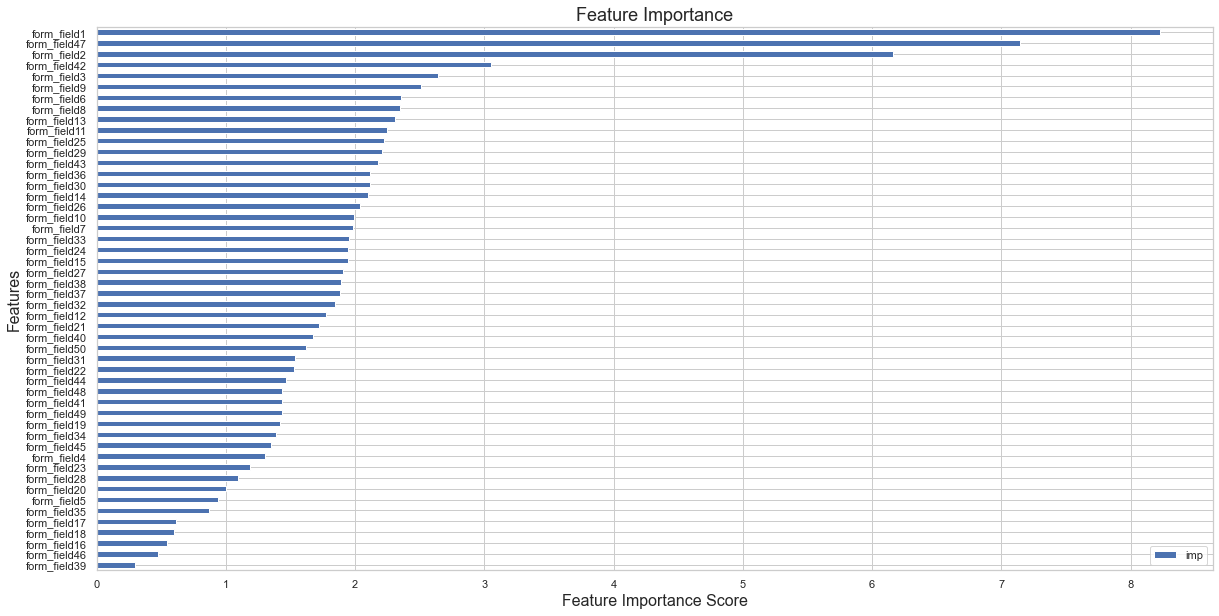

In [90]:
feat_imp = pd.DataFrame({'imp':cat_boost.feature_importances_, 'col': X.columns})
feat_imp = feat_imp.sort_values(['imp', 'col'], ascending=[True, False])
feat_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.ylabel('Features', size=16)
plt.xlabel('Feature Importance Score', size=16)
plt.title('Feature Importance', size=18)
plt.savefig('catboost_feature_importance.png')